# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [35]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

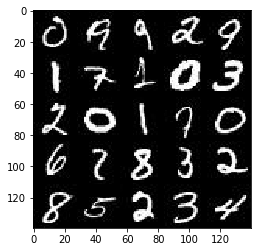

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

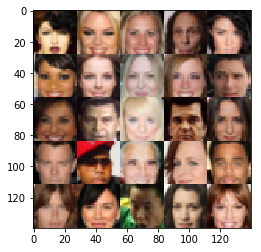

In [36]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [120]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_height, image_width, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, (None), name="learning_rate")
    
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [164]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
#         h1 = tf.reshape(images, (-1, 28*28*int(images.shape[-1])))
        
#         h1 = tf.layers.dense(h1, 1024, activation=None)
#         h1 = tf.maximum(alpha * h1, h1)
        
#         h2 = tf.layers.dense(h1, 512, activation=None)
#         h2 = tf.maximum(alpha * h2, h2)
        
#         logits = tf.layers.dense(h2, 1, activation=None)
#         out = tf.sigmoid(logits)
        
#         return out, logits

        size = 256
    
        x1 = tf.layers.conv2d(images, size/4, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, size/2, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d(x2, size, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
    
        x3f = tf.reshape(x3, (-1, 4*4*size))
        
        logits = tf.layers.dense(x3f, 1)
        output = tf.sigmoid(logits)
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [165]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=(not is_train)):
#         h1 = tf.layers.dense(z, 256, activation=None)
#         h1 = tf.maximum(alpha * h1, h1)
        
#         h2 = tf.layers.dense(h1, 512, activation=None)
#         h2 = tf.maximum(alpha * h2, h2)
        
#         # Logits and tanh output
#         logits = tf.layers.dense(h2, 28*28*out_channel_dim, activation=None)
#         out = tf.tanh(logits)
        
#         return tf.reshape(out, (-1, 28, 28, out_channel_dim))

        size = 256

        x1 = tf.layers.dense(z, 7*7*size)
        
        x1 = tf.reshape(x1, (-1, 7, 7, size))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, int(size/2), 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, int(size/4), 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1s, padding='same')
        output = tf.tanh(logits) * 0.5
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [166]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.01):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * (1 - 0.9)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [167]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, 
                                             beta1=beta1).minimize(d_loss, 
                                                                   var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, 
                                             beta1=beta1).minimize(g_loss, 
                                                                   var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [168]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.shape[-1]
    example_z = np.random.uniform(-1, 1, size=(n_images, z_dim))

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [177]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    losses = []
    batch_i = 0
    
    batches_n = int(data_shape[0] / batch_size) * epoch_count
    
    input_real, input_z, learn_rate = model_inputs(data_shape[2], data_shape[1], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=0.01)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_i = batch_i + 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})

                if batch_i % 1 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} - ".format(epoch_i + 1, epochs),
                          "Batch {}/{} - ".format(batch_i, batches_n),
                          "Discriminator loss: {:.4f} - ".format(train_loss_d),
                          "Generator loss: {:.4f} - ".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if batch_i % 20 == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 -  Batch 1/936 -  Discriminator loss: 1.0075 -  Generator loss: 1.0218 - 
Epoch 1/2 -  Batch 2/936 -  Discriminator loss: 0.7437 -  Generator loss: 2.1129 - 
Epoch 1/2 -  Batch 3/936 -  Discriminator loss: 0.6531 -  Generator loss: 2.4898 - 
Epoch 1/2 -  Batch 4/936 -  Discriminator loss: 0.5533 -  Generator loss: 2.4544 - 
Epoch 1/2 -  Batch 5/936 -  Discriminator loss: 0.4594 -  Generator loss: 2.5052 - 
Epoch 1/2 -  Batch 6/936 -  Discriminator loss: 0.4214 -  Generator loss: 2.8483 - 
Epoch 1/2 -  Batch 7/936 -  Discriminator loss: 0.3889 -  Generator loss: 3.2375 - 
Epoch 1/2 -  Batch 8/936 -  Discriminator loss: 0.3902 -  Generator loss: 3.1998 - 
Epoch 1/2 -  Batch 9/936 -  Discriminator loss: 0.3907 -  Generator loss: 3.1861 - 
Epoch 1/2 -  Batch 10/936 -  Discriminator loss: 0.3710 -  Generator loss: 3.5652 - 
Epoch 1/2 -  Batch 11/936 -  Discriminator loss: 0.3606 -  Generator loss: 3.8523 - 
Epoch 1/2 -  Batch 12/936 -  Discriminator loss: 0.3645 -  Generator loss:

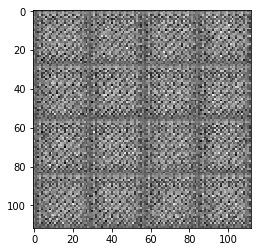

Epoch 1/2 -  Batch 21/936 -  Discriminator loss: 0.3841 -  Generator loss: 3.1868 - 
Epoch 1/2 -  Batch 22/936 -  Discriminator loss: 0.4002 -  Generator loss: 3.0315 - 
Epoch 1/2 -  Batch 23/936 -  Discriminator loss: 0.4024 -  Generator loss: 2.9280 - 
Epoch 1/2 -  Batch 24/936 -  Discriminator loss: 0.3795 -  Generator loss: 3.4183 - 
Epoch 1/2 -  Batch 25/936 -  Discriminator loss: 0.3897 -  Generator loss: 3.1469 - 
Epoch 1/2 -  Batch 26/936 -  Discriminator loss: 0.3929 -  Generator loss: 3.2482 - 
Epoch 1/2 -  Batch 27/936 -  Discriminator loss: 0.4165 -  Generator loss: 2.7197 - 
Epoch 1/2 -  Batch 28/936 -  Discriminator loss: 0.3933 -  Generator loss: 3.7229 - 
Epoch 1/2 -  Batch 29/936 -  Discriminator loss: 0.4396 -  Generator loss: 2.5654 - 
Epoch 1/2 -  Batch 30/936 -  Discriminator loss: 0.4144 -  Generator loss: 4.5094 - 
Epoch 1/2 -  Batch 31/936 -  Discriminator loss: 0.4207 -  Generator loss: 2.7501 - 
Epoch 1/2 -  Batch 32/936 -  Discriminator loss: 0.4097 -  Genera

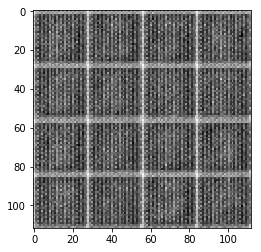

Epoch 1/2 -  Batch 41/936 -  Discriminator loss: 0.4157 -  Generator loss: 2.7238 - 
Epoch 1/2 -  Batch 42/936 -  Discriminator loss: 0.3943 -  Generator loss: 4.3047 - 
Epoch 1/2 -  Batch 43/936 -  Discriminator loss: 0.4148 -  Generator loss: 2.7464 - 
Epoch 1/2 -  Batch 44/936 -  Discriminator loss: 0.4345 -  Generator loss: 5.0531 - 
Epoch 1/2 -  Batch 45/936 -  Discriminator loss: 0.4034 -  Generator loss: 2.8524 - 
Epoch 1/2 -  Batch 46/936 -  Discriminator loss: 0.3862 -  Generator loss: 3.5644 - 
Epoch 1/2 -  Batch 47/936 -  Discriminator loss: 0.3879 -  Generator loss: 3.1393 - 
Epoch 1/2 -  Batch 48/936 -  Discriminator loss: 0.3830 -  Generator loss: 3.5370 - 
Epoch 1/2 -  Batch 49/936 -  Discriminator loss: 0.3849 -  Generator loss: 3.2536 - 
Epoch 1/2 -  Batch 50/936 -  Discriminator loss: 0.3792 -  Generator loss: 3.6464 - 
Epoch 1/2 -  Batch 51/936 -  Discriminator loss: 0.3898 -  Generator loss: 3.0747 - 
Epoch 1/2 -  Batch 52/936 -  Discriminator loss: 0.3937 -  Genera

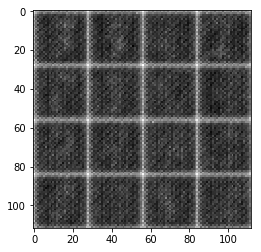

Epoch 1/2 -  Batch 61/936 -  Discriminator loss: 0.4118 -  Generator loss: 2.7487 - 
Epoch 1/2 -  Batch 62/936 -  Discriminator loss: 0.3880 -  Generator loss: 3.3131 - 
Epoch 1/2 -  Batch 63/936 -  Discriminator loss: 0.3901 -  Generator loss: 3.2467 - 
Epoch 1/2 -  Batch 64/936 -  Discriminator loss: 0.4008 -  Generator loss: 2.8782 - 
Epoch 1/2 -  Batch 65/936 -  Discriminator loss: 0.3913 -  Generator loss: 3.4603 - 
Epoch 1/2 -  Batch 66/936 -  Discriminator loss: 0.4062 -  Generator loss: 2.7921 - 
Epoch 1/2 -  Batch 67/936 -  Discriminator loss: 0.3914 -  Generator loss: 3.3627 - 
Epoch 1/2 -  Batch 68/936 -  Discriminator loss: 0.4162 -  Generator loss: 2.7147 - 
Epoch 1/2 -  Batch 69/936 -  Discriminator loss: 0.4166 -  Generator loss: 4.0372 - 
Epoch 1/2 -  Batch 70/936 -  Discriminator loss: 0.4465 -  Generator loss: 2.4228 - 
Epoch 1/2 -  Batch 71/936 -  Discriminator loss: 0.4445 -  Generator loss: 4.3200 - 
Epoch 1/2 -  Batch 72/936 -  Discriminator loss: 0.4169 -  Genera

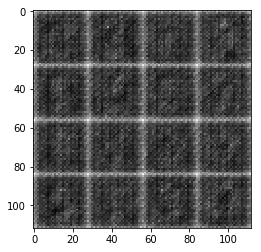

Epoch 1/2 -  Batch 81/936 -  Discriminator loss: 0.4933 -  Generator loss: 2.1131 - 
Epoch 1/2 -  Batch 82/936 -  Discriminator loss: 0.6135 -  Generator loss: 6.1431 - 
Epoch 1/2 -  Batch 83/936 -  Discriminator loss: 0.4677 -  Generator loss: 4.6295 - 
Epoch 1/2 -  Batch 84/936 -  Discriminator loss: 0.5495 -  Generator loss: 1.9467 - 
Epoch 1/2 -  Batch 85/936 -  Discriminator loss: 0.5234 -  Generator loss: 5.2349 - 
Epoch 1/2 -  Batch 86/936 -  Discriminator loss: 0.4221 -  Generator loss: 4.1984 - 
Epoch 1/2 -  Batch 87/936 -  Discriminator loss: 0.4764 -  Generator loss: 2.2799 - 
Epoch 1/2 -  Batch 88/936 -  Discriminator loss: 0.4588 -  Generator loss: 4.5481 - 
Epoch 1/2 -  Batch 89/936 -  Discriminator loss: 0.3974 -  Generator loss: 3.5870 - 
Epoch 1/2 -  Batch 90/936 -  Discriminator loss: 0.4605 -  Generator loss: 2.3206 - 
Epoch 1/2 -  Batch 91/936 -  Discriminator loss: 0.4402 -  Generator loss: 4.3971 - 
Epoch 1/2 -  Batch 92/936 -  Discriminator loss: 0.3979 -  Genera

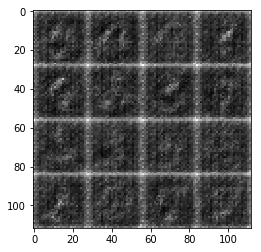

Epoch 1/2 -  Batch 101/936 -  Discriminator loss: 0.3927 -  Generator loss: 3.0041 - 
Epoch 1/2 -  Batch 102/936 -  Discriminator loss: 0.3924 -  Generator loss: 3.0033 - 
Epoch 1/2 -  Batch 103/936 -  Discriminator loss: 0.3889 -  Generator loss: 3.1645 - 
Epoch 1/2 -  Batch 104/936 -  Discriminator loss: 0.3899 -  Generator loss: 3.0718 - 
Epoch 1/2 -  Batch 105/936 -  Discriminator loss: 0.3910 -  Generator loss: 3.0707 - 
Epoch 1/2 -  Batch 106/936 -  Discriminator loss: 0.3888 -  Generator loss: 3.1507 - 
Epoch 1/2 -  Batch 107/936 -  Discriminator loss: 0.3871 -  Generator loss: 3.1109 - 
Epoch 1/2 -  Batch 108/936 -  Discriminator loss: 0.3846 -  Generator loss: 3.1941 - 
Epoch 1/2 -  Batch 109/936 -  Discriminator loss: 0.3885 -  Generator loss: 3.0567 - 
Epoch 1/2 -  Batch 110/936 -  Discriminator loss: 0.3903 -  Generator loss: 3.1211 - 
Epoch 1/2 -  Batch 111/936 -  Discriminator loss: 0.3855 -  Generator loss: 3.2764 - 
Epoch 1/2 -  Batch 112/936 -  Discriminator loss: 0.39

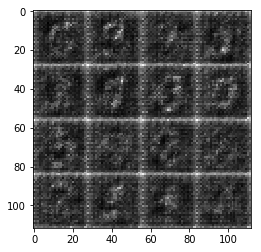

Epoch 1/2 -  Batch 121/936 -  Discriminator loss: 0.3918 -  Generator loss: 3.5723 - 
Epoch 1/2 -  Batch 122/936 -  Discriminator loss: 0.4045 -  Generator loss: 2.7385 - 
Epoch 1/2 -  Batch 123/936 -  Discriminator loss: 0.3974 -  Generator loss: 3.5650 - 
Epoch 1/2 -  Batch 124/936 -  Discriminator loss: 0.4029 -  Generator loss: 2.7533 - 
Epoch 1/2 -  Batch 125/936 -  Discriminator loss: 0.3914 -  Generator loss: 3.5904 - 
Epoch 1/2 -  Batch 126/936 -  Discriminator loss: 0.4085 -  Generator loss: 2.6673 - 
Epoch 1/2 -  Batch 127/936 -  Discriminator loss: 0.3987 -  Generator loss: 3.7684 - 
Epoch 1/2 -  Batch 128/936 -  Discriminator loss: 0.4042 -  Generator loss: 2.7239 - 
Epoch 1/2 -  Batch 129/936 -  Discriminator loss: 0.4003 -  Generator loss: 3.6994 - 
Epoch 1/2 -  Batch 130/936 -  Discriminator loss: 0.3999 -  Generator loss: 2.8046 - 
Epoch 1/2 -  Batch 131/936 -  Discriminator loss: 0.3843 -  Generator loss: 3.3705 - 
Epoch 1/2 -  Batch 132/936 -  Discriminator loss: 0.38

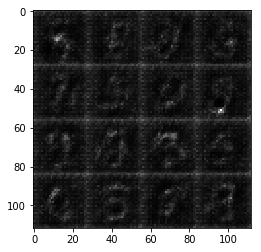

Epoch 1/2 -  Batch 141/936 -  Discriminator loss: 0.3875 -  Generator loss: 3.0011 - 
Epoch 1/2 -  Batch 142/936 -  Discriminator loss: 0.3831 -  Generator loss: 3.3148 - 
Epoch 1/2 -  Batch 143/936 -  Discriminator loss: 0.3907 -  Generator loss: 2.9101 - 
Epoch 1/2 -  Batch 144/936 -  Discriminator loss: 0.3872 -  Generator loss: 3.4493 - 
Epoch 1/2 -  Batch 145/936 -  Discriminator loss: 0.3926 -  Generator loss: 2.8881 - 
Epoch 1/2 -  Batch 146/936 -  Discriminator loss: 0.3977 -  Generator loss: 4.0699 - 
Epoch 1/2 -  Batch 147/936 -  Discriminator loss: 0.4189 -  Generator loss: 2.5670 - 
Epoch 1/2 -  Batch 148/936 -  Discriminator loss: 0.4235 -  Generator loss: 4.3304 - 
Epoch 1/2 -  Batch 149/936 -  Discriminator loss: 0.3932 -  Generator loss: 2.8970 - 
Epoch 1/2 -  Batch 150/936 -  Discriminator loss: 0.3862 -  Generator loss: 3.4037 - 
Epoch 1/2 -  Batch 151/936 -  Discriminator loss: 0.3944 -  Generator loss: 2.8555 - 
Epoch 1/2 -  Batch 152/936 -  Discriminator loss: 0.39

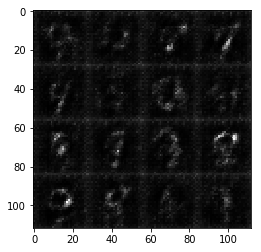

Epoch 1/2 -  Batch 161/936 -  Discriminator loss: 0.3897 -  Generator loss: 2.9219 - 
Epoch 1/2 -  Batch 162/936 -  Discriminator loss: 0.3845 -  Generator loss: 3.2779 - 
Epoch 1/2 -  Batch 163/936 -  Discriminator loss: 0.3785 -  Generator loss: 3.2288 - 
Epoch 1/2 -  Batch 164/936 -  Discriminator loss: 0.3792 -  Generator loss: 3.3104 - 
Epoch 1/2 -  Batch 165/936 -  Discriminator loss: 0.3866 -  Generator loss: 2.9908 - 
Epoch 1/2 -  Batch 166/936 -  Discriminator loss: 0.3884 -  Generator loss: 3.8445 - 
Epoch 1/2 -  Batch 167/936 -  Discriminator loss: 0.4033 -  Generator loss: 2.7718 - 
Epoch 1/2 -  Batch 168/936 -  Discriminator loss: 0.3902 -  Generator loss: 3.7480 - 
Epoch 1/2 -  Batch 169/936 -  Discriminator loss: 0.3874 -  Generator loss: 2.9798 - 
Epoch 1/2 -  Batch 170/936 -  Discriminator loss: 0.3833 -  Generator loss: 3.5971 - 
Epoch 1/2 -  Batch 171/936 -  Discriminator loss: 0.3938 -  Generator loss: 2.8804 - 
Epoch 1/2 -  Batch 172/936 -  Discriminator loss: 0.38

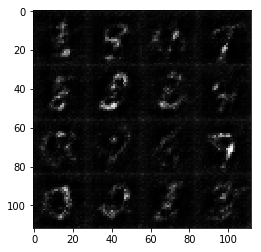

Epoch 1/2 -  Batch 181/936 -  Discriminator loss: 0.3905 -  Generator loss: 2.9664 - 
Epoch 1/2 -  Batch 182/936 -  Discriminator loss: 0.3780 -  Generator loss: 3.4045 - 
Epoch 1/2 -  Batch 183/936 -  Discriminator loss: 0.3787 -  Generator loss: 3.1859 - 
Epoch 1/2 -  Batch 184/936 -  Discriminator loss: 0.3789 -  Generator loss: 3.1886 - 
Epoch 1/2 -  Batch 185/936 -  Discriminator loss: 0.3788 -  Generator loss: 3.3500 - 
Epoch 1/2 -  Batch 186/936 -  Discriminator loss: 0.3758 -  Generator loss: 3.3409 - 
Epoch 1/2 -  Batch 187/936 -  Discriminator loss: 0.3835 -  Generator loss: 3.0858 - 
Epoch 1/2 -  Batch 188/936 -  Discriminator loss: 0.3801 -  Generator loss: 3.8306 - 
Epoch 1/2 -  Batch 189/936 -  Discriminator loss: 0.4000 -  Generator loss: 2.8130 - 
Epoch 1/2 -  Batch 190/936 -  Discriminator loss: 0.4182 -  Generator loss: 4.4663 - 
Epoch 1/2 -  Batch 191/936 -  Discriminator loss: 0.3906 -  Generator loss: 2.9554 - 
Epoch 1/2 -  Batch 192/936 -  Discriminator loss: 0.38

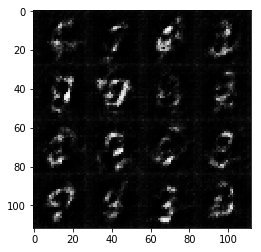

Epoch 1/2 -  Batch 201/936 -  Discriminator loss: 0.3955 -  Generator loss: 2.8763 - 
Epoch 1/2 -  Batch 202/936 -  Discriminator loss: 0.3781 -  Generator loss: 3.5838 - 
Epoch 1/2 -  Batch 203/936 -  Discriminator loss: 0.3773 -  Generator loss: 3.1601 - 
Epoch 1/2 -  Batch 204/936 -  Discriminator loss: 0.3746 -  Generator loss: 3.6778 - 
Epoch 1/2 -  Batch 205/936 -  Discriminator loss: 0.3763 -  Generator loss: 3.1873 - 
Epoch 1/2 -  Batch 206/936 -  Discriminator loss: 0.3719 -  Generator loss: 3.5097 - 
Epoch 1/2 -  Batch 207/936 -  Discriminator loss: 0.3709 -  Generator loss: 3.3411 - 
Epoch 1/2 -  Batch 208/936 -  Discriminator loss: 0.3816 -  Generator loss: 3.0291 - 
Epoch 1/2 -  Batch 209/936 -  Discriminator loss: 0.3969 -  Generator loss: 4.3316 - 
Epoch 1/2 -  Batch 210/936 -  Discriminator loss: 0.4020 -  Generator loss: 2.8055 - 
Epoch 1/2 -  Batch 211/936 -  Discriminator loss: 0.3894 -  Generator loss: 3.8548 - 
Epoch 1/2 -  Batch 212/936 -  Discriminator loss: 0.39

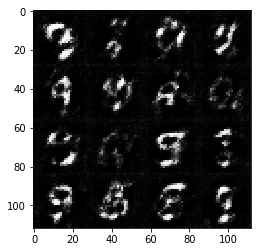

Epoch 1/2 -  Batch 221/936 -  Discriminator loss: 0.3779 -  Generator loss: 3.6864 - 
Epoch 1/2 -  Batch 222/936 -  Discriminator loss: 0.3816 -  Generator loss: 3.0775 - 
Epoch 1/2 -  Batch 223/936 -  Discriminator loss: 0.3804 -  Generator loss: 3.9510 - 
Epoch 1/2 -  Batch 224/936 -  Discriminator loss: 0.3946 -  Generator loss: 2.9175 - 
Epoch 1/2 -  Batch 225/936 -  Discriminator loss: 0.3886 -  Generator loss: 4.0832 - 
Epoch 1/2 -  Batch 226/936 -  Discriminator loss: 0.3887 -  Generator loss: 2.9573 - 
Epoch 1/2 -  Batch 227/936 -  Discriminator loss: 0.3750 -  Generator loss: 3.5989 - 
Epoch 1/2 -  Batch 228/936 -  Discriminator loss: 0.3802 -  Generator loss: 3.1238 - 
Epoch 1/2 -  Batch 229/936 -  Discriminator loss: 0.3757 -  Generator loss: 3.6068 - 
Epoch 1/2 -  Batch 230/936 -  Discriminator loss: 0.3813 -  Generator loss: 3.0813 - 
Epoch 1/2 -  Batch 231/936 -  Discriminator loss: 0.3815 -  Generator loss: 3.9608 - 
Epoch 1/2 -  Batch 232/936 -  Discriminator loss: 0.38

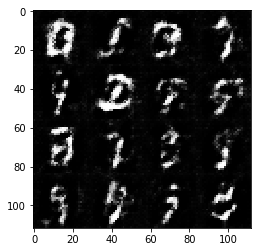

Epoch 1/2 -  Batch 241/936 -  Discriminator loss: 0.3730 -  Generator loss: 3.2545 - 
Epoch 1/2 -  Batch 242/936 -  Discriminator loss: 0.3712 -  Generator loss: 3.5246 - 
Epoch 1/2 -  Batch 243/936 -  Discriminator loss: 0.3690 -  Generator loss: 3.3797 - 
Epoch 1/2 -  Batch 244/936 -  Discriminator loss: 0.3741 -  Generator loss: 3.2664 - 
Epoch 1/2 -  Batch 245/936 -  Discriminator loss: 0.3773 -  Generator loss: 3.9094 - 
Epoch 1/2 -  Batch 246/936 -  Discriminator loss: 0.4059 -  Generator loss: 2.8103 - 
Epoch 1/2 -  Batch 247/936 -  Discriminator loss: 0.4318 -  Generator loss: 4.8420 - 
Epoch 1/2 -  Batch 248/936 -  Discriminator loss: 0.3786 -  Generator loss: 3.1986 - 
Epoch 1/2 -  Batch 249/936 -  Discriminator loss: 0.3773 -  Generator loss: 3.1581 - 
Epoch 1/2 -  Batch 250/936 -  Discriminator loss: 0.3883 -  Generator loss: 4.1450 - 
Epoch 1/2 -  Batch 251/936 -  Discriminator loss: 0.3846 -  Generator loss: 3.0632 - 
Epoch 1/2 -  Batch 252/936 -  Discriminator loss: 0.37

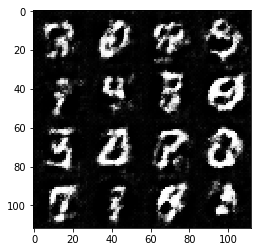

Epoch 1/2 -  Batch 261/936 -  Discriminator loss: 0.3880 -  Generator loss: 2.9926 - 
Epoch 1/2 -  Batch 262/936 -  Discriminator loss: 0.3716 -  Generator loss: 3.6618 - 
Epoch 1/2 -  Batch 263/936 -  Discriminator loss: 0.3726 -  Generator loss: 3.2487 - 
Epoch 1/2 -  Batch 264/936 -  Discriminator loss: 0.3695 -  Generator loss: 3.5869 - 
Epoch 1/2 -  Batch 265/936 -  Discriminator loss: 0.3695 -  Generator loss: 3.3839 - 
Epoch 1/2 -  Batch 266/936 -  Discriminator loss: 0.3737 -  Generator loss: 3.2939 - 
Epoch 1/2 -  Batch 267/936 -  Discriminator loss: 0.3710 -  Generator loss: 3.3926 - 
Epoch 1/2 -  Batch 268/936 -  Discriminator loss: 0.3701 -  Generator loss: 3.3882 - 
Epoch 1/2 -  Batch 269/936 -  Discriminator loss: 0.3692 -  Generator loss: 3.4063 - 
Epoch 1/2 -  Batch 270/936 -  Discriminator loss: 0.3690 -  Generator loss: 3.5281 - 
Epoch 1/2 -  Batch 271/936 -  Discriminator loss: 0.3780 -  Generator loss: 3.1728 - 
Epoch 1/2 -  Batch 272/936 -  Discriminator loss: 0.37

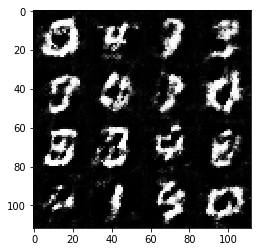

Epoch 1/2 -  Batch 281/936 -  Discriminator loss: 0.3676 -  Generator loss: 3.5426 - 
Epoch 1/2 -  Batch 282/936 -  Discriminator loss: 0.3703 -  Generator loss: 3.2834 - 
Epoch 1/2 -  Batch 283/936 -  Discriminator loss: 0.3678 -  Generator loss: 3.9085 - 
Epoch 1/2 -  Batch 284/936 -  Discriminator loss: 0.3904 -  Generator loss: 2.9839 - 
Epoch 1/2 -  Batch 285/936 -  Discriminator loss: 0.3924 -  Generator loss: 4.2918 - 
Epoch 1/2 -  Batch 286/936 -  Discriminator loss: 0.3841 -  Generator loss: 3.1586 - 
Epoch 1/2 -  Batch 287/936 -  Discriminator loss: 0.3720 -  Generator loss: 3.7478 - 
Epoch 1/2 -  Batch 288/936 -  Discriminator loss: 0.3702 -  Generator loss: 3.3697 - 
Epoch 1/2 -  Batch 289/936 -  Discriminator loss: 0.3708 -  Generator loss: 3.4964 - 
Epoch 1/2 -  Batch 290/936 -  Discriminator loss: 0.3674 -  Generator loss: 3.4562 - 
Epoch 1/2 -  Batch 291/936 -  Discriminator loss: 0.3711 -  Generator loss: 3.3861 - 
Epoch 1/2 -  Batch 292/936 -  Discriminator loss: 0.37

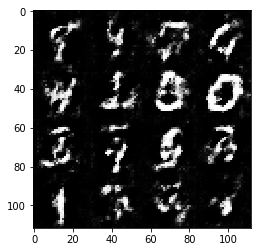

Epoch 1/2 -  Batch 301/936 -  Discriminator loss: 0.3893 -  Generator loss: 4.2519 - 
Epoch 1/2 -  Batch 302/936 -  Discriminator loss: 0.3789 -  Generator loss: 3.1989 - 
Epoch 1/2 -  Batch 303/936 -  Discriminator loss: 0.3707 -  Generator loss: 3.5712 - 
Epoch 1/2 -  Batch 304/936 -  Discriminator loss: 0.3648 -  Generator loss: 3.5720 - 
Epoch 1/2 -  Batch 305/936 -  Discriminator loss: 0.3759 -  Generator loss: 3.2066 - 
Epoch 1/2 -  Batch 306/936 -  Discriminator loss: 0.3796 -  Generator loss: 3.9030 - 
Epoch 1/2 -  Batch 307/936 -  Discriminator loss: 0.3908 -  Generator loss: 2.9606 - 
Epoch 1/2 -  Batch 308/936 -  Discriminator loss: 0.3906 -  Generator loss: 4.2472 - 
Epoch 1/2 -  Batch 309/936 -  Discriminator loss: 0.3818 -  Generator loss: 3.0882 - 
Epoch 1/2 -  Batch 310/936 -  Discriminator loss: 0.3741 -  Generator loss: 3.9773 - 
Epoch 1/2 -  Batch 311/936 -  Discriminator loss: 0.3824 -  Generator loss: 3.0922 - 
Epoch 1/2 -  Batch 312/936 -  Discriminator loss: 0.36

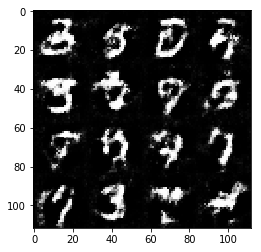

Epoch 1/2 -  Batch 321/936 -  Discriminator loss: 0.3758 -  Generator loss: 3.2147 - 
Epoch 1/2 -  Batch 322/936 -  Discriminator loss: 0.3695 -  Generator loss: 3.8295 - 
Epoch 1/2 -  Batch 323/936 -  Discriminator loss: 0.3673 -  Generator loss: 3.4192 - 
Epoch 1/2 -  Batch 324/936 -  Discriminator loss: 0.3662 -  Generator loss: 3.5327 - 
Epoch 1/2 -  Batch 325/936 -  Discriminator loss: 0.3619 -  Generator loss: 3.6590 - 
Epoch 1/2 -  Batch 326/936 -  Discriminator loss: 0.3739 -  Generator loss: 3.2334 - 
Epoch 1/2 -  Batch 327/936 -  Discriminator loss: 0.3700 -  Generator loss: 3.8521 - 
Epoch 1/2 -  Batch 328/936 -  Discriminator loss: 0.3788 -  Generator loss: 3.1397 - 
Epoch 1/2 -  Batch 329/936 -  Discriminator loss: 0.3687 -  Generator loss: 3.8201 - 
Epoch 1/2 -  Batch 330/936 -  Discriminator loss: 0.3789 -  Generator loss: 3.1555 - 
Epoch 1/2 -  Batch 331/936 -  Discriminator loss: 0.3774 -  Generator loss: 3.7304 - 
Epoch 1/2 -  Batch 332/936 -  Discriminator loss: 0.36

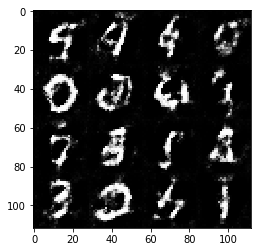

Epoch 1/2 -  Batch 341/936 -  Discriminator loss: 0.3767 -  Generator loss: 3.7202 - 
Epoch 1/2 -  Batch 342/936 -  Discriminator loss: 0.3746 -  Generator loss: 3.2071 - 
Epoch 1/2 -  Batch 343/936 -  Discriminator loss: 0.3681 -  Generator loss: 3.4646 - 
Epoch 1/2 -  Batch 344/936 -  Discriminator loss: 0.3681 -  Generator loss: 3.5352 - 
Epoch 1/2 -  Batch 345/936 -  Discriminator loss: 0.3727 -  Generator loss: 3.2904 - 
Epoch 1/2 -  Batch 346/936 -  Discriminator loss: 0.3688 -  Generator loss: 3.8840 - 
Epoch 1/2 -  Batch 347/936 -  Discriminator loss: 0.3910 -  Generator loss: 2.9467 - 
Epoch 1/2 -  Batch 348/936 -  Discriminator loss: 0.3974 -  Generator loss: 4.3594 - 
Epoch 1/2 -  Batch 349/936 -  Discriminator loss: 0.3986 -  Generator loss: 2.8891 - 
Epoch 1/2 -  Batch 350/936 -  Discriminator loss: 0.3913 -  Generator loss: 4.3560 - 
Epoch 1/2 -  Batch 351/936 -  Discriminator loss: 0.3832 -  Generator loss: 3.1014 - 
Epoch 1/2 -  Batch 352/936 -  Discriminator loss: 0.37

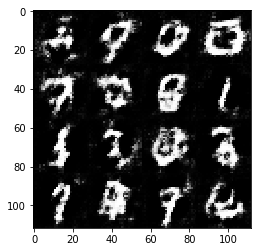

Epoch 1/2 -  Batch 361/936 -  Discriminator loss: 0.3762 -  Generator loss: 3.2019 - 
Epoch 1/2 -  Batch 362/936 -  Discriminator loss: 0.3752 -  Generator loss: 4.0065 - 
Epoch 1/2 -  Batch 363/936 -  Discriminator loss: 0.3876 -  Generator loss: 2.9885 - 
Epoch 1/2 -  Batch 364/936 -  Discriminator loss: 0.3871 -  Generator loss: 4.3564 - 
Epoch 1/2 -  Batch 365/936 -  Discriminator loss: 0.3930 -  Generator loss: 2.9869 - 
Epoch 1/2 -  Batch 366/936 -  Discriminator loss: 0.3955 -  Generator loss: 4.1601 - 
Epoch 1/2 -  Batch 367/936 -  Discriminator loss: 0.3876 -  Generator loss: 3.0740 - 
Epoch 1/2 -  Batch 368/936 -  Discriminator loss: 0.3805 -  Generator loss: 3.8401 - 
Epoch 1/2 -  Batch 369/936 -  Discriminator loss: 0.3787 -  Generator loss: 3.2003 - 
Epoch 1/2 -  Batch 370/936 -  Discriminator loss: 0.3742 -  Generator loss: 3.7197 - 
Epoch 1/2 -  Batch 371/936 -  Discriminator loss: 0.3829 -  Generator loss: 3.0867 - 
Epoch 1/2 -  Batch 372/936 -  Discriminator loss: 0.37

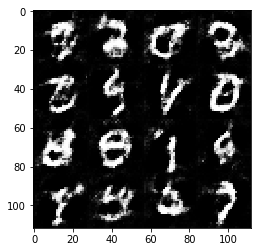

Epoch 1/2 -  Batch 381/936 -  Discriminator loss: 0.3702 -  Generator loss: 3.3215 - 
Epoch 1/2 -  Batch 382/936 -  Discriminator loss: 0.3709 -  Generator loss: 3.5195 - 
Epoch 1/2 -  Batch 383/936 -  Discriminator loss: 0.3750 -  Generator loss: 3.2074 - 
Epoch 1/2 -  Batch 384/936 -  Discriminator loss: 0.3701 -  Generator loss: 3.7990 - 
Epoch 1/2 -  Batch 385/936 -  Discriminator loss: 0.3920 -  Generator loss: 2.9221 - 
Epoch 1/2 -  Batch 386/936 -  Discriminator loss: 0.4163 -  Generator loss: 4.7102 - 
Epoch 1/2 -  Batch 387/936 -  Discriminator loss: 0.3912 -  Generator loss: 2.9475 - 
Epoch 1/2 -  Batch 388/936 -  Discriminator loss: 0.3776 -  Generator loss: 3.2762 - 
Epoch 1/2 -  Batch 389/936 -  Discriminator loss: 0.3751 -  Generator loss: 3.5319 - 
Epoch 1/2 -  Batch 390/936 -  Discriminator loss: 0.3798 -  Generator loss: 3.1508 - 
Epoch 1/2 -  Batch 391/936 -  Discriminator loss: 0.3718 -  Generator loss: 3.4659 - 
Epoch 1/2 -  Batch 392/936 -  Discriminator loss: 0.37

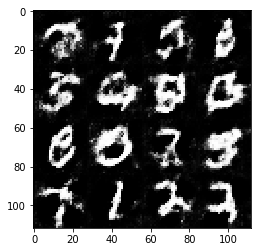

Epoch 1/2 -  Batch 401/936 -  Discriminator loss: 0.3949 -  Generator loss: 2.8654 - 
Epoch 1/2 -  Batch 402/936 -  Discriminator loss: 0.3884 -  Generator loss: 3.9397 - 
Epoch 1/2 -  Batch 403/936 -  Discriminator loss: 0.3912 -  Generator loss: 2.9416 - 
Epoch 1/2 -  Batch 404/936 -  Discriminator loss: 0.3870 -  Generator loss: 3.9982 - 
Epoch 1/2 -  Batch 405/936 -  Discriminator loss: 0.3900 -  Generator loss: 2.9133 - 
Epoch 1/2 -  Batch 406/936 -  Discriminator loss: 0.3742 -  Generator loss: 3.6111 - 
Epoch 1/2 -  Batch 407/936 -  Discriminator loss: 0.3779 -  Generator loss: 3.1560 - 
Epoch 1/2 -  Batch 408/936 -  Discriminator loss: 0.3734 -  Generator loss: 3.4136 - 
Epoch 1/2 -  Batch 409/936 -  Discriminator loss: 0.3864 -  Generator loss: 2.9601 - 
Epoch 1/2 -  Batch 410/936 -  Discriminator loss: 0.3851 -  Generator loss: 3.6780 - 
Epoch 1/2 -  Batch 411/936 -  Discriminator loss: 0.3941 -  Generator loss: 2.8560 - 
Epoch 1/2 -  Batch 412/936 -  Discriminator loss: 0.39

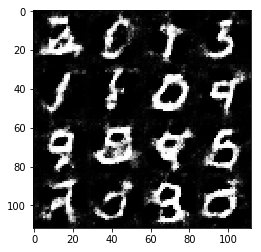

Epoch 1/2 -  Batch 421/936 -  Discriminator loss: 0.3801 -  Generator loss: 3.1009 - 
Epoch 1/2 -  Batch 422/936 -  Discriminator loss: 0.3772 -  Generator loss: 3.6039 - 
Epoch 1/2 -  Batch 423/936 -  Discriminator loss: 0.3906 -  Generator loss: 2.9326 - 
Epoch 1/2 -  Batch 424/936 -  Discriminator loss: 0.3852 -  Generator loss: 4.0104 - 
Epoch 1/2 -  Batch 425/936 -  Discriminator loss: 0.3909 -  Generator loss: 2.9359 - 
Epoch 1/2 -  Batch 426/936 -  Discriminator loss: 0.3947 -  Generator loss: 4.1938 - 
Epoch 1/2 -  Batch 427/936 -  Discriminator loss: 0.3867 -  Generator loss: 2.9722 - 
Epoch 1/2 -  Batch 428/936 -  Discriminator loss: 0.3818 -  Generator loss: 3.6740 - 
Epoch 1/2 -  Batch 429/936 -  Discriminator loss: 0.3924 -  Generator loss: 2.9030 - 
Epoch 1/2 -  Batch 430/936 -  Discriminator loss: 0.3811 -  Generator loss: 3.8055 - 
Epoch 1/2 -  Batch 431/936 -  Discriminator loss: 0.3842 -  Generator loss: 3.0430 - 
Epoch 1/2 -  Batch 432/936 -  Discriminator loss: 0.37

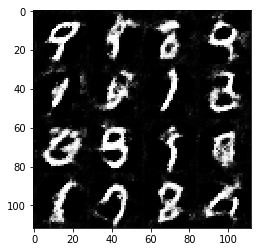

Epoch 1/2 -  Batch 441/936 -  Discriminator loss: 0.3743 -  Generator loss: 3.4366 - 
Epoch 1/2 -  Batch 442/936 -  Discriminator loss: 0.3897 -  Generator loss: 2.9587 - 
Epoch 1/2 -  Batch 443/936 -  Discriminator loss: 0.3846 -  Generator loss: 3.6283 - 
Epoch 1/2 -  Batch 444/936 -  Discriminator loss: 0.3865 -  Generator loss: 2.9562 - 
Epoch 1/2 -  Batch 445/936 -  Discriminator loss: 0.3736 -  Generator loss: 3.5273 - 
Epoch 1/2 -  Batch 446/936 -  Discriminator loss: 0.3744 -  Generator loss: 3.2580 - 
Epoch 1/2 -  Batch 447/936 -  Discriminator loss: 0.3717 -  Generator loss: 3.4438 - 
Epoch 1/2 -  Batch 448/936 -  Discriminator loss: 0.3788 -  Generator loss: 3.1006 - 
Epoch 1/2 -  Batch 449/936 -  Discriminator loss: 0.3802 -  Generator loss: 3.8653 - 
Epoch 1/2 -  Batch 450/936 -  Discriminator loss: 0.4010 -  Generator loss: 2.7903 - 
Epoch 1/2 -  Batch 451/936 -  Discriminator loss: 0.4121 -  Generator loss: 4.3079 - 
Epoch 1/2 -  Batch 452/936 -  Discriminator loss: 0.39

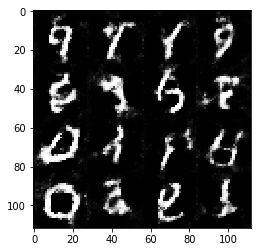

Epoch 1/2 -  Batch 461/936 -  Discriminator loss: 0.3798 -  Generator loss: 3.1312 - 
Epoch 1/2 -  Batch 462/936 -  Discriminator loss: 0.3732 -  Generator loss: 3.6195 - 
Epoch 1/2 -  Batch 463/936 -  Discriminator loss: 0.3817 -  Generator loss: 3.0565 - 
Epoch 1/2 -  Batch 464/936 -  Discriminator loss: 0.3763 -  Generator loss: 3.7577 - 
Epoch 1/2 -  Batch 465/936 -  Discriminator loss: 0.4021 -  Generator loss: 2.7843 - 
Epoch 1/2 -  Batch 466/936 -  Discriminator loss: 0.4069 -  Generator loss: 4.2710 - 
Epoch 1/2 -  Batch 467/936 -  Discriminator loss: 0.3878 -  Generator loss: 2.9832 - 
Epoch 1/2 -  Batch 468/936 -  Discriminator loss: 0.3798 -  Generator loss: 3.2300 - 
Epoch 2/2 -  Batch 469/936 -  Discriminator loss: 0.3780 -  Generator loss: 3.4635 - 
Epoch 2/2 -  Batch 470/936 -  Discriminator loss: 0.3724 -  Generator loss: 3.2656 - 
Epoch 2/2 -  Batch 471/936 -  Discriminator loss: 0.3745 -  Generator loss: 3.3083 - 
Epoch 2/2 -  Batch 472/936 -  Discriminator loss: 0.37

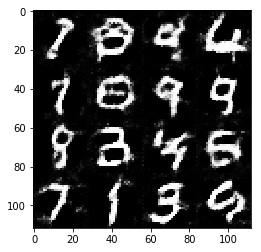

Epoch 2/2 -  Batch 481/936 -  Discriminator loss: 0.3948 -  Generator loss: 2.9061 - 
Epoch 2/2 -  Batch 482/936 -  Discriminator loss: 0.3801 -  Generator loss: 3.2581 - 
Epoch 2/2 -  Batch 483/936 -  Discriminator loss: 0.3711 -  Generator loss: 3.5244 - 
Epoch 2/2 -  Batch 484/936 -  Discriminator loss: 0.3868 -  Generator loss: 2.9903 - 
Epoch 2/2 -  Batch 485/936 -  Discriminator loss: 0.3779 -  Generator loss: 3.5037 - 
Epoch 2/2 -  Batch 486/936 -  Discriminator loss: 0.3848 -  Generator loss: 3.0193 - 
Epoch 2/2 -  Batch 487/936 -  Discriminator loss: 0.3805 -  Generator loss: 3.3803 - 
Epoch 2/2 -  Batch 488/936 -  Discriminator loss: 0.3819 -  Generator loss: 3.0766 - 
Epoch 2/2 -  Batch 489/936 -  Discriminator loss: 0.3763 -  Generator loss: 3.4098 - 
Epoch 2/2 -  Batch 490/936 -  Discriminator loss: 0.3798 -  Generator loss: 3.1009 - 
Epoch 2/2 -  Batch 491/936 -  Discriminator loss: 0.3819 -  Generator loss: 3.7262 - 
Epoch 2/2 -  Batch 492/936 -  Discriminator loss: 0.40

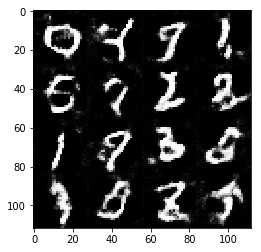

Epoch 2/2 -  Batch 501/936 -  Discriminator loss: 0.3782 -  Generator loss: 3.2601 - 
Epoch 2/2 -  Batch 502/936 -  Discriminator loss: 0.3795 -  Generator loss: 3.1366 - 
Epoch 2/2 -  Batch 503/936 -  Discriminator loss: 0.3736 -  Generator loss: 3.5291 - 
Epoch 2/2 -  Batch 504/936 -  Discriminator loss: 0.3909 -  Generator loss: 2.8971 - 
Epoch 2/2 -  Batch 505/936 -  Discriminator loss: 0.3953 -  Generator loss: 4.0197 - 
Epoch 2/2 -  Batch 506/936 -  Discriminator loss: 0.3977 -  Generator loss: 2.8539 - 
Epoch 2/2 -  Batch 507/936 -  Discriminator loss: 0.4042 -  Generator loss: 4.2249 - 
Epoch 2/2 -  Batch 508/936 -  Discriminator loss: 0.3945 -  Generator loss: 2.8831 - 
Epoch 2/2 -  Batch 509/936 -  Discriminator loss: 0.3817 -  Generator loss: 3.6299 - 
Epoch 2/2 -  Batch 510/936 -  Discriminator loss: 0.3863 -  Generator loss: 2.9969 - 
Epoch 2/2 -  Batch 511/936 -  Discriminator loss: 0.3807 -  Generator loss: 3.6295 - 
Epoch 2/2 -  Batch 512/936 -  Discriminator loss: 0.39

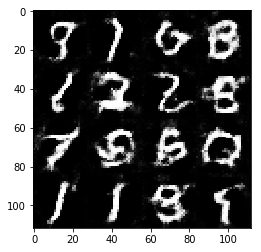

Epoch 2/2 -  Batch 521/936 -  Discriminator loss: 0.3838 -  Generator loss: 3.0402 - 
Epoch 2/2 -  Batch 522/936 -  Discriminator loss: 0.3809 -  Generator loss: 3.6748 - 
Epoch 2/2 -  Batch 523/936 -  Discriminator loss: 0.3971 -  Generator loss: 2.8123 - 
Epoch 2/2 -  Batch 524/936 -  Discriminator loss: 0.3948 -  Generator loss: 4.0569 - 
Epoch 2/2 -  Batch 525/936 -  Discriminator loss: 0.3984 -  Generator loss: 2.8531 - 
Epoch 2/2 -  Batch 526/936 -  Discriminator loss: 0.3859 -  Generator loss: 3.8118 - 
Epoch 2/2 -  Batch 527/936 -  Discriminator loss: 0.3831 -  Generator loss: 3.0597 - 
Epoch 2/2 -  Batch 528/936 -  Discriminator loss: 0.3775 -  Generator loss: 3.3368 - 
Epoch 2/2 -  Batch 529/936 -  Discriminator loss: 0.3725 -  Generator loss: 3.4508 - 
Epoch 2/2 -  Batch 530/936 -  Discriminator loss: 0.3830 -  Generator loss: 3.0484 - 
Epoch 2/2 -  Batch 531/936 -  Discriminator loss: 0.3758 -  Generator loss: 3.4168 - 
Epoch 2/2 -  Batch 532/936 -  Discriminator loss: 0.38

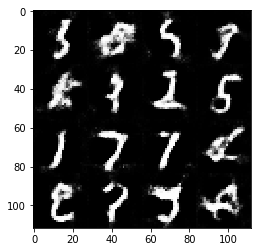

Epoch 2/2 -  Batch 541/936 -  Discriminator loss: 0.3787 -  Generator loss: 3.7293 - 
Epoch 2/2 -  Batch 542/936 -  Discriminator loss: 0.4115 -  Generator loss: 2.6593 - 
Epoch 2/2 -  Batch 543/936 -  Discriminator loss: 0.4470 -  Generator loss: 4.8002 - 
Epoch 2/2 -  Batch 544/936 -  Discriminator loss: 0.3878 -  Generator loss: 3.0709 - 
Epoch 2/2 -  Batch 545/936 -  Discriminator loss: 0.3888 -  Generator loss: 2.9236 - 
Epoch 2/2 -  Batch 546/936 -  Discriminator loss: 0.4171 -  Generator loss: 4.3983 - 
Epoch 2/2 -  Batch 547/936 -  Discriminator loss: 0.3912 -  Generator loss: 2.9724 - 
Epoch 2/2 -  Batch 548/936 -  Discriminator loss: 0.3750 -  Generator loss: 3.4430 - 
Epoch 2/2 -  Batch 549/936 -  Discriminator loss: 0.3837 -  Generator loss: 3.0466 - 
Epoch 2/2 -  Batch 550/936 -  Discriminator loss: 0.3804 -  Generator loss: 3.2423 - 
Epoch 2/2 -  Batch 551/936 -  Discriminator loss: 0.3791 -  Generator loss: 3.2379 - 
Epoch 2/2 -  Batch 552/936 -  Discriminator loss: 0.37

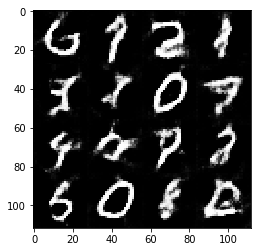

Epoch 2/2 -  Batch 561/936 -  Discriminator loss: 0.3829 -  Generator loss: 3.0541 - 
Epoch 2/2 -  Batch 562/936 -  Discriminator loss: 0.3763 -  Generator loss: 3.5913 - 
Epoch 2/2 -  Batch 563/936 -  Discriminator loss: 0.3868 -  Generator loss: 2.9919 - 
Epoch 2/2 -  Batch 564/936 -  Discriminator loss: 0.3819 -  Generator loss: 3.6603 - 
Epoch 2/2 -  Batch 565/936 -  Discriminator loss: 0.3897 -  Generator loss: 2.9234 - 
Epoch 2/2 -  Batch 566/936 -  Discriminator loss: 0.3917 -  Generator loss: 3.8461 - 
Epoch 2/2 -  Batch 567/936 -  Discriminator loss: 0.3892 -  Generator loss: 2.9489 - 
Epoch 2/2 -  Batch 568/936 -  Discriminator loss: 0.3886 -  Generator loss: 3.8433 - 
Epoch 2/2 -  Batch 569/936 -  Discriminator loss: 0.4025 -  Generator loss: 2.7683 - 
Epoch 2/2 -  Batch 570/936 -  Discriminator loss: 0.3871 -  Generator loss: 3.8928 - 
Epoch 2/2 -  Batch 571/936 -  Discriminator loss: 0.3872 -  Generator loss: 2.9768 - 
Epoch 2/2 -  Batch 572/936 -  Discriminator loss: 0.38

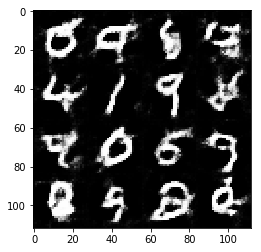

Epoch 2/2 -  Batch 581/936 -  Discriminator loss: 0.3751 -  Generator loss: 3.4694 - 
Epoch 2/2 -  Batch 582/936 -  Discriminator loss: 0.3837 -  Generator loss: 3.0388 - 
Epoch 2/2 -  Batch 583/936 -  Discriminator loss: 0.3788 -  Generator loss: 3.7287 - 
Epoch 2/2 -  Batch 584/936 -  Discriminator loss: 0.4022 -  Generator loss: 2.7483 - 
Epoch 2/2 -  Batch 585/936 -  Discriminator loss: 0.4084 -  Generator loss: 4.1292 - 
Epoch 2/2 -  Batch 586/936 -  Discriminator loss: 0.3888 -  Generator loss: 2.9608 - 
Epoch 2/2 -  Batch 587/936 -  Discriminator loss: 0.3749 -  Generator loss: 3.4651 - 
Epoch 2/2 -  Batch 588/936 -  Discriminator loss: 0.3866 -  Generator loss: 2.9912 - 
Epoch 2/2 -  Batch 589/936 -  Discriminator loss: 0.3824 -  Generator loss: 3.6019 - 
Epoch 2/2 -  Batch 590/936 -  Discriminator loss: 0.3874 -  Generator loss: 2.9504 - 
Epoch 2/2 -  Batch 591/936 -  Discriminator loss: 0.3807 -  Generator loss: 3.5276 - 
Epoch 2/2 -  Batch 592/936 -  Discriminator loss: 0.38

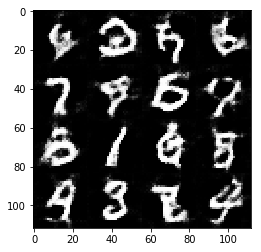

Epoch 2/2 -  Batch 601/936 -  Discriminator loss: 0.3800 -  Generator loss: 3.6170 - 
Epoch 2/2 -  Batch 602/936 -  Discriminator loss: 0.3863 -  Generator loss: 2.9810 - 
Epoch 2/2 -  Batch 603/936 -  Discriminator loss: 0.3809 -  Generator loss: 3.6434 - 
Epoch 2/2 -  Batch 604/936 -  Discriminator loss: 0.3922 -  Generator loss: 2.8804 - 
Epoch 2/2 -  Batch 605/936 -  Discriminator loss: 0.3748 -  Generator loss: 3.5242 - 
Epoch 2/2 -  Batch 606/936 -  Discriminator loss: 0.3785 -  Generator loss: 3.2154 - 
Epoch 2/2 -  Batch 607/936 -  Discriminator loss: 0.3791 -  Generator loss: 3.0851 - 
Epoch 2/2 -  Batch 608/936 -  Discriminator loss: 0.3838 -  Generator loss: 3.7877 - 
Epoch 2/2 -  Batch 609/936 -  Discriminator loss: 0.4077 -  Generator loss: 2.7194 - 
Epoch 2/2 -  Batch 610/936 -  Discriminator loss: 0.4416 -  Generator loss: 4.6939 - 
Epoch 2/2 -  Batch 611/936 -  Discriminator loss: 0.3808 -  Generator loss: 3.1729 - 
Epoch 2/2 -  Batch 612/936 -  Discriminator loss: 0.39

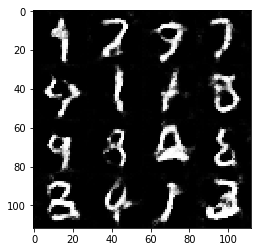

Epoch 2/2 -  Batch 621/936 -  Discriminator loss: 0.3766 -  Generator loss: 3.3956 - 
Epoch 2/2 -  Batch 622/936 -  Discriminator loss: 0.3852 -  Generator loss: 2.9775 - 
Epoch 2/2 -  Batch 623/936 -  Discriminator loss: 0.3802 -  Generator loss: 3.6623 - 
Epoch 2/2 -  Batch 624/936 -  Discriminator loss: 0.3866 -  Generator loss: 2.9695 - 
Epoch 2/2 -  Batch 625/936 -  Discriminator loss: 0.3757 -  Generator loss: 3.6131 - 
Epoch 2/2 -  Batch 626/936 -  Discriminator loss: 0.3801 -  Generator loss: 3.1174 - 
Epoch 2/2 -  Batch 627/936 -  Discriminator loss: 0.3802 -  Generator loss: 3.2636 - 
Epoch 2/2 -  Batch 628/936 -  Discriminator loss: 0.3806 -  Generator loss: 3.1603 - 
Epoch 2/2 -  Batch 629/936 -  Discriminator loss: 0.3764 -  Generator loss: 3.3777 - 
Epoch 2/2 -  Batch 630/936 -  Discriminator loss: 0.3847 -  Generator loss: 2.9903 - 
Epoch 2/2 -  Batch 631/936 -  Discriminator loss: 0.3767 -  Generator loss: 3.5959 - 
Epoch 2/2 -  Batch 632/936 -  Discriminator loss: 0.38

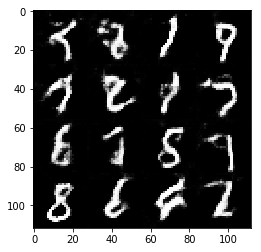

Epoch 2/2 -  Batch 641/936 -  Discriminator loss: 0.3845 -  Generator loss: 3.0248 - 
Epoch 2/2 -  Batch 642/936 -  Discriminator loss: 0.3802 -  Generator loss: 3.2892 - 
Epoch 2/2 -  Batch 643/936 -  Discriminator loss: 0.3764 -  Generator loss: 3.2655 - 
Epoch 2/2 -  Batch 644/936 -  Discriminator loss: 0.3851 -  Generator loss: 3.0008 - 
Epoch 2/2 -  Batch 645/936 -  Discriminator loss: 0.3816 -  Generator loss: 3.7128 - 
Epoch 2/2 -  Batch 646/936 -  Discriminator loss: 0.3943 -  Generator loss: 2.8627 - 
Epoch 2/2 -  Batch 647/936 -  Discriminator loss: 0.3797 -  Generator loss: 3.6285 - 
Epoch 2/2 -  Batch 648/936 -  Discriminator loss: 0.3921 -  Generator loss: 2.8889 - 
Epoch 2/2 -  Batch 649/936 -  Discriminator loss: 0.3915 -  Generator loss: 4.0330 - 
Epoch 2/2 -  Batch 650/936 -  Discriminator loss: 0.3972 -  Generator loss: 2.8278 - 
Epoch 2/2 -  Batch 651/936 -  Discriminator loss: 0.3874 -  Generator loss: 3.5672 - 
Epoch 2/2 -  Batch 652/936 -  Discriminator loss: 0.39

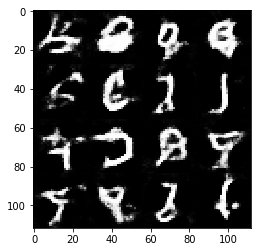

Epoch 2/2 -  Batch 661/936 -  Discriminator loss: 0.3842 -  Generator loss: 3.0383 - 
Epoch 2/2 -  Batch 662/936 -  Discriminator loss: 0.3816 -  Generator loss: 3.7058 - 
Epoch 2/2 -  Batch 663/936 -  Discriminator loss: 0.3966 -  Generator loss: 2.8346 - 
Epoch 2/2 -  Batch 664/936 -  Discriminator loss: 0.3925 -  Generator loss: 3.8196 - 
Epoch 2/2 -  Batch 665/936 -  Discriminator loss: 0.3971 -  Generator loss: 2.8340 - 
Epoch 2/2 -  Batch 666/936 -  Discriminator loss: 0.3892 -  Generator loss: 3.9403 - 
Epoch 2/2 -  Batch 667/936 -  Discriminator loss: 0.3989 -  Generator loss: 2.8132 - 
Epoch 2/2 -  Batch 668/936 -  Discriminator loss: 0.3995 -  Generator loss: 4.0415 - 
Epoch 2/2 -  Batch 669/936 -  Discriminator loss: 0.3929 -  Generator loss: 2.9005 - 
Epoch 2/2 -  Batch 670/936 -  Discriminator loss: 0.3796 -  Generator loss: 3.4673 - 
Epoch 2/2 -  Batch 671/936 -  Discriminator loss: 0.3754 -  Generator loss: 3.2462 - 
Epoch 2/2 -  Batch 672/936 -  Discriminator loss: 0.38

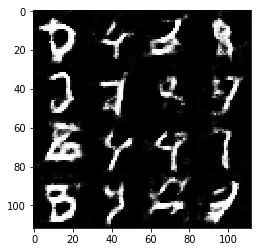

Epoch 2/2 -  Batch 681/936 -  Discriminator loss: 0.3808 -  Generator loss: 3.5919 - 
Epoch 2/2 -  Batch 682/936 -  Discriminator loss: 0.3823 -  Generator loss: 3.0579 - 
Epoch 2/2 -  Batch 683/936 -  Discriminator loss: 0.3778 -  Generator loss: 3.4599 - 
Epoch 2/2 -  Batch 684/936 -  Discriminator loss: 0.3831 -  Generator loss: 3.0839 - 
Epoch 2/2 -  Batch 685/936 -  Discriminator loss: 0.3742 -  Generator loss: 3.2972 - 
Epoch 2/2 -  Batch 686/936 -  Discriminator loss: 0.3780 -  Generator loss: 3.2049 - 
Epoch 2/2 -  Batch 687/936 -  Discriminator loss: 0.3800 -  Generator loss: 3.4240 - 
Epoch 2/2 -  Batch 688/936 -  Discriminator loss: 0.3875 -  Generator loss: 2.9513 - 
Epoch 2/2 -  Batch 689/936 -  Discriminator loss: 0.3800 -  Generator loss: 3.7693 - 
Epoch 2/2 -  Batch 690/936 -  Discriminator loss: 0.3971 -  Generator loss: 2.8687 - 
Epoch 2/2 -  Batch 691/936 -  Discriminator loss: 0.3898 -  Generator loss: 4.0300 - 
Epoch 2/2 -  Batch 692/936 -  Discriminator loss: 0.40

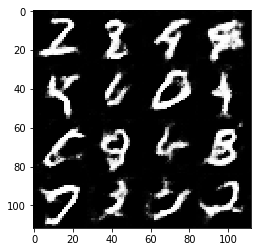

Epoch 2/2 -  Batch 701/936 -  Discriminator loss: 0.3809 -  Generator loss: 3.0983 - 
Epoch 2/2 -  Batch 702/936 -  Discriminator loss: 0.3792 -  Generator loss: 3.5961 - 
Epoch 2/2 -  Batch 703/936 -  Discriminator loss: 0.3963 -  Generator loss: 2.8573 - 
Epoch 2/2 -  Batch 704/936 -  Discriminator loss: 0.3918 -  Generator loss: 3.9297 - 
Epoch 2/2 -  Batch 705/936 -  Discriminator loss: 0.3994 -  Generator loss: 2.8008 - 
Epoch 2/2 -  Batch 706/936 -  Discriminator loss: 0.3906 -  Generator loss: 3.8238 - 
Epoch 2/2 -  Batch 707/936 -  Discriminator loss: 0.3986 -  Generator loss: 2.8541 - 
Epoch 2/2 -  Batch 708/936 -  Discriminator loss: 0.3946 -  Generator loss: 3.9047 - 
Epoch 2/2 -  Batch 709/936 -  Discriminator loss: 0.3970 -  Generator loss: 2.9056 - 
Epoch 2/2 -  Batch 710/936 -  Discriminator loss: 0.3965 -  Generator loss: 3.9007 - 
Epoch 2/2 -  Batch 711/936 -  Discriminator loss: 0.3902 -  Generator loss: 2.9329 - 
Epoch 2/2 -  Batch 712/936 -  Discriminator loss: 0.38

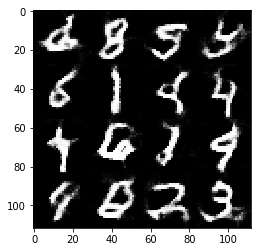

Epoch 2/2 -  Batch 721/936 -  Discriminator loss: 0.3764 -  Generator loss: 3.4426 - 
Epoch 2/2 -  Batch 722/936 -  Discriminator loss: 0.3776 -  Generator loss: 3.2020 - 
Epoch 2/2 -  Batch 723/936 -  Discriminator loss: 0.3796 -  Generator loss: 3.1501 - 
Epoch 2/2 -  Batch 724/936 -  Discriminator loss: 0.3747 -  Generator loss: 3.2805 - 
Epoch 2/2 -  Batch 725/936 -  Discriminator loss: 0.3781 -  Generator loss: 3.2143 - 
Epoch 2/2 -  Batch 726/936 -  Discriminator loss: 0.3757 -  Generator loss: 3.4100 - 
Epoch 2/2 -  Batch 727/936 -  Discriminator loss: 0.3816 -  Generator loss: 3.0693 - 
Epoch 2/2 -  Batch 728/936 -  Discriminator loss: 0.3754 -  Generator loss: 3.4467 - 
Epoch 2/2 -  Batch 729/936 -  Discriminator loss: 0.3818 -  Generator loss: 3.0605 - 
Epoch 2/2 -  Batch 730/936 -  Discriminator loss: 0.3789 -  Generator loss: 3.6994 - 
Epoch 2/2 -  Batch 731/936 -  Discriminator loss: 0.3917 -  Generator loss: 2.8997 - 
Epoch 2/2 -  Batch 732/936 -  Discriminator loss: 0.37

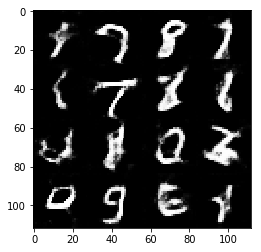

Epoch 2/2 -  Batch 741/936 -  Discriminator loss: 0.4030 -  Generator loss: 2.7229 - 
Epoch 2/2 -  Batch 742/936 -  Discriminator loss: 0.3978 -  Generator loss: 4.0459 - 
Epoch 2/2 -  Batch 743/936 -  Discriminator loss: 0.4056 -  Generator loss: 2.7476 - 
Epoch 2/2 -  Batch 744/936 -  Discriminator loss: 0.4016 -  Generator loss: 4.0286 - 
Epoch 2/2 -  Batch 745/936 -  Discriminator loss: 0.3986 -  Generator loss: 2.9039 - 
Epoch 2/2 -  Batch 746/936 -  Discriminator loss: 0.3844 -  Generator loss: 3.6334 - 
Epoch 2/2 -  Batch 747/936 -  Discriminator loss: 0.3844 -  Generator loss: 3.0435 - 
Epoch 2/2 -  Batch 748/936 -  Discriminator loss: 0.3802 -  Generator loss: 3.5423 - 
Epoch 2/2 -  Batch 749/936 -  Discriminator loss: 0.3825 -  Generator loss: 3.0496 - 
Epoch 2/2 -  Batch 750/936 -  Discriminator loss: 0.3764 -  Generator loss: 3.5885 - 
Epoch 2/2 -  Batch 751/936 -  Discriminator loss: 0.3894 -  Generator loss: 2.9849 - 
Epoch 2/2 -  Batch 752/936 -  Discriminator loss: 0.37

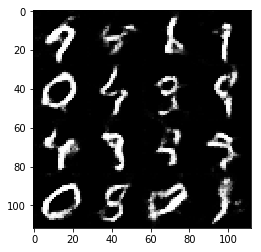

Epoch 2/2 -  Batch 761/936 -  Discriminator loss: 0.3837 -  Generator loss: 3.0222 - 
Epoch 2/2 -  Batch 762/936 -  Discriminator loss: 0.3753 -  Generator loss: 3.4548 - 
Epoch 2/2 -  Batch 763/936 -  Discriminator loss: 0.3779 -  Generator loss: 3.2433 - 
Epoch 2/2 -  Batch 764/936 -  Discriminator loss: 0.3787 -  Generator loss: 3.1384 - 
Epoch 2/2 -  Batch 765/936 -  Discriminator loss: 0.3773 -  Generator loss: 3.5603 - 
Epoch 2/2 -  Batch 766/936 -  Discriminator loss: 0.3889 -  Generator loss: 2.9054 - 
Epoch 2/2 -  Batch 767/936 -  Discriminator loss: 0.3829 -  Generator loss: 3.5835 - 
Epoch 2/2 -  Batch 768/936 -  Discriminator loss: 0.3880 -  Generator loss: 2.9512 - 
Epoch 2/2 -  Batch 769/936 -  Discriminator loss: 0.3829 -  Generator loss: 3.7736 - 
Epoch 2/2 -  Batch 770/936 -  Discriminator loss: 0.3909 -  Generator loss: 2.9155 - 
Epoch 2/2 -  Batch 771/936 -  Discriminator loss: 0.3935 -  Generator loss: 4.0145 - 
Epoch 2/2 -  Batch 772/936 -  Discriminator loss: 0.39

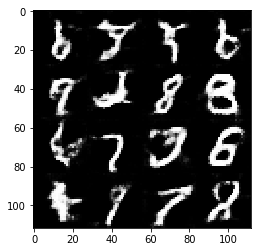

Epoch 2/2 -  Batch 781/936 -  Discriminator loss: 0.3781 -  Generator loss: 3.2502 - 
Epoch 2/2 -  Batch 782/936 -  Discriminator loss: 0.3752 -  Generator loss: 3.2865 - 
Epoch 2/2 -  Batch 783/936 -  Discriminator loss: 0.3745 -  Generator loss: 3.2893 - 
Epoch 2/2 -  Batch 784/936 -  Discriminator loss: 0.3772 -  Generator loss: 3.2280 - 
Epoch 2/2 -  Batch 785/936 -  Discriminator loss: 0.3762 -  Generator loss: 3.4066 - 
Epoch 2/2 -  Batch 786/936 -  Discriminator loss: 0.3788 -  Generator loss: 3.1627 - 
Epoch 2/2 -  Batch 787/936 -  Discriminator loss: 0.3773 -  Generator loss: 3.2640 - 
Epoch 2/2 -  Batch 788/936 -  Discriminator loss: 0.3786 -  Generator loss: 3.3503 - 
Epoch 2/2 -  Batch 789/936 -  Discriminator loss: 0.3817 -  Generator loss: 3.0542 - 
Epoch 2/2 -  Batch 790/936 -  Discriminator loss: 0.3882 -  Generator loss: 3.9617 - 
Epoch 2/2 -  Batch 791/936 -  Discriminator loss: 0.4059 -  Generator loss: 2.7437 - 
Epoch 2/2 -  Batch 792/936 -  Discriminator loss: 0.42

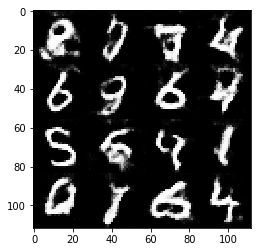

Epoch 2/2 -  Batch 801/936 -  Discriminator loss: 0.3892 -  Generator loss: 2.9765 - 
Epoch 2/2 -  Batch 802/936 -  Discriminator loss: 0.3788 -  Generator loss: 3.2982 - 
Epoch 2/2 -  Batch 803/936 -  Discriminator loss: 0.3782 -  Generator loss: 3.2343 - 
Epoch 2/2 -  Batch 804/936 -  Discriminator loss: 0.3759 -  Generator loss: 3.2855 - 
Epoch 2/2 -  Batch 805/936 -  Discriminator loss: 0.3780 -  Generator loss: 3.2188 - 
Epoch 2/2 -  Batch 806/936 -  Discriminator loss: 0.3785 -  Generator loss: 3.2871 - 
Epoch 2/2 -  Batch 807/936 -  Discriminator loss: 0.3769 -  Generator loss: 3.2275 - 
Epoch 2/2 -  Batch 808/936 -  Discriminator loss: 0.3830 -  Generator loss: 3.0751 - 
Epoch 2/2 -  Batch 809/936 -  Discriminator loss: 0.3807 -  Generator loss: 3.4484 - 
Epoch 2/2 -  Batch 810/936 -  Discriminator loss: 0.3848 -  Generator loss: 2.9877 - 
Epoch 2/2 -  Batch 811/936 -  Discriminator loss: 0.3877 -  Generator loss: 3.4112 - 
Epoch 2/2 -  Batch 812/936 -  Discriminator loss: 0.38

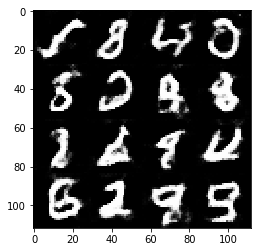

Epoch 2/2 -  Batch 821/936 -  Discriminator loss: 0.3808 -  Generator loss: 3.6826 - 
Epoch 2/2 -  Batch 822/936 -  Discriminator loss: 0.3870 -  Generator loss: 2.9716 - 
Epoch 2/2 -  Batch 823/936 -  Discriminator loss: 0.3865 -  Generator loss: 3.8468 - 
Epoch 2/2 -  Batch 824/936 -  Discriminator loss: 0.3998 -  Generator loss: 2.8559 - 
Epoch 2/2 -  Batch 825/936 -  Discriminator loss: 0.3907 -  Generator loss: 3.9428 - 
Epoch 2/2 -  Batch 826/936 -  Discriminator loss: 0.3903 -  Generator loss: 2.9870 - 
Epoch 2/2 -  Batch 827/936 -  Discriminator loss: 0.3810 -  Generator loss: 3.5302 - 
Epoch 2/2 -  Batch 828/936 -  Discriminator loss: 0.3861 -  Generator loss: 3.0082 - 
Epoch 2/2 -  Batch 829/936 -  Discriminator loss: 0.3801 -  Generator loss: 3.5517 - 
Epoch 2/2 -  Batch 830/936 -  Discriminator loss: 0.3812 -  Generator loss: 3.0845 - 
Epoch 2/2 -  Batch 831/936 -  Discriminator loss: 0.3786 -  Generator loss: 3.4755 - 
Epoch 2/2 -  Batch 832/936 -  Discriminator loss: 0.38

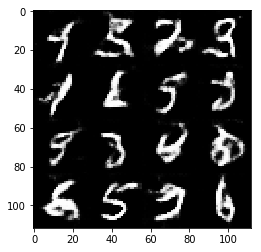

Epoch 2/2 -  Batch 841/936 -  Discriminator loss: 0.3755 -  Generator loss: 3.3373 - 
Epoch 2/2 -  Batch 842/936 -  Discriminator loss: 0.3798 -  Generator loss: 3.1478 - 
Epoch 2/2 -  Batch 843/936 -  Discriminator loss: 0.3719 -  Generator loss: 3.4371 - 
Epoch 2/2 -  Batch 844/936 -  Discriminator loss: 0.3765 -  Generator loss: 3.1776 - 
Epoch 2/2 -  Batch 845/936 -  Discriminator loss: 0.3748 -  Generator loss: 3.4047 - 
Epoch 2/2 -  Batch 846/936 -  Discriminator loss: 0.3850 -  Generator loss: 3.0622 - 
Epoch 2/2 -  Batch 847/936 -  Discriminator loss: 0.3857 -  Generator loss: 3.7935 - 
Epoch 2/2 -  Batch 848/936 -  Discriminator loss: 0.4166 -  Generator loss: 2.6538 - 
Epoch 2/2 -  Batch 849/936 -  Discriminator loss: 0.5033 -  Generator loss: 5.4657 - 
Epoch 2/2 -  Batch 850/936 -  Discriminator loss: 0.3817 -  Generator loss: 3.6657 - 
Epoch 2/2 -  Batch 851/936 -  Discriminator loss: 0.4738 -  Generator loss: 2.3375 - 
Epoch 2/2 -  Batch 852/936 -  Discriminator loss: 0.57

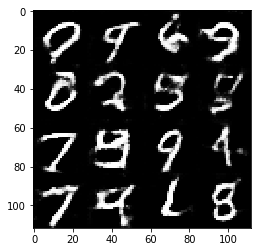

Epoch 2/2 -  Batch 861/936 -  Discriminator loss: 0.3827 -  Generator loss: 3.0504 - 
Epoch 2/2 -  Batch 862/936 -  Discriminator loss: 0.3762 -  Generator loss: 3.3929 - 
Epoch 2/2 -  Batch 863/936 -  Discriminator loss: 0.3790 -  Generator loss: 3.2294 - 
Epoch 2/2 -  Batch 864/936 -  Discriminator loss: 0.3753 -  Generator loss: 3.2430 - 
Epoch 2/2 -  Batch 865/936 -  Discriminator loss: 0.3782 -  Generator loss: 3.2451 - 
Epoch 2/2 -  Batch 866/936 -  Discriminator loss: 0.3751 -  Generator loss: 3.3133 - 
Epoch 2/2 -  Batch 867/936 -  Discriminator loss: 0.3795 -  Generator loss: 3.1204 - 
Epoch 2/2 -  Batch 868/936 -  Discriminator loss: 0.3755 -  Generator loss: 3.3948 - 
Epoch 2/2 -  Batch 869/936 -  Discriminator loss: 0.3827 -  Generator loss: 3.0578 - 
Epoch 2/2 -  Batch 870/936 -  Discriminator loss: 0.3798 -  Generator loss: 3.4948 - 
Epoch 2/2 -  Batch 871/936 -  Discriminator loss: 0.3810 -  Generator loss: 3.1155 - 
Epoch 2/2 -  Batch 872/936 -  Discriminator loss: 0.37

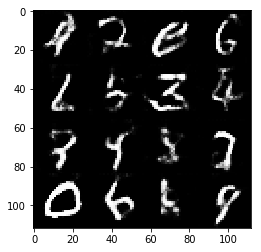

Epoch 2/2 -  Batch 881/936 -  Discriminator loss: 0.3824 -  Generator loss: 3.1077 - 
Epoch 2/2 -  Batch 882/936 -  Discriminator loss: 0.3757 -  Generator loss: 3.3772 - 
Epoch 2/2 -  Batch 883/936 -  Discriminator loss: 0.3758 -  Generator loss: 3.2325 - 
Epoch 2/2 -  Batch 884/936 -  Discriminator loss: 0.3758 -  Generator loss: 3.2067 - 
Epoch 2/2 -  Batch 885/936 -  Discriminator loss: 0.3756 -  Generator loss: 3.3231 - 
Epoch 2/2 -  Batch 886/936 -  Discriminator loss: 0.3760 -  Generator loss: 3.2518 - 
Epoch 2/2 -  Batch 887/936 -  Discriminator loss: 0.3772 -  Generator loss: 3.2261 - 
Epoch 2/2 -  Batch 888/936 -  Discriminator loss: 0.3848 -  Generator loss: 3.0717 - 
Epoch 2/2 -  Batch 889/936 -  Discriminator loss: 0.3765 -  Generator loss: 3.3936 - 
Epoch 2/2 -  Batch 890/936 -  Discriminator loss: 0.3772 -  Generator loss: 3.1725 - 
Epoch 2/2 -  Batch 891/936 -  Discriminator loss: 0.3773 -  Generator loss: 3.3485 - 
Epoch 2/2 -  Batch 892/936 -  Discriminator loss: 0.38

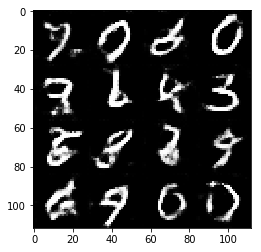

Epoch 2/2 -  Batch 901/936 -  Discriminator loss: 0.3760 -  Generator loss: 3.3529 - 
Epoch 2/2 -  Batch 902/936 -  Discriminator loss: 0.3790 -  Generator loss: 3.1192 - 
Epoch 2/2 -  Batch 903/936 -  Discriminator loss: 0.3805 -  Generator loss: 3.4216 - 
Epoch 2/2 -  Batch 904/936 -  Discriminator loss: 0.3800 -  Generator loss: 3.1174 - 
Epoch 2/2 -  Batch 905/936 -  Discriminator loss: 0.3806 -  Generator loss: 3.1149 - 
Epoch 2/2 -  Batch 906/936 -  Discriminator loss: 0.3725 -  Generator loss: 3.6037 - 
Epoch 2/2 -  Batch 907/936 -  Discriminator loss: 0.3863 -  Generator loss: 2.9843 - 
Epoch 2/2 -  Batch 908/936 -  Discriminator loss: 0.3814 -  Generator loss: 3.7389 - 
Epoch 2/2 -  Batch 909/936 -  Discriminator loss: 0.3841 -  Generator loss: 3.0150 - 
Epoch 2/2 -  Batch 910/936 -  Discriminator loss: 0.3793 -  Generator loss: 3.4667 - 
Epoch 2/2 -  Batch 911/936 -  Discriminator loss: 0.3864 -  Generator loss: 2.9615 - 
Epoch 2/2 -  Batch 912/936 -  Discriminator loss: 0.37

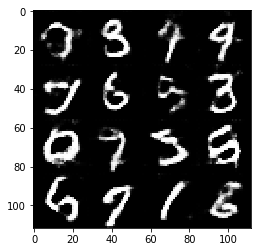

Epoch 2/2 -  Batch 921/936 -  Discriminator loss: 0.3848 -  Generator loss: 3.0123 - 
Epoch 2/2 -  Batch 922/936 -  Discriminator loss: 0.3769 -  Generator loss: 3.5346 - 
Epoch 2/2 -  Batch 923/936 -  Discriminator loss: 0.3850 -  Generator loss: 3.0021 - 
Epoch 2/2 -  Batch 924/936 -  Discriminator loss: 0.3779 -  Generator loss: 3.6796 - 
Epoch 2/2 -  Batch 925/936 -  Discriminator loss: 0.3918 -  Generator loss: 2.9009 - 
Epoch 2/2 -  Batch 926/936 -  Discriminator loss: 0.3971 -  Generator loss: 3.9166 - 
Epoch 2/2 -  Batch 927/936 -  Discriminator loss: 0.3933 -  Generator loss: 2.8895 - 
Epoch 2/2 -  Batch 928/936 -  Discriminator loss: 0.3772 -  Generator loss: 3.6993 - 
Epoch 2/2 -  Batch 929/936 -  Discriminator loss: 0.3914 -  Generator loss: 2.9152 - 
Epoch 2/2 -  Batch 930/936 -  Discriminator loss: 0.3864 -  Generator loss: 3.9739 - 
Epoch 2/2 -  Batch 931/936 -  Discriminator loss: 0.3957 -  Generator loss: 2.8538 - 
Epoch 2/2 -  Batch 932/936 -  Discriminator loss: 0.39

In [179]:
batch_size = 128
z_dim = 128
learning_rate = 0.0002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 -  Batch 1/1582 -  Discriminator loss: 1.3107 -  Generator loss: 0.5529 - 
Epoch 1/1 -  Batch 2/1582 -  Discriminator loss: 0.8683 -  Generator loss: 1.0690 - 
Epoch 1/1 -  Batch 3/1582 -  Discriminator loss: 0.7684 -  Generator loss: 1.3486 - 
Epoch 1/1 -  Batch 4/1582 -  Discriminator loss: 0.7182 -  Generator loss: 1.5084 - 
Epoch 1/1 -  Batch 5/1582 -  Discriminator loss: 0.6522 -  Generator loss: 1.6655 - 
Epoch 1/1 -  Batch 6/1582 -  Discriminator loss: 0.5907 -  Generator loss: 1.8739 - 
Epoch 1/1 -  Batch 7/1582 -  Discriminator loss: 0.5444 -  Generator loss: 1.9661 - 
Epoch 1/1 -  Batch 8/1582 -  Discriminator loss: 0.5292 -  Generator loss: 2.0743 - 
Epoch 1/1 -  Batch 9/1582 -  Discriminator loss: 0.5205 -  Generator loss: 2.1081 - 
Epoch 1/1 -  Batch 10/1582 -  Discriminator loss: 0.4997 -  Generator loss: 2.1716 - 
Epoch 1/1 -  Batch 11/1582 -  Discriminator loss: 0.5077 -  Generator loss: 2.1756 - 
Epoch 1/1 -  Batch 12/1582 -  Discriminator loss: 0.4789 -  Gen

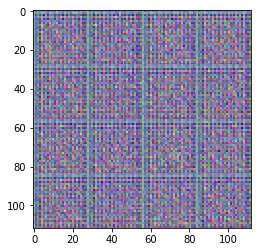

Epoch 1/1 -  Batch 21/1582 -  Discriminator loss: 0.4398 -  Generator loss: 2.6189 - 
Epoch 1/1 -  Batch 22/1582 -  Discriminator loss: 0.4351 -  Generator loss: 2.6345 - 
Epoch 1/1 -  Batch 23/1582 -  Discriminator loss: 0.4236 -  Generator loss: 2.7878 - 
Epoch 1/1 -  Batch 24/1582 -  Discriminator loss: 0.4278 -  Generator loss: 2.8036 - 
Epoch 1/1 -  Batch 25/1582 -  Discriminator loss: 0.4203 -  Generator loss: 2.8254 - 
Epoch 1/1 -  Batch 26/1582 -  Discriminator loss: 0.4151 -  Generator loss: 2.9110 - 
Epoch 1/1 -  Batch 27/1582 -  Discriminator loss: 0.4099 -  Generator loss: 3.0467 - 
Epoch 1/1 -  Batch 28/1582 -  Discriminator loss: 0.4086 -  Generator loss: 3.1461 - 
Epoch 1/1 -  Batch 29/1582 -  Discriminator loss: 0.3979 -  Generator loss: 3.0897 - 
Epoch 1/1 -  Batch 30/1582 -  Discriminator loss: 0.4048 -  Generator loss: 3.0687 - 
Epoch 1/1 -  Batch 31/1582 -  Discriminator loss: 0.4041 -  Generator loss: 3.0727 - 
Epoch 1/1 -  Batch 32/1582 -  Discriminator loss: 0.40

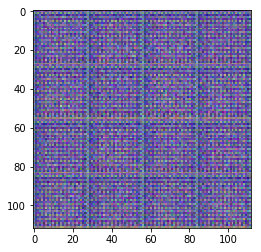

Epoch 1/1 -  Batch 41/1582 -  Discriminator loss: 0.3822 -  Generator loss: 3.5435 - 
Epoch 1/1 -  Batch 42/1582 -  Discriminator loss: 0.3907 -  Generator loss: 3.3540 - 
Epoch 1/1 -  Batch 43/1582 -  Discriminator loss: 0.3891 -  Generator loss: 3.2664 - 
Epoch 1/1 -  Batch 44/1582 -  Discriminator loss: 0.3952 -  Generator loss: 3.2199 - 
Epoch 1/1 -  Batch 45/1582 -  Discriminator loss: 0.3930 -  Generator loss: 3.2450 - 
Epoch 1/1 -  Batch 46/1582 -  Discriminator loss: 0.3835 -  Generator loss: 3.4149 - 
Epoch 1/1 -  Batch 47/1582 -  Discriminator loss: 0.3849 -  Generator loss: 3.3379 - 
Epoch 1/1 -  Batch 48/1582 -  Discriminator loss: 0.3863 -  Generator loss: 3.3220 - 
Epoch 1/1 -  Batch 49/1582 -  Discriminator loss: 0.3798 -  Generator loss: 3.4867 - 
Epoch 1/1 -  Batch 50/1582 -  Discriminator loss: 0.3709 -  Generator loss: 3.6170 - 
Epoch 1/1 -  Batch 51/1582 -  Discriminator loss: 0.3734 -  Generator loss: 3.7032 - 
Epoch 1/1 -  Batch 52/1582 -  Discriminator loss: 0.37

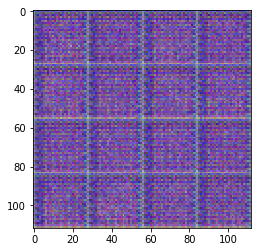

Epoch 1/1 -  Batch 61/1582 -  Discriminator loss: 0.3660 -  Generator loss: 3.7616 - 
Epoch 1/1 -  Batch 62/1582 -  Discriminator loss: 0.3668 -  Generator loss: 3.8228 - 
Epoch 1/1 -  Batch 63/1582 -  Discriminator loss: 0.3649 -  Generator loss: 3.8844 - 
Epoch 1/1 -  Batch 64/1582 -  Discriminator loss: 0.3626 -  Generator loss: 3.8605 - 
Epoch 1/1 -  Batch 65/1582 -  Discriminator loss: 0.3591 -  Generator loss: 4.0243 - 
Epoch 1/1 -  Batch 66/1582 -  Discriminator loss: 0.3647 -  Generator loss: 3.8714 - 
Epoch 1/1 -  Batch 67/1582 -  Discriminator loss: 0.3607 -  Generator loss: 3.8913 - 
Epoch 1/1 -  Batch 68/1582 -  Discriminator loss: 0.3574 -  Generator loss: 4.1018 - 
Epoch 1/1 -  Batch 69/1582 -  Discriminator loss: 0.3607 -  Generator loss: 4.1008 - 
Epoch 1/1 -  Batch 70/1582 -  Discriminator loss: 0.3608 -  Generator loss: 3.8847 - 
Epoch 1/1 -  Batch 71/1582 -  Discriminator loss: 0.3665 -  Generator loss: 3.7289 - 
Epoch 1/1 -  Batch 72/1582 -  Discriminator loss: 0.36

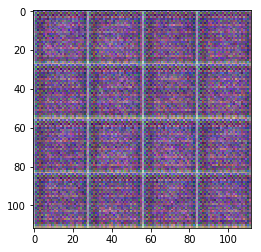

Epoch 1/1 -  Batch 81/1582 -  Discriminator loss: 0.3571 -  Generator loss: 4.0352 - 
Epoch 1/1 -  Batch 82/1582 -  Discriminator loss: 0.3563 -  Generator loss: 4.1264 - 
Epoch 1/1 -  Batch 83/1582 -  Discriminator loss: 0.3624 -  Generator loss: 3.7805 - 
Epoch 1/1 -  Batch 84/1582 -  Discriminator loss: 0.3574 -  Generator loss: 4.0755 - 
Epoch 1/1 -  Batch 85/1582 -  Discriminator loss: 0.3631 -  Generator loss: 3.7876 - 
Epoch 1/1 -  Batch 86/1582 -  Discriminator loss: 0.3634 -  Generator loss: 3.7537 - 
Epoch 1/1 -  Batch 87/1582 -  Discriminator loss: 0.3633 -  Generator loss: 3.8775 - 
Epoch 1/1 -  Batch 88/1582 -  Discriminator loss: 0.3597 -  Generator loss: 3.9536 - 
Epoch 1/1 -  Batch 89/1582 -  Discriminator loss: 0.3561 -  Generator loss: 4.1365 - 
Epoch 1/1 -  Batch 90/1582 -  Discriminator loss: 0.3597 -  Generator loss: 3.8791 - 
Epoch 1/1 -  Batch 91/1582 -  Discriminator loss: 0.3544 -  Generator loss: 4.1000 - 
Epoch 1/1 -  Batch 92/1582 -  Discriminator loss: 0.35

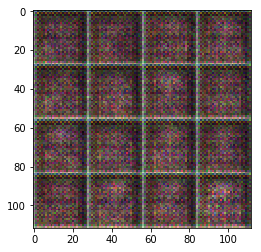

Epoch 1/1 -  Batch 101/1582 -  Discriminator loss: 0.3581 -  Generator loss: 4.0831 - 
Epoch 1/1 -  Batch 102/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.9465 - 
Epoch 1/1 -  Batch 103/1582 -  Discriminator loss: 0.3557 -  Generator loss: 4.1245 - 
Epoch 1/1 -  Batch 104/1582 -  Discriminator loss: 0.3581 -  Generator loss: 4.1474 - 
Epoch 1/1 -  Batch 105/1582 -  Discriminator loss: 0.3569 -  Generator loss: 4.1166 - 
Epoch 1/1 -  Batch 106/1582 -  Discriminator loss: 0.3627 -  Generator loss: 3.8400 - 
Epoch 1/1 -  Batch 107/1582 -  Discriminator loss: 0.3578 -  Generator loss: 4.3916 - 
Epoch 1/1 -  Batch 108/1582 -  Discriminator loss: 0.3613 -  Generator loss: 3.9775 - 
Epoch 1/1 -  Batch 109/1582 -  Discriminator loss: 0.3600 -  Generator loss: 4.0099 - 
Epoch 1/1 -  Batch 110/1582 -  Discriminator loss: 0.3608 -  Generator loss: 4.1918 - 
Epoch 1/1 -  Batch 111/1582 -  Discriminator loss: 0.3595 -  Generator loss: 4.0683 - 
Epoch 1/1 -  Batch 112/1582 -  Discriminato

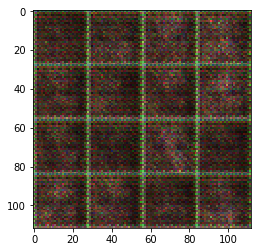

Epoch 1/1 -  Batch 121/1582 -  Discriminator loss: 0.3601 -  Generator loss: 3.9388 - 
Epoch 1/1 -  Batch 122/1582 -  Discriminator loss: 0.3623 -  Generator loss: 3.9720 - 
Epoch 1/1 -  Batch 123/1582 -  Discriminator loss: 0.3640 -  Generator loss: 3.6598 - 
Epoch 1/1 -  Batch 124/1582 -  Discriminator loss: 0.3645 -  Generator loss: 4.1710 - 
Epoch 1/1 -  Batch 125/1582 -  Discriminator loss: 0.3801 -  Generator loss: 3.2891 - 
Epoch 1/1 -  Batch 126/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.6806 - 
Epoch 1/1 -  Batch 127/1582 -  Discriminator loss: 0.3637 -  Generator loss: 3.9021 - 
Epoch 1/1 -  Batch 128/1582 -  Discriminator loss: 0.3750 -  Generator loss: 3.3816 - 
Epoch 1/1 -  Batch 129/1582 -  Discriminator loss: 0.3721 -  Generator loss: 3.7736 - 
Epoch 1/1 -  Batch 130/1582 -  Discriminator loss: 0.3842 -  Generator loss: 3.2082 - 
Epoch 1/1 -  Batch 131/1582 -  Discriminator loss: 0.3865 -  Generator loss: 4.2944 - 
Epoch 1/1 -  Batch 132/1582 -  Discriminato

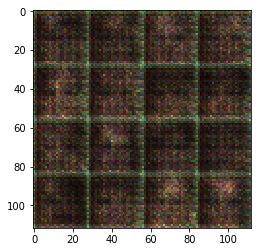

Epoch 1/1 -  Batch 141/1582 -  Discriminator loss: 0.3866 -  Generator loss: 3.1920 - 
Epoch 1/1 -  Batch 142/1582 -  Discriminator loss: 0.3876 -  Generator loss: 4.1846 - 
Epoch 1/1 -  Batch 143/1582 -  Discriminator loss: 0.3794 -  Generator loss: 3.4988 - 
Epoch 1/1 -  Batch 144/1582 -  Discriminator loss: 0.3792 -  Generator loss: 3.3665 - 
Epoch 1/1 -  Batch 145/1582 -  Discriminator loss: 0.3836 -  Generator loss: 4.1680 - 
Epoch 1/1 -  Batch 146/1582 -  Discriminator loss: 0.3745 -  Generator loss: 3.4821 - 
Epoch 1/1 -  Batch 147/1582 -  Discriminator loss: 0.3758 -  Generator loss: 3.4486 - 
Epoch 1/1 -  Batch 148/1582 -  Discriminator loss: 0.3756 -  Generator loss: 3.6879 - 
Epoch 1/1 -  Batch 149/1582 -  Discriminator loss: 0.3800 -  Generator loss: 3.4749 - 
Epoch 1/1 -  Batch 150/1582 -  Discriminator loss: 0.3856 -  Generator loss: 3.2538 - 
Epoch 1/1 -  Batch 151/1582 -  Discriminator loss: 0.3802 -  Generator loss: 3.6270 - 
Epoch 1/1 -  Batch 152/1582 -  Discriminato

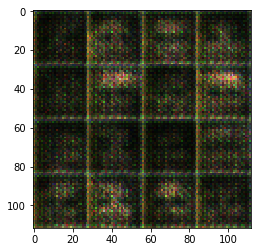

Epoch 1/1 -  Batch 161/1582 -  Discriminator loss: 0.3679 -  Generator loss: 3.7685 - 
Epoch 1/1 -  Batch 162/1582 -  Discriminator loss: 0.3825 -  Generator loss: 3.2341 - 
Epoch 1/1 -  Batch 163/1582 -  Discriminator loss: 0.3810 -  Generator loss: 4.0346 - 
Epoch 1/1 -  Batch 164/1582 -  Discriminator loss: 0.3808 -  Generator loss: 3.2647 - 
Epoch 1/1 -  Batch 165/1582 -  Discriminator loss: 0.3741 -  Generator loss: 4.0493 - 
Epoch 1/1 -  Batch 166/1582 -  Discriminator loss: 0.3748 -  Generator loss: 3.3455 - 
Epoch 1/1 -  Batch 167/1582 -  Discriminator loss: 0.3798 -  Generator loss: 4.3505 - 
Epoch 1/1 -  Batch 168/1582 -  Discriminator loss: 0.3795 -  Generator loss: 3.3628 - 
Epoch 1/1 -  Batch 169/1582 -  Discriminator loss: 0.3747 -  Generator loss: 4.1602 - 
Epoch 1/1 -  Batch 170/1582 -  Discriminator loss: 0.3699 -  Generator loss: 3.5044 - 
Epoch 1/1 -  Batch 171/1582 -  Discriminator loss: 0.3703 -  Generator loss: 3.5109 - 
Epoch 1/1 -  Batch 172/1582 -  Discriminato

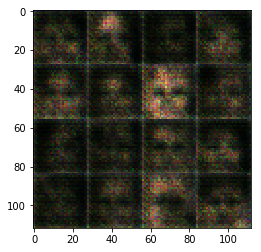

Epoch 1/1 -  Batch 181/1582 -  Discriminator loss: 0.3763 -  Generator loss: 3.5319 - 
Epoch 1/1 -  Batch 182/1582 -  Discriminator loss: 0.3774 -  Generator loss: 3.8129 - 
Epoch 1/1 -  Batch 183/1582 -  Discriminator loss: 0.3732 -  Generator loss: 3.5189 - 
Epoch 1/1 -  Batch 184/1582 -  Discriminator loss: 0.3691 -  Generator loss: 3.6951 - 
Epoch 1/1 -  Batch 185/1582 -  Discriminator loss: 0.3665 -  Generator loss: 3.7146 - 
Epoch 1/1 -  Batch 186/1582 -  Discriminator loss: 0.3681 -  Generator loss: 3.8494 - 
Epoch 1/1 -  Batch 187/1582 -  Discriminator loss: 0.3687 -  Generator loss: 3.4952 - 
Epoch 1/1 -  Batch 188/1582 -  Discriminator loss: 0.3695 -  Generator loss: 3.8315 - 
Epoch 1/1 -  Batch 189/1582 -  Discriminator loss: 0.3692 -  Generator loss: 3.5292 - 
Epoch 1/1 -  Batch 190/1582 -  Discriminator loss: 0.3703 -  Generator loss: 3.5772 - 
Epoch 1/1 -  Batch 191/1582 -  Discriminator loss: 0.3730 -  Generator loss: 3.4389 - 
Epoch 1/1 -  Batch 192/1582 -  Discriminato

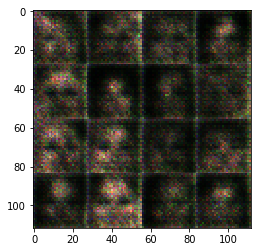

Epoch 1/1 -  Batch 201/1582 -  Discriminator loss: 0.3945 -  Generator loss: 3.0789 - 
Epoch 1/1 -  Batch 202/1582 -  Discriminator loss: 0.4017 -  Generator loss: 4.4165 - 
Epoch 1/1 -  Batch 203/1582 -  Discriminator loss: 0.3824 -  Generator loss: 3.2970 - 
Epoch 1/1 -  Batch 204/1582 -  Discriminator loss: 0.3811 -  Generator loss: 3.5433 - 
Epoch 1/1 -  Batch 205/1582 -  Discriminator loss: 0.3733 -  Generator loss: 3.7300 - 
Epoch 1/1 -  Batch 206/1582 -  Discriminator loss: 0.3768 -  Generator loss: 3.3255 - 
Epoch 1/1 -  Batch 207/1582 -  Discriminator loss: 0.3774 -  Generator loss: 3.8768 - 
Epoch 1/1 -  Batch 208/1582 -  Discriminator loss: 0.3842 -  Generator loss: 3.2182 - 
Epoch 1/1 -  Batch 209/1582 -  Discriminator loss: 0.3838 -  Generator loss: 3.8054 - 
Epoch 1/1 -  Batch 210/1582 -  Discriminator loss: 0.3829 -  Generator loss: 3.2057 - 
Epoch 1/1 -  Batch 211/1582 -  Discriminator loss: 0.3777 -  Generator loss: 3.7320 - 
Epoch 1/1 -  Batch 212/1582 -  Discriminato

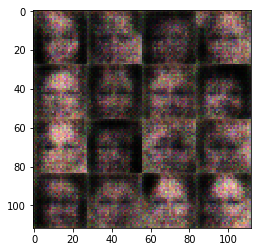

Epoch 1/1 -  Batch 221/1582 -  Discriminator loss: 0.3776 -  Generator loss: 3.3779 - 
Epoch 1/1 -  Batch 222/1582 -  Discriminator loss: 0.3789 -  Generator loss: 3.8568 - 
Epoch 1/1 -  Batch 223/1582 -  Discriminator loss: 0.3677 -  Generator loss: 3.5233 - 
Epoch 1/1 -  Batch 224/1582 -  Discriminator loss: 0.3732 -  Generator loss: 3.3965 - 
Epoch 1/1 -  Batch 225/1582 -  Discriminator loss: 0.3805 -  Generator loss: 4.0844 - 
Epoch 1/1 -  Batch 226/1582 -  Discriminator loss: 0.3980 -  Generator loss: 2.8909 - 
Epoch 1/1 -  Batch 227/1582 -  Discriminator loss: 0.4035 -  Generator loss: 4.3546 - 
Epoch 1/1 -  Batch 228/1582 -  Discriminator loss: 0.3802 -  Generator loss: 3.2168 - 
Epoch 1/1 -  Batch 229/1582 -  Discriminator loss: 0.3801 -  Generator loss: 3.8812 - 
Epoch 1/1 -  Batch 230/1582 -  Discriminator loss: 0.3861 -  Generator loss: 3.0620 - 
Epoch 1/1 -  Batch 231/1582 -  Discriminator loss: 0.3880 -  Generator loss: 4.0515 - 
Epoch 1/1 -  Batch 232/1582 -  Discriminato

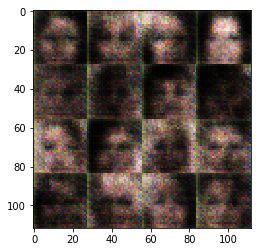

Epoch 1/1 -  Batch 241/1582 -  Discriminator loss: 0.3754 -  Generator loss: 3.3912 - 
Epoch 1/1 -  Batch 242/1582 -  Discriminator loss: 0.3756 -  Generator loss: 3.5756 - 
Epoch 1/1 -  Batch 243/1582 -  Discriminator loss: 0.3724 -  Generator loss: 3.4789 - 
Epoch 1/1 -  Batch 244/1582 -  Discriminator loss: 0.3731 -  Generator loss: 3.4903 - 
Epoch 1/1 -  Batch 245/1582 -  Discriminator loss: 0.3703 -  Generator loss: 3.4426 - 
Epoch 1/1 -  Batch 246/1582 -  Discriminator loss: 0.3747 -  Generator loss: 3.5797 - 
Epoch 1/1 -  Batch 247/1582 -  Discriminator loss: 0.3717 -  Generator loss: 3.4615 - 
Epoch 1/1 -  Batch 248/1582 -  Discriminator loss: 0.3726 -  Generator loss: 3.5863 - 
Epoch 1/1 -  Batch 249/1582 -  Discriminator loss: 0.3859 -  Generator loss: 3.1279 - 
Epoch 1/1 -  Batch 250/1582 -  Discriminator loss: 0.3891 -  Generator loss: 4.2069 - 
Epoch 1/1 -  Batch 251/1582 -  Discriminator loss: 0.3969 -  Generator loss: 3.0831 - 
Epoch 1/1 -  Batch 252/1582 -  Discriminato

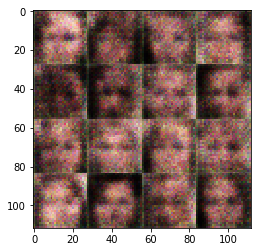

Epoch 1/1 -  Batch 261/1582 -  Discriminator loss: 0.3784 -  Generator loss: 3.2463 - 
Epoch 1/1 -  Batch 262/1582 -  Discriminator loss: 0.3764 -  Generator loss: 3.5741 - 
Epoch 1/1 -  Batch 263/1582 -  Discriminator loss: 0.3712 -  Generator loss: 3.6777 - 
Epoch 1/1 -  Batch 264/1582 -  Discriminator loss: 0.3727 -  Generator loss: 3.3897 - 
Epoch 1/1 -  Batch 265/1582 -  Discriminator loss: 0.3765 -  Generator loss: 3.3914 - 
Epoch 1/1 -  Batch 266/1582 -  Discriminator loss: 0.3744 -  Generator loss: 3.9119 - 
Epoch 1/1 -  Batch 267/1582 -  Discriminator loss: 0.4001 -  Generator loss: 2.8617 - 
Epoch 1/1 -  Batch 268/1582 -  Discriminator loss: 0.4322 -  Generator loss: 4.7534 - 
Epoch 1/1 -  Batch 269/1582 -  Discriminator loss: 0.3773 -  Generator loss: 3.4176 - 
Epoch 1/1 -  Batch 270/1582 -  Discriminator loss: 0.3799 -  Generator loss: 3.1664 - 
Epoch 1/1 -  Batch 271/1582 -  Discriminator loss: 0.3948 -  Generator loss: 4.1770 - 
Epoch 1/1 -  Batch 272/1582 -  Discriminato

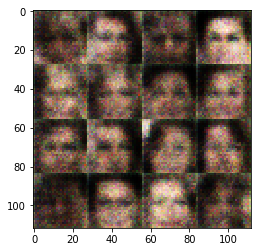

Epoch 1/1 -  Batch 281/1582 -  Discriminator loss: 0.3780 -  Generator loss: 3.2860 - 
Epoch 1/1 -  Batch 282/1582 -  Discriminator loss: 0.3797 -  Generator loss: 3.1707 - 
Epoch 1/1 -  Batch 283/1582 -  Discriminator loss: 0.3850 -  Generator loss: 4.2182 - 
Epoch 1/1 -  Batch 284/1582 -  Discriminator loss: 0.3687 -  Generator loss: 3.4437 - 
Epoch 1/1 -  Batch 285/1582 -  Discriminator loss: 0.3671 -  Generator loss: 3.7906 - 
Epoch 1/1 -  Batch 286/1582 -  Discriminator loss: 0.3658 -  Generator loss: 3.5795 - 
Epoch 1/1 -  Batch 287/1582 -  Discriminator loss: 0.3682 -  Generator loss: 3.5257 - 
Epoch 1/1 -  Batch 288/1582 -  Discriminator loss: 0.3686 -  Generator loss: 3.8151 - 
Epoch 1/1 -  Batch 289/1582 -  Discriminator loss: 0.3724 -  Generator loss: 3.3740 - 
Epoch 1/1 -  Batch 290/1582 -  Discriminator loss: 0.3714 -  Generator loss: 4.1113 - 
Epoch 1/1 -  Batch 291/1582 -  Discriminator loss: 0.3726 -  Generator loss: 3.3864 - 
Epoch 1/1 -  Batch 292/1582 -  Discriminato

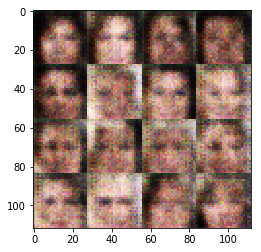

Epoch 1/1 -  Batch 301/1582 -  Discriminator loss: 0.3769 -  Generator loss: 3.8254 - 
Epoch 1/1 -  Batch 302/1582 -  Discriminator loss: 0.3691 -  Generator loss: 3.5265 - 
Epoch 1/1 -  Batch 303/1582 -  Discriminator loss: 0.3706 -  Generator loss: 3.6123 - 
Epoch 1/1 -  Batch 304/1582 -  Discriminator loss: 0.3603 -  Generator loss: 3.8259 - 
Epoch 1/1 -  Batch 305/1582 -  Discriminator loss: 0.3613 -  Generator loss: 3.8006 - 
Epoch 1/1 -  Batch 306/1582 -  Discriminator loss: 0.3613 -  Generator loss: 3.7808 - 
Epoch 1/1 -  Batch 307/1582 -  Discriminator loss: 0.3701 -  Generator loss: 3.4280 - 
Epoch 1/1 -  Batch 308/1582 -  Discriminator loss: 0.3695 -  Generator loss: 4.1826 - 
Epoch 1/1 -  Batch 309/1582 -  Discriminator loss: 0.3651 -  Generator loss: 3.7012 - 
Epoch 1/1 -  Batch 310/1582 -  Discriminator loss: 0.3603 -  Generator loss: 3.6904 - 
Epoch 1/1 -  Batch 311/1582 -  Discriminator loss: 0.3646 -  Generator loss: 4.0613 - 
Epoch 1/1 -  Batch 312/1582 -  Discriminato

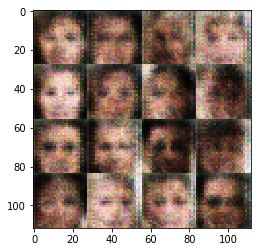

Epoch 1/1 -  Batch 321/1582 -  Discriminator loss: 0.3785 -  Generator loss: 4.3450 - 
Epoch 1/1 -  Batch 322/1582 -  Discriminator loss: 0.3736 -  Generator loss: 3.3712 - 
Epoch 1/1 -  Batch 323/1582 -  Discriminator loss: 0.3672 -  Generator loss: 4.1012 - 
Epoch 1/1 -  Batch 324/1582 -  Discriminator loss: 0.3626 -  Generator loss: 3.6474 - 
Epoch 1/1 -  Batch 325/1582 -  Discriminator loss: 0.3654 -  Generator loss: 3.6000 - 
Epoch 1/1 -  Batch 326/1582 -  Discriminator loss: 0.3740 -  Generator loss: 4.4836 - 
Epoch 1/1 -  Batch 327/1582 -  Discriminator loss: 0.3760 -  Generator loss: 3.3133 - 
Epoch 1/1 -  Batch 328/1582 -  Discriminator loss: 0.3679 -  Generator loss: 4.1322 - 
Epoch 1/1 -  Batch 329/1582 -  Discriminator loss: 0.3785 -  Generator loss: 3.2524 - 
Epoch 1/1 -  Batch 330/1582 -  Discriminator loss: 0.3775 -  Generator loss: 4.1191 - 
Epoch 1/1 -  Batch 331/1582 -  Discriminator loss: 0.3720 -  Generator loss: 3.3782 - 
Epoch 1/1 -  Batch 332/1582 -  Discriminato

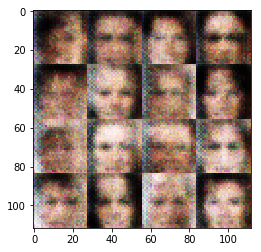

Epoch 1/1 -  Batch 341/1582 -  Discriminator loss: 0.3743 -  Generator loss: 3.3060 - 
Epoch 1/1 -  Batch 342/1582 -  Discriminator loss: 0.3729 -  Generator loss: 3.6525 - 
Epoch 1/1 -  Batch 343/1582 -  Discriminator loss: 0.3672 -  Generator loss: 3.4550 - 
Epoch 1/1 -  Batch 344/1582 -  Discriminator loss: 0.3709 -  Generator loss: 3.8642 - 
Epoch 1/1 -  Batch 345/1582 -  Discriminator loss: 0.3698 -  Generator loss: 3.4638 - 
Epoch 1/1 -  Batch 346/1582 -  Discriminator loss: 0.3728 -  Generator loss: 3.3603 - 
Epoch 1/1 -  Batch 347/1582 -  Discriminator loss: 0.3800 -  Generator loss: 3.6858 - 
Epoch 1/1 -  Batch 348/1582 -  Discriminator loss: 0.3633 -  Generator loss: 3.8161 - 
Epoch 1/1 -  Batch 349/1582 -  Discriminator loss: 0.3735 -  Generator loss: 3.3607 - 
Epoch 1/1 -  Batch 350/1582 -  Discriminator loss: 0.3739 -  Generator loss: 3.3077 - 
Epoch 1/1 -  Batch 351/1582 -  Discriminator loss: 0.3766 -  Generator loss: 4.1713 - 
Epoch 1/1 -  Batch 352/1582 -  Discriminato

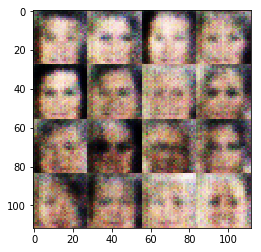

Epoch 1/1 -  Batch 361/1582 -  Discriminator loss: 0.3850 -  Generator loss: 4.7125 - 
Epoch 1/1 -  Batch 362/1582 -  Discriminator loss: 0.3617 -  Generator loss: 3.7255 - 
Epoch 1/1 -  Batch 363/1582 -  Discriminator loss: 0.3561 -  Generator loss: 3.8329 - 
Epoch 1/1 -  Batch 364/1582 -  Discriminator loss: 0.3627 -  Generator loss: 3.7177 - 
Epoch 1/1 -  Batch 365/1582 -  Discriminator loss: 0.3602 -  Generator loss: 3.8833 - 
Epoch 1/1 -  Batch 366/1582 -  Discriminator loss: 0.3692 -  Generator loss: 3.4412 - 
Epoch 1/1 -  Batch 367/1582 -  Discriminator loss: 0.3696 -  Generator loss: 3.7686 - 
Epoch 1/1 -  Batch 368/1582 -  Discriminator loss: 0.3707 -  Generator loss: 3.4220 - 
Epoch 1/1 -  Batch 369/1582 -  Discriminator loss: 0.3696 -  Generator loss: 3.8531 - 
Epoch 1/1 -  Batch 370/1582 -  Discriminator loss: 0.3647 -  Generator loss: 3.7451 - 
Epoch 1/1 -  Batch 371/1582 -  Discriminator loss: 0.3635 -  Generator loss: 3.6592 - 
Epoch 1/1 -  Batch 372/1582 -  Discriminato

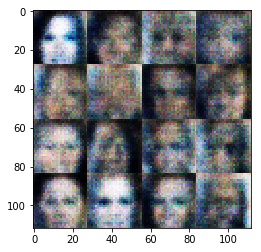

Epoch 1/1 -  Batch 381/1582 -  Discriminator loss: 0.3615 -  Generator loss: 3.9007 - 
Epoch 1/1 -  Batch 382/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.7935 - 
Epoch 1/1 -  Batch 383/1582 -  Discriminator loss: 0.3607 -  Generator loss: 3.8979 - 
Epoch 1/1 -  Batch 384/1582 -  Discriminator loss: 0.4123 -  Generator loss: 2.7072 - 
Epoch 1/1 -  Batch 385/1582 -  Discriminator loss: 0.4229 -  Generator loss: 4.3172 - 
Epoch 1/1 -  Batch 386/1582 -  Discriminator loss: 0.3875 -  Generator loss: 3.2311 - 
Epoch 1/1 -  Batch 387/1582 -  Discriminator loss: 0.3871 -  Generator loss: 3.1135 - 
Epoch 1/1 -  Batch 388/1582 -  Discriminator loss: 0.3812 -  Generator loss: 3.4904 - 
Epoch 1/1 -  Batch 389/1582 -  Discriminator loss: 0.3863 -  Generator loss: 3.1435 - 
Epoch 1/1 -  Batch 390/1582 -  Discriminator loss: 0.3783 -  Generator loss: 3.7728 - 
Epoch 1/1 -  Batch 391/1582 -  Discriminator loss: 0.3758 -  Generator loss: 3.3065 - 
Epoch 1/1 -  Batch 392/1582 -  Discriminato

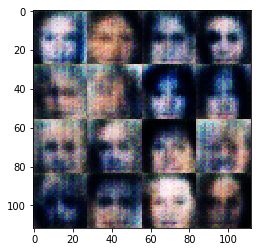

Epoch 1/1 -  Batch 401/1582 -  Discriminator loss: 0.3789 -  Generator loss: 4.0834 - 
Epoch 1/1 -  Batch 402/1582 -  Discriminator loss: 0.4030 -  Generator loss: 2.8675 - 
Epoch 1/1 -  Batch 403/1582 -  Discriminator loss: 0.4597 -  Generator loss: 5.2851 - 
Epoch 1/1 -  Batch 404/1582 -  Discriminator loss: 0.3806 -  Generator loss: 3.7406 - 
Epoch 1/1 -  Batch 405/1582 -  Discriminator loss: 0.4270 -  Generator loss: 2.6801 - 
Epoch 1/1 -  Batch 406/1582 -  Discriminator loss: 0.4919 -  Generator loss: 5.4708 - 
Epoch 1/1 -  Batch 407/1582 -  Discriminator loss: 0.3956 -  Generator loss: 4.0780 - 
Epoch 1/1 -  Batch 408/1582 -  Discriminator loss: 0.4704 -  Generator loss: 2.3880 - 
Epoch 1/1 -  Batch 409/1582 -  Discriminator loss: 0.5460 -  Generator loss: 5.8800 - 
Epoch 1/1 -  Batch 410/1582 -  Discriminator loss: 0.4846 -  Generator loss: 5.2726 - 
Epoch 1/1 -  Batch 411/1582 -  Discriminator loss: 0.3768 -  Generator loss: 3.5222 - 
Epoch 1/1 -  Batch 412/1582 -  Discriminato

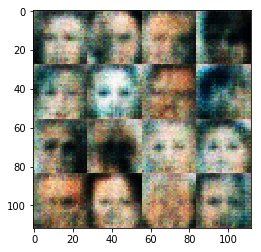

Epoch 1/1 -  Batch 421/1582 -  Discriminator loss: 0.3771 -  Generator loss: 3.4469 - 
Epoch 1/1 -  Batch 422/1582 -  Discriminator loss: 0.3754 -  Generator loss: 3.4497 - 
Epoch 1/1 -  Batch 423/1582 -  Discriminator loss: 0.3807 -  Generator loss: 3.3239 - 
Epoch 1/1 -  Batch 424/1582 -  Discriminator loss: 0.3758 -  Generator loss: 3.4127 - 
Epoch 1/1 -  Batch 425/1582 -  Discriminator loss: 0.3709 -  Generator loss: 3.6361 - 
Epoch 1/1 -  Batch 426/1582 -  Discriminator loss: 0.3782 -  Generator loss: 3.2628 - 
Epoch 1/1 -  Batch 427/1582 -  Discriminator loss: 0.3730 -  Generator loss: 3.7047 - 
Epoch 1/1 -  Batch 428/1582 -  Discriminator loss: 0.3709 -  Generator loss: 3.4734 - 
Epoch 1/1 -  Batch 429/1582 -  Discriminator loss: 0.3717 -  Generator loss: 3.6979 - 
Epoch 1/1 -  Batch 430/1582 -  Discriminator loss: 0.3731 -  Generator loss: 3.3673 - 
Epoch 1/1 -  Batch 431/1582 -  Discriminator loss: 0.3750 -  Generator loss: 3.3251 - 
Epoch 1/1 -  Batch 432/1582 -  Discriminato

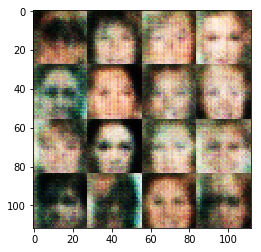

Epoch 1/1 -  Batch 441/1582 -  Discriminator loss: 0.3721 -  Generator loss: 3.4391 - 
Epoch 1/1 -  Batch 442/1582 -  Discriminator loss: 0.3688 -  Generator loss: 3.5934 - 
Epoch 1/1 -  Batch 443/1582 -  Discriminator loss: 0.3730 -  Generator loss: 3.3663 - 
Epoch 1/1 -  Batch 444/1582 -  Discriminator loss: 0.3686 -  Generator loss: 3.9334 - 
Epoch 1/1 -  Batch 445/1582 -  Discriminator loss: 0.3635 -  Generator loss: 3.5941 - 
Epoch 1/1 -  Batch 446/1582 -  Discriminator loss: 0.3699 -  Generator loss: 3.5462 - 
Epoch 1/1 -  Batch 447/1582 -  Discriminator loss: 0.3645 -  Generator loss: 3.6833 - 
Epoch 1/1 -  Batch 448/1582 -  Discriminator loss: 0.3691 -  Generator loss: 3.5711 - 
Epoch 1/1 -  Batch 449/1582 -  Discriminator loss: 0.3675 -  Generator loss: 3.5210 - 
Epoch 1/1 -  Batch 450/1582 -  Discriminator loss: 0.3647 -  Generator loss: 3.8442 - 
Epoch 1/1 -  Batch 451/1582 -  Discriminator loss: 0.3757 -  Generator loss: 3.2967 - 
Epoch 1/1 -  Batch 452/1582 -  Discriminato

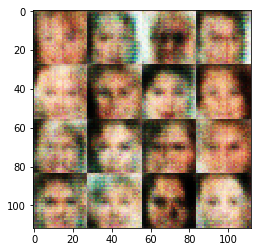

Epoch 1/1 -  Batch 461/1582 -  Discriminator loss: 0.3653 -  Generator loss: 3.6800 - 
Epoch 1/1 -  Batch 462/1582 -  Discriminator loss: 0.3592 -  Generator loss: 3.8213 - 
Epoch 1/1 -  Batch 463/1582 -  Discriminator loss: 0.3612 -  Generator loss: 3.8201 - 
Epoch 1/1 -  Batch 464/1582 -  Discriminator loss: 0.3614 -  Generator loss: 3.8650 - 
Epoch 1/1 -  Batch 465/1582 -  Discriminator loss: 0.3710 -  Generator loss: 3.4344 - 
Epoch 1/1 -  Batch 466/1582 -  Discriminator loss: 0.3702 -  Generator loss: 3.9396 - 
Epoch 1/1 -  Batch 467/1582 -  Discriminator loss: 0.3635 -  Generator loss: 3.5398 - 
Epoch 1/1 -  Batch 468/1582 -  Discriminator loss: 0.3584 -  Generator loss: 4.3573 - 
Epoch 1/1 -  Batch 469/1582 -  Discriminator loss: 0.3610 -  Generator loss: 3.6356 - 
Epoch 1/1 -  Batch 470/1582 -  Discriminator loss: 0.3616 -  Generator loss: 3.9749 - 
Epoch 1/1 -  Batch 471/1582 -  Discriminator loss: 0.3733 -  Generator loss: 3.3615 - 
Epoch 1/1 -  Batch 472/1582 -  Discriminato

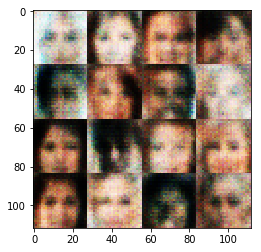

Epoch 1/1 -  Batch 481/1582 -  Discriminator loss: 0.3722 -  Generator loss: 3.3311 - 
Epoch 1/1 -  Batch 482/1582 -  Discriminator loss: 0.3621 -  Generator loss: 3.7396 - 
Epoch 1/1 -  Batch 483/1582 -  Discriminator loss: 0.3630 -  Generator loss: 3.8190 - 
Epoch 1/1 -  Batch 484/1582 -  Discriminator loss: 0.3669 -  Generator loss: 3.5613 - 
Epoch 1/1 -  Batch 485/1582 -  Discriminator loss: 0.3666 -  Generator loss: 4.0985 - 
Epoch 1/1 -  Batch 486/1582 -  Discriminator loss: 0.3652 -  Generator loss: 3.5258 - 
Epoch 1/1 -  Batch 487/1582 -  Discriminator loss: 0.3626 -  Generator loss: 3.8072 - 
Epoch 1/1 -  Batch 488/1582 -  Discriminator loss: 0.3680 -  Generator loss: 3.4723 - 
Epoch 1/1 -  Batch 489/1582 -  Discriminator loss: 0.3616 -  Generator loss: 3.8099 - 
Epoch 1/1 -  Batch 490/1582 -  Discriminator loss: 0.3634 -  Generator loss: 3.7052 - 
Epoch 1/1 -  Batch 491/1582 -  Discriminator loss: 0.3639 -  Generator loss: 3.6078 - 
Epoch 1/1 -  Batch 492/1582 -  Discriminato

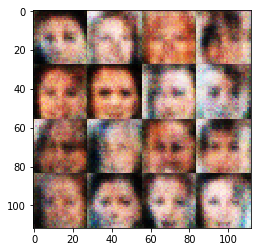

Epoch 1/1 -  Batch 501/1582 -  Discriminator loss: 0.3599 -  Generator loss: 3.6941 - 
Epoch 1/1 -  Batch 502/1582 -  Discriminator loss: 0.3633 -  Generator loss: 3.8114 - 
Epoch 1/1 -  Batch 503/1582 -  Discriminator loss: 0.3716 -  Generator loss: 3.3496 - 
Epoch 1/1 -  Batch 504/1582 -  Discriminator loss: 0.3772 -  Generator loss: 4.3773 - 
Epoch 1/1 -  Batch 505/1582 -  Discriminator loss: 0.3739 -  Generator loss: 3.3585 - 
Epoch 1/1 -  Batch 506/1582 -  Discriminator loss: 0.3592 -  Generator loss: 4.1728 - 
Epoch 1/1 -  Batch 507/1582 -  Discriminator loss: 0.3663 -  Generator loss: 3.5370 - 
Epoch 1/1 -  Batch 508/1582 -  Discriminator loss: 0.3633 -  Generator loss: 3.8869 - 
Epoch 1/1 -  Batch 509/1582 -  Discriminator loss: 0.3634 -  Generator loss: 3.6106 - 
Epoch 1/1 -  Batch 510/1582 -  Discriminator loss: 0.3743 -  Generator loss: 3.3048 - 
Epoch 1/1 -  Batch 511/1582 -  Discriminator loss: 0.3770 -  Generator loss: 4.7367 - 
Epoch 1/1 -  Batch 512/1582 -  Discriminato

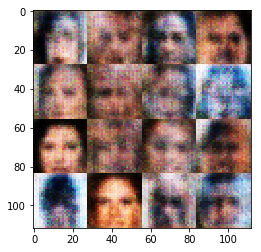

Epoch 1/1 -  Batch 521/1582 -  Discriminator loss: 0.3610 -  Generator loss: 3.6655 - 
Epoch 1/1 -  Batch 522/1582 -  Discriminator loss: 0.3567 -  Generator loss: 3.9545 - 
Epoch 1/1 -  Batch 523/1582 -  Discriminator loss: 0.3585 -  Generator loss: 3.8629 - 
Epoch 1/1 -  Batch 524/1582 -  Discriminator loss: 0.3553 -  Generator loss: 4.0167 - 
Epoch 1/1 -  Batch 525/1582 -  Discriminator loss: 0.3562 -  Generator loss: 4.0688 - 
Epoch 1/1 -  Batch 526/1582 -  Discriminator loss: 0.3641 -  Generator loss: 3.5187 - 
Epoch 1/1 -  Batch 527/1582 -  Discriminator loss: 0.3571 -  Generator loss: 3.9508 - 
Epoch 1/1 -  Batch 528/1582 -  Discriminator loss: 0.3598 -  Generator loss: 3.6993 - 
Epoch 1/1 -  Batch 529/1582 -  Discriminator loss: 0.3621 -  Generator loss: 4.1374 - 
Epoch 1/1 -  Batch 530/1582 -  Discriminator loss: 0.3583 -  Generator loss: 3.7350 - 
Epoch 1/1 -  Batch 531/1582 -  Discriminator loss: 0.3589 -  Generator loss: 3.8165 - 
Epoch 1/1 -  Batch 532/1582 -  Discriminato

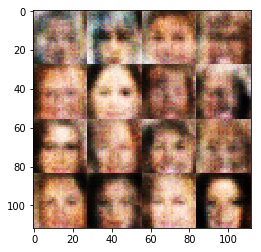

Epoch 1/1 -  Batch 541/1582 -  Discriminator loss: 0.3689 -  Generator loss: 3.4549 - 
Epoch 1/1 -  Batch 542/1582 -  Discriminator loss: 0.3633 -  Generator loss: 3.6371 - 
Epoch 1/1 -  Batch 543/1582 -  Discriminator loss: 0.3623 -  Generator loss: 3.8563 - 
Epoch 1/1 -  Batch 544/1582 -  Discriminator loss: 0.3724 -  Generator loss: 3.2784 - 
Epoch 1/1 -  Batch 545/1582 -  Discriminator loss: 0.3622 -  Generator loss: 4.1287 - 
Epoch 1/1 -  Batch 546/1582 -  Discriminator loss: 0.3645 -  Generator loss: 3.5218 - 
Epoch 1/1 -  Batch 547/1582 -  Discriminator loss: 0.3611 -  Generator loss: 3.8918 - 
Epoch 1/1 -  Batch 548/1582 -  Discriminator loss: 0.3684 -  Generator loss: 3.4945 - 
Epoch 1/1 -  Batch 549/1582 -  Discriminator loss: 0.3665 -  Generator loss: 4.2760 - 
Epoch 1/1 -  Batch 550/1582 -  Discriminator loss: 0.3627 -  Generator loss: 3.5597 - 
Epoch 1/1 -  Batch 551/1582 -  Discriminator loss: 0.3564 -  Generator loss: 3.9055 - 
Epoch 1/1 -  Batch 552/1582 -  Discriminato

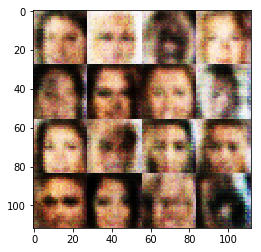

Epoch 1/1 -  Batch 561/1582 -  Discriminator loss: 0.3566 -  Generator loss: 3.8224 - 
Epoch 1/1 -  Batch 562/1582 -  Discriminator loss: 0.3727 -  Generator loss: 3.3118 - 
Epoch 1/1 -  Batch 563/1582 -  Discriminator loss: 0.3818 -  Generator loss: 4.6397 - 
Epoch 1/1 -  Batch 564/1582 -  Discriminator loss: 0.3613 -  Generator loss: 3.5927 - 
Epoch 1/1 -  Batch 565/1582 -  Discriminator loss: 0.3589 -  Generator loss: 4.4500 - 
Epoch 1/1 -  Batch 566/1582 -  Discriminator loss: 0.3763 -  Generator loss: 3.2247 - 
Epoch 1/1 -  Batch 567/1582 -  Discriminator loss: 0.4041 -  Generator loss: 5.1785 - 
Epoch 1/1 -  Batch 568/1582 -  Discriminator loss: 0.3576 -  Generator loss: 3.8697 - 
Epoch 1/1 -  Batch 569/1582 -  Discriminator loss: 0.3895 -  Generator loss: 3.1287 - 
Epoch 1/1 -  Batch 570/1582 -  Discriminator loss: 0.3926 -  Generator loss: 4.5971 - 
Epoch 1/1 -  Batch 571/1582 -  Discriminator loss: 0.3548 -  Generator loss: 4.0469 - 
Epoch 1/1 -  Batch 572/1582 -  Discriminato

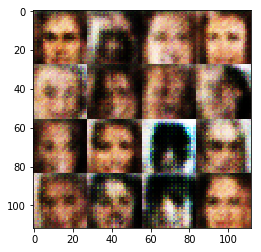

Epoch 1/1 -  Batch 581/1582 -  Discriminator loss: 0.3648 -  Generator loss: 3.5258 - 
Epoch 1/1 -  Batch 582/1582 -  Discriminator loss: 0.3646 -  Generator loss: 4.0789 - 
Epoch 1/1 -  Batch 583/1582 -  Discriminator loss: 0.3715 -  Generator loss: 3.3853 - 
Epoch 1/1 -  Batch 584/1582 -  Discriminator loss: 0.3773 -  Generator loss: 4.5604 - 
Epoch 1/1 -  Batch 585/1582 -  Discriminator loss: 0.3758 -  Generator loss: 3.2561 - 
Epoch 1/1 -  Batch 586/1582 -  Discriminator loss: 0.3863 -  Generator loss: 4.6599 - 
Epoch 1/1 -  Batch 587/1582 -  Discriminator loss: 0.3748 -  Generator loss: 3.3367 - 
Epoch 1/1 -  Batch 588/1582 -  Discriminator loss: 0.3684 -  Generator loss: 4.4330 - 
Epoch 1/1 -  Batch 589/1582 -  Discriminator loss: 0.3714 -  Generator loss: 3.3437 - 
Epoch 1/1 -  Batch 590/1582 -  Discriminator loss: 0.3617 -  Generator loss: 4.8872 - 
Epoch 1/1 -  Batch 591/1582 -  Discriminator loss: 0.3559 -  Generator loss: 3.8007 - 
Epoch 1/1 -  Batch 592/1582 -  Discriminato

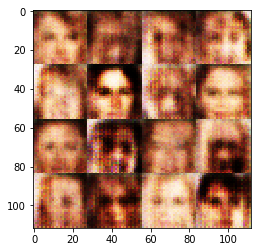

Epoch 1/1 -  Batch 601/1582 -  Discriminator loss: 0.3548 -  Generator loss: 4.2126 - 
Epoch 1/1 -  Batch 602/1582 -  Discriminator loss: 0.3624 -  Generator loss: 3.5328 - 
Epoch 1/1 -  Batch 603/1582 -  Discriminator loss: 0.3588 -  Generator loss: 4.4116 - 
Epoch 1/1 -  Batch 604/1582 -  Discriminator loss: 0.3812 -  Generator loss: 3.1634 - 
Epoch 1/1 -  Batch 605/1582 -  Discriminator loss: 0.3757 -  Generator loss: 4.6460 - 
Epoch 1/1 -  Batch 606/1582 -  Discriminator loss: 0.3756 -  Generator loss: 3.2486 - 
Epoch 1/1 -  Batch 607/1582 -  Discriminator loss: 0.3643 -  Generator loss: 4.4311 - 
Epoch 1/1 -  Batch 608/1582 -  Discriminator loss: 0.3746 -  Generator loss: 3.2829 - 
Epoch 1/1 -  Batch 609/1582 -  Discriminator loss: 0.3625 -  Generator loss: 3.8530 - 
Epoch 1/1 -  Batch 610/1582 -  Discriminator loss: 0.3630 -  Generator loss: 3.6559 - 
Epoch 1/1 -  Batch 611/1582 -  Discriminator loss: 0.3591 -  Generator loss: 3.7563 - 
Epoch 1/1 -  Batch 612/1582 -  Discriminato

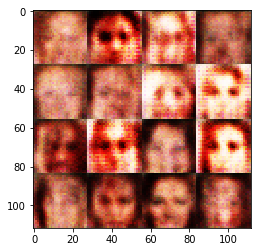

Epoch 1/1 -  Batch 621/1582 -  Discriminator loss: 0.4346 -  Generator loss: 5.6029 - 
Epoch 1/1 -  Batch 622/1582 -  Discriminator loss: 0.3621 -  Generator loss: 3.6906 - 
Epoch 1/1 -  Batch 623/1582 -  Discriminator loss: 0.3783 -  Generator loss: 3.3645 - 
Epoch 1/1 -  Batch 624/1582 -  Discriminator loss: 0.4236 -  Generator loss: 4.9400 - 
Epoch 1/1 -  Batch 625/1582 -  Discriminator loss: 0.3702 -  Generator loss: 3.4817 - 
Epoch 1/1 -  Batch 626/1582 -  Discriminator loss: 0.3676 -  Generator loss: 3.5104 - 
Epoch 1/1 -  Batch 627/1582 -  Discriminator loss: 0.3633 -  Generator loss: 3.8825 - 
Epoch 1/1 -  Batch 628/1582 -  Discriminator loss: 0.3652 -  Generator loss: 3.5025 - 
Epoch 1/1 -  Batch 629/1582 -  Discriminator loss: 0.3613 -  Generator loss: 4.5028 - 
Epoch 1/1 -  Batch 630/1582 -  Discriminator loss: 0.3692 -  Generator loss: 3.5133 - 
Epoch 1/1 -  Batch 631/1582 -  Discriminator loss: 0.3730 -  Generator loss: 4.6494 - 
Epoch 1/1 -  Batch 632/1582 -  Discriminato

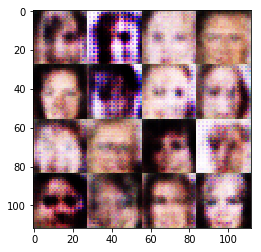

Epoch 1/1 -  Batch 641/1582 -  Discriminator loss: 0.3857 -  Generator loss: 3.0585 - 
Epoch 1/1 -  Batch 642/1582 -  Discriminator loss: 0.3880 -  Generator loss: 3.9425 - 
Epoch 1/1 -  Batch 643/1582 -  Discriminator loss: 0.4033 -  Generator loss: 2.8710 - 
Epoch 1/1 -  Batch 644/1582 -  Discriminator loss: 0.4512 -  Generator loss: 4.9469 - 
Epoch 1/1 -  Batch 645/1582 -  Discriminator loss: 0.3791 -  Generator loss: 3.2251 - 
Epoch 1/1 -  Batch 646/1582 -  Discriminator loss: 0.3807 -  Generator loss: 3.1849 - 
Epoch 1/1 -  Batch 647/1582 -  Discriminator loss: 0.4015 -  Generator loss: 4.0366 - 
Epoch 1/1 -  Batch 648/1582 -  Discriminator loss: 0.4040 -  Generator loss: 2.9667 - 
Epoch 1/1 -  Batch 649/1582 -  Discriminator loss: 0.4036 -  Generator loss: 4.5202 - 
Epoch 1/1 -  Batch 650/1582 -  Discriminator loss: 0.3895 -  Generator loss: 3.0665 - 
Epoch 1/1 -  Batch 651/1582 -  Discriminator loss: 0.3949 -  Generator loss: 4.5697 - 
Epoch 1/1 -  Batch 652/1582 -  Discriminato

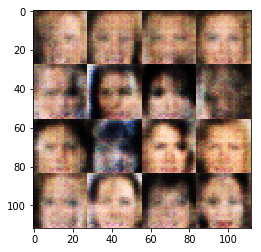

Epoch 1/1 -  Batch 661/1582 -  Discriminator loss: 0.4710 -  Generator loss: 5.6471 - 
Epoch 1/1 -  Batch 662/1582 -  Discriminator loss: 0.3751 -  Generator loss: 4.4602 - 
Epoch 1/1 -  Batch 663/1582 -  Discriminator loss: 0.4539 -  Generator loss: 2.5805 - 
Epoch 1/1 -  Batch 664/1582 -  Discriminator loss: 0.5361 -  Generator loss: 6.2796 - 
Epoch 1/1 -  Batch 665/1582 -  Discriminator loss: 0.4624 -  Generator loss: 5.0977 - 
Epoch 1/1 -  Batch 666/1582 -  Discriminator loss: 0.3967 -  Generator loss: 3.0103 - 
Epoch 1/1 -  Batch 667/1582 -  Discriminator loss: 0.3793 -  Generator loss: 3.4945 - 
Epoch 1/1 -  Batch 668/1582 -  Discriminator loss: 0.3760 -  Generator loss: 3.4622 - 
Epoch 1/1 -  Batch 669/1582 -  Discriminator loss: 0.3762 -  Generator loss: 3.2465 - 
Epoch 1/1 -  Batch 670/1582 -  Discriminator loss: 0.3780 -  Generator loss: 3.5157 - 
Epoch 1/1 -  Batch 671/1582 -  Discriminator loss: 0.3678 -  Generator loss: 3.6366 - 
Epoch 1/1 -  Batch 672/1582 -  Discriminato

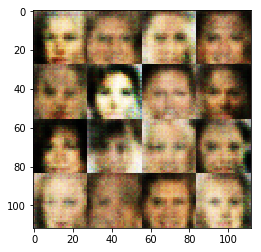

Epoch 1/1 -  Batch 681/1582 -  Discriminator loss: 0.3664 -  Generator loss: 3.8123 - 
Epoch 1/1 -  Batch 682/1582 -  Discriminator loss: 0.3661 -  Generator loss: 3.5000 - 
Epoch 1/1 -  Batch 683/1582 -  Discriminator loss: 0.3671 -  Generator loss: 3.5498 - 
Epoch 1/1 -  Batch 684/1582 -  Discriminator loss: 0.3651 -  Generator loss: 3.7590 - 
Epoch 1/1 -  Batch 685/1582 -  Discriminator loss: 0.3698 -  Generator loss: 3.3423 - 
Epoch 1/1 -  Batch 686/1582 -  Discriminator loss: 0.3691 -  Generator loss: 3.6468 - 
Epoch 1/1 -  Batch 687/1582 -  Discriminator loss: 0.3773 -  Generator loss: 3.2765 - 
Epoch 1/1 -  Batch 688/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.9785 - 
Epoch 1/1 -  Batch 689/1582 -  Discriminator loss: 0.3711 -  Generator loss: 3.3416 - 
Epoch 1/1 -  Batch 690/1582 -  Discriminator loss: 0.3679 -  Generator loss: 4.1396 - 
Epoch 1/1 -  Batch 691/1582 -  Discriminator loss: 0.3740 -  Generator loss: 3.2585 - 
Epoch 1/1 -  Batch 692/1582 -  Discriminato

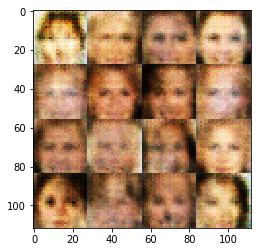

Epoch 1/1 -  Batch 701/1582 -  Discriminator loss: 0.3657 -  Generator loss: 4.2457 - 
Epoch 1/1 -  Batch 702/1582 -  Discriminator loss: 0.3657 -  Generator loss: 3.4868 - 
Epoch 1/1 -  Batch 703/1582 -  Discriminator loss: 0.3656 -  Generator loss: 3.5353 - 
Epoch 1/1 -  Batch 704/1582 -  Discriminator loss: 0.3740 -  Generator loss: 4.5050 - 
Epoch 1/1 -  Batch 705/1582 -  Discriminator loss: 0.3735 -  Generator loss: 3.3228 - 
Epoch 1/1 -  Batch 706/1582 -  Discriminator loss: 0.3768 -  Generator loss: 4.1316 - 
Epoch 1/1 -  Batch 707/1582 -  Discriminator loss: 0.3723 -  Generator loss: 3.2980 - 
Epoch 1/1 -  Batch 708/1582 -  Discriminator loss: 0.3716 -  Generator loss: 4.1394 - 
Epoch 1/1 -  Batch 709/1582 -  Discriminator loss: 0.3741 -  Generator loss: 3.2710 - 
Epoch 1/1 -  Batch 710/1582 -  Discriminator loss: 0.3701 -  Generator loss: 4.0482 - 
Epoch 1/1 -  Batch 711/1582 -  Discriminator loss: 0.3772 -  Generator loss: 3.2642 - 
Epoch 1/1 -  Batch 712/1582 -  Discriminato

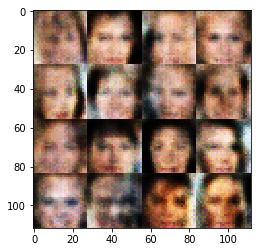

Epoch 1/1 -  Batch 721/1582 -  Discriminator loss: 0.3651 -  Generator loss: 3.8819 - 
Epoch 1/1 -  Batch 722/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.5226 - 
Epoch 1/1 -  Batch 723/1582 -  Discriminator loss: 0.3669 -  Generator loss: 3.8916 - 
Epoch 1/1 -  Batch 724/1582 -  Discriminator loss: 0.3752 -  Generator loss: 3.2687 - 
Epoch 1/1 -  Batch 725/1582 -  Discriminator loss: 0.3765 -  Generator loss: 4.1866 - 
Epoch 1/1 -  Batch 726/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.6567 - 
Epoch 1/1 -  Batch 727/1582 -  Discriminator loss: 0.3605 -  Generator loss: 3.8283 - 
Epoch 1/1 -  Batch 728/1582 -  Discriminator loss: 0.3564 -  Generator loss: 4.0654 - 
Epoch 1/1 -  Batch 729/1582 -  Discriminator loss: 0.3755 -  Generator loss: 3.3022 - 
Epoch 1/1 -  Batch 730/1582 -  Discriminator loss: 0.3988 -  Generator loss: 4.9874 - 
Epoch 1/1 -  Batch 731/1582 -  Discriminator loss: 0.3751 -  Generator loss: 3.2660 - 
Epoch 1/1 -  Batch 732/1582 -  Discriminato

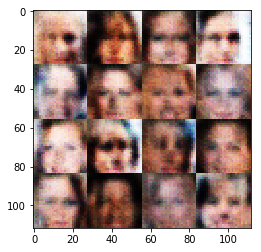

Epoch 1/1 -  Batch 741/1582 -  Discriminator loss: 0.3706 -  Generator loss: 3.3698 - 
Epoch 1/1 -  Batch 742/1582 -  Discriminator loss: 0.3646 -  Generator loss: 3.8078 - 
Epoch 1/1 -  Batch 743/1582 -  Discriminator loss: 0.3728 -  Generator loss: 3.4025 - 
Epoch 1/1 -  Batch 744/1582 -  Discriminator loss: 0.3661 -  Generator loss: 4.0083 - 
Epoch 1/1 -  Batch 745/1582 -  Discriminator loss: 0.3678 -  Generator loss: 3.4302 - 
Epoch 1/1 -  Batch 746/1582 -  Discriminator loss: 0.3642 -  Generator loss: 4.2047 - 
Epoch 1/1 -  Batch 747/1582 -  Discriminator loss: 0.3672 -  Generator loss: 3.4255 - 
Epoch 1/1 -  Batch 748/1582 -  Discriminator loss: 0.3674 -  Generator loss: 4.2449 - 
Epoch 1/1 -  Batch 749/1582 -  Discriminator loss: 0.3682 -  Generator loss: 3.4415 - 
Epoch 1/1 -  Batch 750/1582 -  Discriminator loss: 0.3652 -  Generator loss: 4.2743 - 
Epoch 1/1 -  Batch 751/1582 -  Discriminator loss: 0.3784 -  Generator loss: 3.1590 - 
Epoch 1/1 -  Batch 752/1582 -  Discriminato

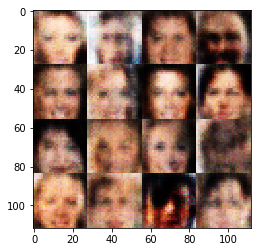

Epoch 1/1 -  Batch 761/1582 -  Discriminator loss: 0.3784 -  Generator loss: 3.2178 - 
Epoch 1/1 -  Batch 762/1582 -  Discriminator loss: 0.3739 -  Generator loss: 4.5013 - 
Epoch 1/1 -  Batch 763/1582 -  Discriminator loss: 0.3668 -  Generator loss: 3.4329 - 
Epoch 1/1 -  Batch 764/1582 -  Discriminator loss: 0.3606 -  Generator loss: 3.8667 - 
Epoch 1/1 -  Batch 765/1582 -  Discriminator loss: 0.3605 -  Generator loss: 3.6326 - 
Epoch 1/1 -  Batch 766/1582 -  Discriminator loss: 0.3590 -  Generator loss: 3.9154 - 
Epoch 1/1 -  Batch 767/1582 -  Discriminator loss: 0.3676 -  Generator loss: 3.3684 - 
Epoch 1/1 -  Batch 768/1582 -  Discriminator loss: 0.3777 -  Generator loss: 4.7192 - 
Epoch 1/1 -  Batch 769/1582 -  Discriminator loss: 0.3834 -  Generator loss: 3.0810 - 
Epoch 1/1 -  Batch 770/1582 -  Discriminator loss: 0.3903 -  Generator loss: 4.6477 - 
Epoch 1/1 -  Batch 771/1582 -  Discriminator loss: 0.3755 -  Generator loss: 3.2868 - 
Epoch 1/1 -  Batch 772/1582 -  Discriminato

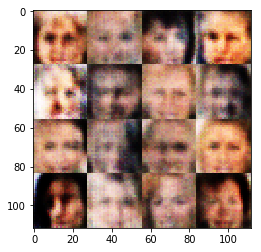

Epoch 1/1 -  Batch 781/1582 -  Discriminator loss: 0.3730 -  Generator loss: 4.0360 - 
Epoch 1/1 -  Batch 782/1582 -  Discriminator loss: 0.3683 -  Generator loss: 3.4748 - 
Epoch 1/1 -  Batch 783/1582 -  Discriminator loss: 0.3585 -  Generator loss: 3.9962 - 
Epoch 1/1 -  Batch 784/1582 -  Discriminator loss: 0.3612 -  Generator loss: 3.5797 - 
Epoch 1/1 -  Batch 785/1582 -  Discriminator loss: 0.3662 -  Generator loss: 3.9339 - 
Epoch 1/1 -  Batch 786/1582 -  Discriminator loss: 0.3636 -  Generator loss: 3.5593 - 
Epoch 1/1 -  Batch 787/1582 -  Discriminator loss: 0.3789 -  Generator loss: 4.5199 - 
Epoch 1/1 -  Batch 788/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.6006 - 
Epoch 1/1 -  Batch 789/1582 -  Discriminator loss: 0.3678 -  Generator loss: 3.4898 - 
Epoch 1/1 -  Batch 790/1582 -  Discriminator loss: 0.3685 -  Generator loss: 4.3673 - 
Epoch 1/1 -  Batch 791/1582 -  Discriminator loss: 0.3755 -  Generator loss: 3.2821 - 
Epoch 1/1 -  Batch 792/1582 -  Discriminato

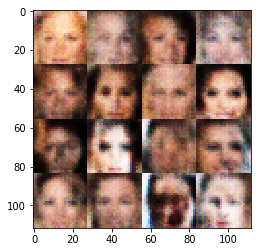

Epoch 1/1 -  Batch 801/1582 -  Discriminator loss: 0.3808 -  Generator loss: 3.1069 - 
Epoch 1/1 -  Batch 802/1582 -  Discriminator loss: 0.3833 -  Generator loss: 4.4238 - 
Epoch 1/1 -  Batch 803/1582 -  Discriminator loss: 0.3728 -  Generator loss: 3.2897 - 
Epoch 1/1 -  Batch 804/1582 -  Discriminator loss: 0.3637 -  Generator loss: 4.4210 - 
Epoch 1/1 -  Batch 805/1582 -  Discriminator loss: 0.3699 -  Generator loss: 3.3470 - 
Epoch 1/1 -  Batch 806/1582 -  Discriminator loss: 0.3613 -  Generator loss: 3.8455 - 
Epoch 1/1 -  Batch 807/1582 -  Discriminator loss: 0.3597 -  Generator loss: 3.6964 - 
Epoch 1/1 -  Batch 808/1582 -  Discriminator loss: 0.3560 -  Generator loss: 4.0081 - 
Epoch 1/1 -  Batch 809/1582 -  Discriminator loss: 0.3652 -  Generator loss: 3.4615 - 
Epoch 1/1 -  Batch 810/1582 -  Discriminator loss: 0.3632 -  Generator loss: 4.3671 - 
Epoch 1/1 -  Batch 811/1582 -  Discriminator loss: 0.3702 -  Generator loss: 3.4586 - 
Epoch 1/1 -  Batch 812/1582 -  Discriminato

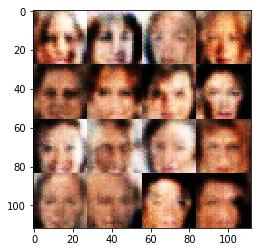

Epoch 1/1 -  Batch 821/1582 -  Discriminator loss: 0.3731 -  Generator loss: 3.2903 - 
Epoch 1/1 -  Batch 822/1582 -  Discriminator loss: 0.3749 -  Generator loss: 4.3951 - 
Epoch 1/1 -  Batch 823/1582 -  Discriminator loss: 0.3743 -  Generator loss: 3.3910 - 
Epoch 1/1 -  Batch 824/1582 -  Discriminator loss: 0.3919 -  Generator loss: 4.5343 - 
Epoch 1/1 -  Batch 825/1582 -  Discriminator loss: 0.3697 -  Generator loss: 3.4472 - 
Epoch 1/1 -  Batch 826/1582 -  Discriminator loss: 0.3660 -  Generator loss: 3.5384 - 
Epoch 1/1 -  Batch 827/1582 -  Discriminator loss: 0.3598 -  Generator loss: 4.2288 - 
Epoch 1/1 -  Batch 828/1582 -  Discriminator loss: 0.3658 -  Generator loss: 3.4845 - 
Epoch 1/1 -  Batch 829/1582 -  Discriminator loss: 0.3709 -  Generator loss: 4.2869 - 
Epoch 1/1 -  Batch 830/1582 -  Discriminator loss: 0.3733 -  Generator loss: 3.2844 - 
Epoch 1/1 -  Batch 831/1582 -  Discriminator loss: 0.3754 -  Generator loss: 4.4379 - 
Epoch 1/1 -  Batch 832/1582 -  Discriminato

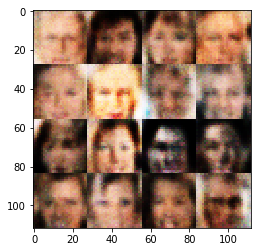

Epoch 1/1 -  Batch 841/1582 -  Discriminator loss: 0.3817 -  Generator loss: 4.8151 - 
Epoch 1/1 -  Batch 842/1582 -  Discriminator loss: 0.3726 -  Generator loss: 3.3503 - 
Epoch 1/1 -  Batch 843/1582 -  Discriminator loss: 0.3699 -  Generator loss: 4.7729 - 
Epoch 1/1 -  Batch 844/1582 -  Discriminator loss: 0.3750 -  Generator loss: 3.2867 - 
Epoch 1/1 -  Batch 845/1582 -  Discriminator loss: 0.3696 -  Generator loss: 3.8161 - 
Epoch 1/1 -  Batch 846/1582 -  Discriminator loss: 0.3748 -  Generator loss: 3.2787 - 
Epoch 1/1 -  Batch 847/1582 -  Discriminator loss: 0.3645 -  Generator loss: 4.2386 - 
Epoch 1/1 -  Batch 848/1582 -  Discriminator loss: 0.3638 -  Generator loss: 3.5387 - 
Epoch 1/1 -  Batch 849/1582 -  Discriminator loss: 0.3650 -  Generator loss: 4.5430 - 
Epoch 1/1 -  Batch 850/1582 -  Discriminator loss: 0.3864 -  Generator loss: 3.0741 - 
Epoch 1/1 -  Batch 851/1582 -  Discriminator loss: 0.4174 -  Generator loss: 4.8954 - 
Epoch 1/1 -  Batch 852/1582 -  Discriminato

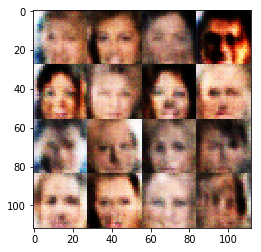

Epoch 1/1 -  Batch 861/1582 -  Discriminator loss: 0.3551 -  Generator loss: 4.1408 - 
Epoch 1/1 -  Batch 862/1582 -  Discriminator loss: 0.3636 -  Generator loss: 3.5239 - 
Epoch 1/1 -  Batch 863/1582 -  Discriminator loss: 0.3632 -  Generator loss: 4.0028 - 
Epoch 1/1 -  Batch 864/1582 -  Discriminator loss: 0.3622 -  Generator loss: 3.5348 - 
Epoch 1/1 -  Batch 865/1582 -  Discriminator loss: 0.3649 -  Generator loss: 4.3395 - 
Epoch 1/1 -  Batch 866/1582 -  Discriminator loss: 0.3675 -  Generator loss: 3.5637 - 
Epoch 1/1 -  Batch 867/1582 -  Discriminator loss: 0.3608 -  Generator loss: 4.0886 - 
Epoch 1/1 -  Batch 868/1582 -  Discriminator loss: 0.3752 -  Generator loss: 3.2063 - 
Epoch 1/1 -  Batch 869/1582 -  Discriminator loss: 0.3933 -  Generator loss: 4.5874 - 
Epoch 1/1 -  Batch 870/1582 -  Discriminator loss: 0.3986 -  Generator loss: 2.9361 - 
Epoch 1/1 -  Batch 871/1582 -  Discriminator loss: 0.4766 -  Generator loss: 5.4791 - 
Epoch 1/1 -  Batch 872/1582 -  Discriminato

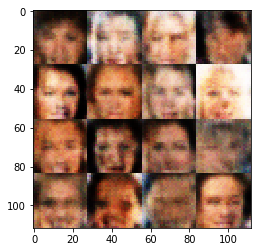

Epoch 1/1 -  Batch 881/1582 -  Discriminator loss: 0.3860 -  Generator loss: 3.2795 - 
Epoch 1/1 -  Batch 882/1582 -  Discriminator loss: 0.3861 -  Generator loss: 3.4147 - 
Epoch 1/1 -  Batch 883/1582 -  Discriminator loss: 0.3870 -  Generator loss: 3.1328 - 
Epoch 1/1 -  Batch 884/1582 -  Discriminator loss: 0.3842 -  Generator loss: 3.2266 - 
Epoch 1/1 -  Batch 885/1582 -  Discriminator loss: 0.3786 -  Generator loss: 3.4492 - 
Epoch 1/1 -  Batch 886/1582 -  Discriminator loss: 0.3743 -  Generator loss: 3.4220 - 
Epoch 1/1 -  Batch 887/1582 -  Discriminator loss: 0.3695 -  Generator loss: 3.5256 - 
Epoch 1/1 -  Batch 888/1582 -  Discriminator loss: 0.3686 -  Generator loss: 3.6233 - 
Epoch 1/1 -  Batch 889/1582 -  Discriminator loss: 0.3706 -  Generator loss: 3.4289 - 
Epoch 1/1 -  Batch 890/1582 -  Discriminator loss: 0.3686 -  Generator loss: 3.6234 - 
Epoch 1/1 -  Batch 891/1582 -  Discriminator loss: 0.3742 -  Generator loss: 3.3082 - 
Epoch 1/1 -  Batch 892/1582 -  Discriminato

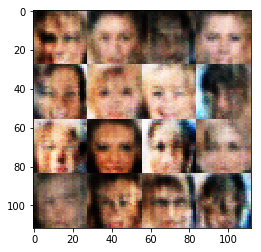

Epoch 1/1 -  Batch 901/1582 -  Discriminator loss: 0.3703 -  Generator loss: 3.4305 - 
Epoch 1/1 -  Batch 902/1582 -  Discriminator loss: 0.3665 -  Generator loss: 3.6301 - 
Epoch 1/1 -  Batch 903/1582 -  Discriminator loss: 0.3747 -  Generator loss: 3.3294 - 
Epoch 1/1 -  Batch 904/1582 -  Discriminator loss: 0.3682 -  Generator loss: 3.7655 - 
Epoch 1/1 -  Batch 905/1582 -  Discriminator loss: 0.3717 -  Generator loss: 3.3016 - 
Epoch 1/1 -  Batch 906/1582 -  Discriminator loss: 0.3657 -  Generator loss: 3.6246 - 
Epoch 1/1 -  Batch 907/1582 -  Discriminator loss: 0.3672 -  Generator loss: 3.6412 - 
Epoch 1/1 -  Batch 908/1582 -  Discriminator loss: 0.3697 -  Generator loss: 3.4234 - 
Epoch 1/1 -  Batch 909/1582 -  Discriminator loss: 0.3707 -  Generator loss: 3.4546 - 
Epoch 1/1 -  Batch 910/1582 -  Discriminator loss: 0.3639 -  Generator loss: 3.7654 - 
Epoch 1/1 -  Batch 911/1582 -  Discriminator loss: 0.3687 -  Generator loss: 3.3942 - 
Epoch 1/1 -  Batch 912/1582 -  Discriminato

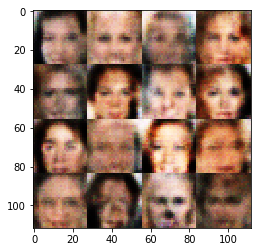

Epoch 1/1 -  Batch 921/1582 -  Discriminator loss: 0.3642 -  Generator loss: 3.5346 - 
Epoch 1/1 -  Batch 922/1582 -  Discriminator loss: 0.3589 -  Generator loss: 3.9196 - 
Epoch 1/1 -  Batch 923/1582 -  Discriminator loss: 0.3642 -  Generator loss: 3.5445 - 
Epoch 1/1 -  Batch 924/1582 -  Discriminator loss: 0.3625 -  Generator loss: 3.6938 - 
Epoch 1/1 -  Batch 925/1582 -  Discriminator loss: 0.3617 -  Generator loss: 3.6823 - 
Epoch 1/1 -  Batch 926/1582 -  Discriminator loss: 0.3602 -  Generator loss: 3.8198 - 
Epoch 1/1 -  Batch 927/1582 -  Discriminator loss: 0.3675 -  Generator loss: 3.3916 - 
Epoch 1/1 -  Batch 928/1582 -  Discriminator loss: 0.3705 -  Generator loss: 4.4600 - 
Epoch 1/1 -  Batch 929/1582 -  Discriminator loss: 0.3781 -  Generator loss: 3.1419 - 
Epoch 1/1 -  Batch 930/1582 -  Discriminator loss: 0.3789 -  Generator loss: 4.3983 - 
Epoch 1/1 -  Batch 931/1582 -  Discriminator loss: 0.3772 -  Generator loss: 3.1619 - 
Epoch 1/1 -  Batch 932/1582 -  Discriminato

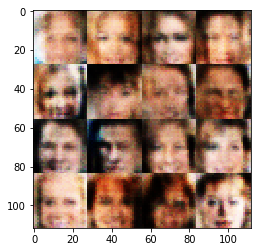

Epoch 1/1 -  Batch 941/1582 -  Discriminator loss: 0.3585 -  Generator loss: 3.7974 - 
Epoch 1/1 -  Batch 942/1582 -  Discriminator loss: 0.3658 -  Generator loss: 3.5027 - 
Epoch 1/1 -  Batch 943/1582 -  Discriminator loss: 0.3639 -  Generator loss: 4.4181 - 
Epoch 1/1 -  Batch 944/1582 -  Discriminator loss: 0.3678 -  Generator loss: 3.5009 - 
Epoch 1/1 -  Batch 945/1582 -  Discriminator loss: 0.3710 -  Generator loss: 3.9775 - 
Epoch 1/1 -  Batch 946/1582 -  Discriminator loss: 0.3621 -  Generator loss: 3.6710 - 
Epoch 1/1 -  Batch 947/1582 -  Discriminator loss: 0.3529 -  Generator loss: 3.9788 - 
Epoch 1/1 -  Batch 948/1582 -  Discriminator loss: 0.3571 -  Generator loss: 3.8683 - 
Epoch 1/1 -  Batch 949/1582 -  Discriminator loss: 0.3632 -  Generator loss: 3.5108 - 
Epoch 1/1 -  Batch 950/1582 -  Discriminator loss: 0.3624 -  Generator loss: 4.2314 - 
Epoch 1/1 -  Batch 951/1582 -  Discriminator loss: 0.3599 -  Generator loss: 3.6094 - 
Epoch 1/1 -  Batch 952/1582 -  Discriminato

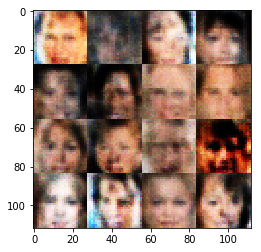

Epoch 1/1 -  Batch 961/1582 -  Discriminator loss: 0.3691 -  Generator loss: 4.5186 - 
Epoch 1/1 -  Batch 962/1582 -  Discriminator loss: 0.3700 -  Generator loss: 3.3934 - 
Epoch 1/1 -  Batch 963/1582 -  Discriminator loss: 0.3667 -  Generator loss: 4.1824 - 
Epoch 1/1 -  Batch 964/1582 -  Discriminator loss: 0.3652 -  Generator loss: 3.4438 - 
Epoch 1/1 -  Batch 965/1582 -  Discriminator loss: 0.3876 -  Generator loss: 4.8106 - 
Epoch 1/1 -  Batch 966/1582 -  Discriminator loss: 0.3705 -  Generator loss: 3.3923 - 
Epoch 1/1 -  Batch 967/1582 -  Discriminator loss: 0.3712 -  Generator loss: 4.1241 - 
Epoch 1/1 -  Batch 968/1582 -  Discriminator loss: 0.3718 -  Generator loss: 3.3240 - 
Epoch 1/1 -  Batch 969/1582 -  Discriminator loss: 0.3730 -  Generator loss: 4.2065 - 
Epoch 1/1 -  Batch 970/1582 -  Discriminator loss: 0.3653 -  Generator loss: 3.4663 - 
Epoch 1/1 -  Batch 971/1582 -  Discriminator loss: 0.3578 -  Generator loss: 3.8843 - 
Epoch 1/1 -  Batch 972/1582 -  Discriminato

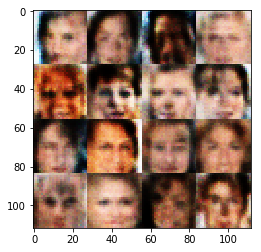

Epoch 1/1 -  Batch 981/1582 -  Discriminator loss: 0.3703 -  Generator loss: 4.3831 - 
Epoch 1/1 -  Batch 982/1582 -  Discriminator loss: 0.3766 -  Generator loss: 3.3648 - 
Epoch 1/1 -  Batch 983/1582 -  Discriminator loss: 0.4040 -  Generator loss: 5.0170 - 
Epoch 1/1 -  Batch 984/1582 -  Discriminator loss: 0.3751 -  Generator loss: 3.3060 - 
Epoch 1/1 -  Batch 985/1582 -  Discriminator loss: 0.3618 -  Generator loss: 3.9192 - 
Epoch 1/1 -  Batch 986/1582 -  Discriminator loss: 0.3647 -  Generator loss: 3.5357 - 
Epoch 1/1 -  Batch 987/1582 -  Discriminator loss: 0.3588 -  Generator loss: 3.9775 - 
Epoch 1/1 -  Batch 988/1582 -  Discriminator loss: 0.3602 -  Generator loss: 3.6335 - 
Epoch 1/1 -  Batch 989/1582 -  Discriminator loss: 0.3586 -  Generator loss: 4.1911 - 
Epoch 1/1 -  Batch 990/1582 -  Discriminator loss: 0.3622 -  Generator loss: 3.5436 - 
Epoch 1/1 -  Batch 991/1582 -  Discriminator loss: 0.3660 -  Generator loss: 4.3939 - 
Epoch 1/1 -  Batch 992/1582 -  Discriminato

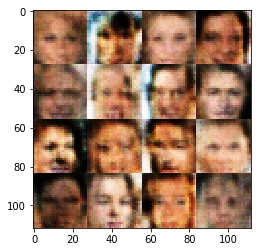

Epoch 1/1 -  Batch 1001/1582 -  Discriminator loss: 0.3700 -  Generator loss: 4.6347 - 
Epoch 1/1 -  Batch 1002/1582 -  Discriminator loss: 0.3628 -  Generator loss: 3.6202 - 
Epoch 1/1 -  Batch 1003/1582 -  Discriminator loss: 0.3652 -  Generator loss: 4.2431 - 
Epoch 1/1 -  Batch 1004/1582 -  Discriminator loss: 0.3614 -  Generator loss: 3.6123 - 
Epoch 1/1 -  Batch 1005/1582 -  Discriminator loss: 0.3588 -  Generator loss: 4.2722 - 
Epoch 1/1 -  Batch 1006/1582 -  Discriminator loss: 0.3694 -  Generator loss: 3.3891 - 
Epoch 1/1 -  Batch 1007/1582 -  Discriminator loss: 0.3830 -  Generator loss: 4.4520 - 
Epoch 1/1 -  Batch 1008/1582 -  Discriminator loss: 0.3681 -  Generator loss: 3.4017 - 
Epoch 1/1 -  Batch 1009/1582 -  Discriminator loss: 0.3608 -  Generator loss: 4.3756 - 
Epoch 1/1 -  Batch 1010/1582 -  Discriminator loss: 0.3590 -  Generator loss: 3.6330 - 
Epoch 1/1 -  Batch 1011/1582 -  Discriminator loss: 0.3596 -  Generator loss: 3.9501 - 
Epoch 1/1 -  Batch 1012/1582 -  

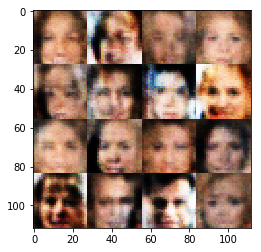

Epoch 1/1 -  Batch 1021/1582 -  Discriminator loss: 0.3741 -  Generator loss: 4.3860 - 
Epoch 1/1 -  Batch 1022/1582 -  Discriminator loss: 0.3714 -  Generator loss: 3.3352 - 
Epoch 1/1 -  Batch 1023/1582 -  Discriminator loss: 0.3821 -  Generator loss: 4.4202 - 
Epoch 1/1 -  Batch 1024/1582 -  Discriminator loss: 0.3717 -  Generator loss: 3.3246 - 
Epoch 1/1 -  Batch 1025/1582 -  Discriminator loss: 0.3781 -  Generator loss: 4.0809 - 
Epoch 1/1 -  Batch 1026/1582 -  Discriminator loss: 0.3671 -  Generator loss: 3.3885 - 
Epoch 1/1 -  Batch 1027/1582 -  Discriminator loss: 0.3587 -  Generator loss: 4.1389 - 
Epoch 1/1 -  Batch 1028/1582 -  Discriminator loss: 0.3647 -  Generator loss: 3.4805 - 
Epoch 1/1 -  Batch 1029/1582 -  Discriminator loss: 0.3640 -  Generator loss: 4.1179 - 
Epoch 1/1 -  Batch 1030/1582 -  Discriminator loss: 0.3760 -  Generator loss: 3.2171 - 
Epoch 1/1 -  Batch 1031/1582 -  Discriminator loss: 0.4035 -  Generator loss: 5.0692 - 
Epoch 1/1 -  Batch 1032/1582 -  

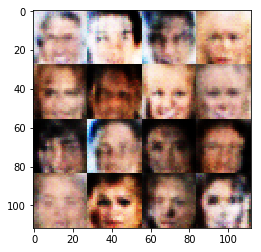

Epoch 1/1 -  Batch 1041/1582 -  Discriminator loss: 0.3706 -  Generator loss: 4.2392 - 
Epoch 1/1 -  Batch 1042/1582 -  Discriminator loss: 0.3763 -  Generator loss: 3.2533 - 
Epoch 1/1 -  Batch 1043/1582 -  Discriminator loss: 0.3965 -  Generator loss: 4.6427 - 
Epoch 1/1 -  Batch 1044/1582 -  Discriminator loss: 0.3829 -  Generator loss: 3.0882 - 
Epoch 1/1 -  Batch 1045/1582 -  Discriminator loss: 0.3667 -  Generator loss: 4.0864 - 
Epoch 1/1 -  Batch 1046/1582 -  Discriminator loss: 0.3620 -  Generator loss: 3.5328 - 
Epoch 1/1 -  Batch 1047/1582 -  Discriminator loss: 0.3587 -  Generator loss: 4.5609 - 
Epoch 1/1 -  Batch 1048/1582 -  Discriminator loss: 0.3673 -  Generator loss: 3.4203 - 
Epoch 1/1 -  Batch 1049/1582 -  Discriminator loss: 0.3638 -  Generator loss: 4.3559 - 
Epoch 1/1 -  Batch 1050/1582 -  Discriminator loss: 0.3596 -  Generator loss: 3.6899 - 
Epoch 1/1 -  Batch 1051/1582 -  Discriminator loss: 0.3534 -  Generator loss: 4.2140 - 
Epoch 1/1 -  Batch 1052/1582 -  

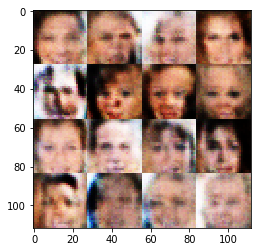

Epoch 1/1 -  Batch 1061/1582 -  Discriminator loss: 0.3545 -  Generator loss: 3.9520 - 
Epoch 1/1 -  Batch 1062/1582 -  Discriminator loss: 0.3532 -  Generator loss: 3.8862 - 
Epoch 1/1 -  Batch 1063/1582 -  Discriminator loss: 0.3564 -  Generator loss: 4.4024 - 
Epoch 1/1 -  Batch 1064/1582 -  Discriminator loss: 0.3640 -  Generator loss: 3.5825 - 
Epoch 1/1 -  Batch 1065/1582 -  Discriminator loss: 0.3769 -  Generator loss: 4.6683 - 
Epoch 1/1 -  Batch 1066/1582 -  Discriminator loss: 0.3692 -  Generator loss: 3.4293 - 
Epoch 1/1 -  Batch 1067/1582 -  Discriminator loss: 0.3790 -  Generator loss: 4.9717 - 
Epoch 1/1 -  Batch 1068/1582 -  Discriminator loss: 0.3768 -  Generator loss: 3.3160 - 
Epoch 1/1 -  Batch 1069/1582 -  Discriminator loss: 0.3915 -  Generator loss: 4.7842 - 
Epoch 1/1 -  Batch 1070/1582 -  Discriminator loss: 0.3708 -  Generator loss: 3.3699 - 
Epoch 1/1 -  Batch 1071/1582 -  Discriminator loss: 0.3629 -  Generator loss: 4.0969 - 
Epoch 1/1 -  Batch 1072/1582 -  

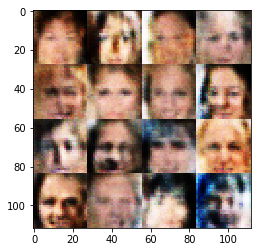

Epoch 1/1 -  Batch 1081/1582 -  Discriminator loss: 0.3594 -  Generator loss: 3.7274 - 
Epoch 1/1 -  Batch 1082/1582 -  Discriminator loss: 0.3535 -  Generator loss: 3.8890 - 
Epoch 1/1 -  Batch 1083/1582 -  Discriminator loss: 0.3555 -  Generator loss: 4.4567 - 
Epoch 1/1 -  Batch 1084/1582 -  Discriminator loss: 0.3645 -  Generator loss: 3.6565 - 
Epoch 1/1 -  Batch 1085/1582 -  Discriminator loss: 0.3984 -  Generator loss: 4.8598 - 
Epoch 1/1 -  Batch 1086/1582 -  Discriminator loss: 0.3808 -  Generator loss: 3.2316 - 
Epoch 1/1 -  Batch 1087/1582 -  Discriminator loss: 0.3780 -  Generator loss: 4.2411 - 
Epoch 1/1 -  Batch 1088/1582 -  Discriminator loss: 0.3783 -  Generator loss: 3.1899 - 
Epoch 1/1 -  Batch 1089/1582 -  Discriminator loss: 0.3849 -  Generator loss: 4.4699 - 
Epoch 1/1 -  Batch 1090/1582 -  Discriminator loss: 0.3791 -  Generator loss: 3.1378 - 
Epoch 1/1 -  Batch 1091/1582 -  Discriminator loss: 0.3945 -  Generator loss: 4.6921 - 
Epoch 1/1 -  Batch 1092/1582 -  

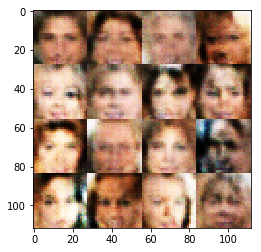

Epoch 1/1 -  Batch 1101/1582 -  Discriminator loss: 0.3623 -  Generator loss: 3.6098 - 
Epoch 1/1 -  Batch 1102/1582 -  Discriminator loss: 0.3678 -  Generator loss: 4.7543 - 
Epoch 1/1 -  Batch 1103/1582 -  Discriminator loss: 0.3721 -  Generator loss: 3.6384 - 
Epoch 1/1 -  Batch 1104/1582 -  Discriminator loss: 0.3859 -  Generator loss: 4.4834 - 
Epoch 1/1 -  Batch 1105/1582 -  Discriminator loss: 0.3640 -  Generator loss: 3.5379 - 
Epoch 1/1 -  Batch 1106/1582 -  Discriminator loss: 0.3608 -  Generator loss: 4.0662 - 
Epoch 1/1 -  Batch 1107/1582 -  Discriminator loss: 0.3565 -  Generator loss: 3.7284 - 
Epoch 1/1 -  Batch 1108/1582 -  Discriminator loss: 0.3559 -  Generator loss: 4.0196 - 
Epoch 1/1 -  Batch 1109/1582 -  Discriminator loss: 0.3580 -  Generator loss: 3.7215 - 
Epoch 1/1 -  Batch 1110/1582 -  Discriminator loss: 0.3522 -  Generator loss: 4.1683 - 
Epoch 1/1 -  Batch 1111/1582 -  Discriminator loss: 0.3582 -  Generator loss: 3.8072 - 
Epoch 1/1 -  Batch 1112/1582 -  

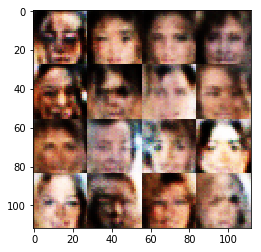

Epoch 1/1 -  Batch 1121/1582 -  Discriminator loss: 0.3539 -  Generator loss: 3.9217 - 
Epoch 1/1 -  Batch 1122/1582 -  Discriminator loss: 0.3516 -  Generator loss: 4.0725 - 
Epoch 1/1 -  Batch 1123/1582 -  Discriminator loss: 0.3528 -  Generator loss: 3.9654 - 
Epoch 1/1 -  Batch 1124/1582 -  Discriminator loss: 0.3499 -  Generator loss: 4.1441 - 
Epoch 1/1 -  Batch 1125/1582 -  Discriminator loss: 0.3535 -  Generator loss: 3.8618 - 
Epoch 1/1 -  Batch 1126/1582 -  Discriminator loss: 0.3610 -  Generator loss: 4.5836 - 
Epoch 1/1 -  Batch 1127/1582 -  Discriminator loss: 0.3771 -  Generator loss: 3.3724 - 
Epoch 1/1 -  Batch 1128/1582 -  Discriminator loss: 0.3873 -  Generator loss: 4.9225 - 
Epoch 1/1 -  Batch 1129/1582 -  Discriminator loss: 0.3790 -  Generator loss: 3.2892 - 
Epoch 1/1 -  Batch 1130/1582 -  Discriminator loss: 0.3782 -  Generator loss: 4.5656 - 
Epoch 1/1 -  Batch 1131/1582 -  Discriminator loss: 0.3842 -  Generator loss: 3.1471 - 
Epoch 1/1 -  Batch 1132/1582 -  

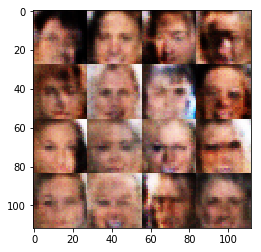

Epoch 1/1 -  Batch 1141/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.4800 - 
Epoch 1/1 -  Batch 1142/1582 -  Discriminator loss: 0.3729 -  Generator loss: 4.6613 - 
Epoch 1/1 -  Batch 1143/1582 -  Discriminator loss: 0.3795 -  Generator loss: 3.2102 - 
Epoch 1/1 -  Batch 1144/1582 -  Discriminator loss: 0.3932 -  Generator loss: 4.7273 - 
Epoch 1/1 -  Batch 1145/1582 -  Discriminator loss: 0.3659 -  Generator loss: 3.4745 - 
Epoch 1/1 -  Batch 1146/1582 -  Discriminator loss: 0.3620 -  Generator loss: 3.6152 - 
Epoch 1/1 -  Batch 1147/1582 -  Discriminator loss: 0.3651 -  Generator loss: 4.2920 - 
Epoch 1/1 -  Batch 1148/1582 -  Discriminator loss: 0.3595 -  Generator loss: 3.6411 - 
Epoch 1/1 -  Batch 1149/1582 -  Discriminator loss: 0.3521 -  Generator loss: 4.3129 - 
Epoch 1/1 -  Batch 1150/1582 -  Discriminator loss: 0.3523 -  Generator loss: 3.9798 - 
Epoch 1/1 -  Batch 1151/1582 -  Discriminator loss: 0.3555 -  Generator loss: 4.1843 - 
Epoch 1/1 -  Batch 1152/1582 -  

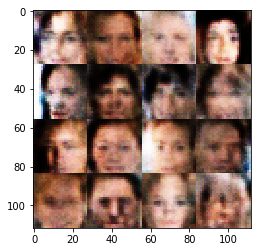

Epoch 1/1 -  Batch 1161/1582 -  Discriminator loss: 0.3551 -  Generator loss: 3.9664 - 
Epoch 1/1 -  Batch 1162/1582 -  Discriminator loss: 0.3628 -  Generator loss: 3.5244 - 
Epoch 1/1 -  Batch 1163/1582 -  Discriminator loss: 0.3848 -  Generator loss: 4.8266 - 
Epoch 1/1 -  Batch 1164/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.4798 - 
Epoch 1/1 -  Batch 1165/1582 -  Discriminator loss: 0.3574 -  Generator loss: 4.6754 - 
Epoch 1/1 -  Batch 1166/1582 -  Discriminator loss: 0.3699 -  Generator loss: 3.4032 - 
Epoch 1/1 -  Batch 1167/1582 -  Discriminator loss: 0.3984 -  Generator loss: 5.1052 - 
Epoch 1/1 -  Batch 1168/1582 -  Discriminator loss: 0.3719 -  Generator loss: 3.3973 - 
Epoch 1/1 -  Batch 1169/1582 -  Discriminator loss: 0.3561 -  Generator loss: 4.3707 - 
Epoch 1/1 -  Batch 1170/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.3880 - 
Epoch 1/1 -  Batch 1171/1582 -  Discriminator loss: 0.3713 -  Generator loss: 4.6604 - 
Epoch 1/1 -  Batch 1172/1582 -  

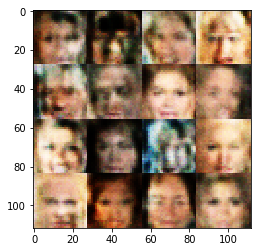

Epoch 1/1 -  Batch 1181/1582 -  Discriminator loss: 0.4020 -  Generator loss: 4.8744 - 
Epoch 1/1 -  Batch 1182/1582 -  Discriminator loss: 0.3779 -  Generator loss: 3.1996 - 
Epoch 1/1 -  Batch 1183/1582 -  Discriminator loss: 0.3628 -  Generator loss: 4.3274 - 
Epoch 1/1 -  Batch 1184/1582 -  Discriminator loss: 0.3554 -  Generator loss: 3.7823 - 
Epoch 1/1 -  Batch 1185/1582 -  Discriminator loss: 0.3576 -  Generator loss: 3.7060 - 
Epoch 1/1 -  Batch 1186/1582 -  Discriminator loss: 0.3941 -  Generator loss: 4.7544 - 
Epoch 1/1 -  Batch 1187/1582 -  Discriminator loss: 0.3835 -  Generator loss: 3.0924 - 
Epoch 1/1 -  Batch 1188/1582 -  Discriminator loss: 0.3716 -  Generator loss: 4.2229 - 
Epoch 1/1 -  Batch 1189/1582 -  Discriminator loss: 0.3638 -  Generator loss: 3.5104 - 
Epoch 1/1 -  Batch 1190/1582 -  Discriminator loss: 0.3681 -  Generator loss: 4.1091 - 
Epoch 1/1 -  Batch 1191/1582 -  Discriminator loss: 0.3690 -  Generator loss: 3.4532 - 
Epoch 1/1 -  Batch 1192/1582 -  

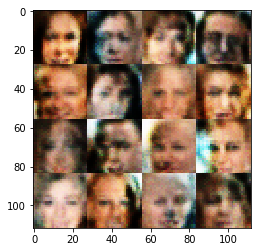

Epoch 1/1 -  Batch 1201/1582 -  Discriminator loss: 0.3615 -  Generator loss: 4.0490 - 
Epoch 1/1 -  Batch 1202/1582 -  Discriminator loss: 0.3552 -  Generator loss: 3.8281 - 
Epoch 1/1 -  Batch 1203/1582 -  Discriminator loss: 0.3497 -  Generator loss: 4.3378 - 
Epoch 1/1 -  Batch 1204/1582 -  Discriminator loss: 0.3585 -  Generator loss: 3.6956 - 
Epoch 1/1 -  Batch 1205/1582 -  Discriminator loss: 0.3633 -  Generator loss: 4.1612 - 
Epoch 1/1 -  Batch 1206/1582 -  Discriminator loss: 0.3674 -  Generator loss: 3.4050 - 
Epoch 1/1 -  Batch 1207/1582 -  Discriminator loss: 0.3721 -  Generator loss: 4.5614 - 
Epoch 1/1 -  Batch 1208/1582 -  Discriminator loss: 0.3688 -  Generator loss: 3.3445 - 
Epoch 1/1 -  Batch 1209/1582 -  Discriminator loss: 0.3706 -  Generator loss: 4.3074 - 
Epoch 1/1 -  Batch 1210/1582 -  Discriminator loss: 0.3592 -  Generator loss: 3.6018 - 
Epoch 1/1 -  Batch 1211/1582 -  Discriminator loss: 0.3555 -  Generator loss: 3.7928 - 
Epoch 1/1 -  Batch 1212/1582 -  

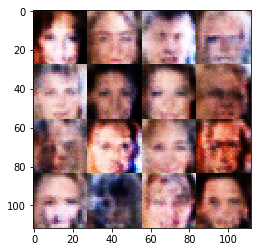

Epoch 1/1 -  Batch 1221/1582 -  Discriminator loss: 0.3620 -  Generator loss: 3.8382 - 
Epoch 1/1 -  Batch 1222/1582 -  Discriminator loss: 0.3621 -  Generator loss: 3.5821 - 
Epoch 1/1 -  Batch 1223/1582 -  Discriminator loss: 0.3585 -  Generator loss: 3.7807 - 
Epoch 1/1 -  Batch 1224/1582 -  Discriminator loss: 0.3580 -  Generator loss: 3.8241 - 
Epoch 1/1 -  Batch 1225/1582 -  Discriminator loss: 0.3602 -  Generator loss: 3.6438 - 
Epoch 1/1 -  Batch 1226/1582 -  Discriminator loss: 0.3558 -  Generator loss: 4.3563 - 
Epoch 1/1 -  Batch 1227/1582 -  Discriminator loss: 0.3599 -  Generator loss: 3.7171 - 
Epoch 1/1 -  Batch 1228/1582 -  Discriminator loss: 0.3584 -  Generator loss: 4.1097 - 
Epoch 1/1 -  Batch 1229/1582 -  Discriminator loss: 0.3568 -  Generator loss: 3.7239 - 
Epoch 1/1 -  Batch 1230/1582 -  Discriminator loss: 0.3530 -  Generator loss: 4.0805 - 
Epoch 1/1 -  Batch 1231/1582 -  Discriminator loss: 0.3529 -  Generator loss: 3.9475 - 
Epoch 1/1 -  Batch 1232/1582 -  

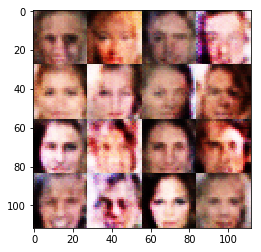

Epoch 1/1 -  Batch 1241/1582 -  Discriminator loss: 0.3541 -  Generator loss: 4.3783 - 
Epoch 1/1 -  Batch 1242/1582 -  Discriminator loss: 0.3622 -  Generator loss: 3.7650 - 
Epoch 1/1 -  Batch 1243/1582 -  Discriminator loss: 0.3988 -  Generator loss: 5.3412 - 
Epoch 1/1 -  Batch 1244/1582 -  Discriminator loss: 0.3627 -  Generator loss: 3.7725 - 
Epoch 1/1 -  Batch 1245/1582 -  Discriminator loss: 0.3497 -  Generator loss: 4.2604 - 
Epoch 1/1 -  Batch 1246/1582 -  Discriminator loss: 0.3524 -  Generator loss: 4.0899 - 
Epoch 1/1 -  Batch 1247/1582 -  Discriminator loss: 0.3584 -  Generator loss: 3.6508 - 
Epoch 1/1 -  Batch 1248/1582 -  Discriminator loss: 0.3551 -  Generator loss: 4.5319 - 
Epoch 1/1 -  Batch 1249/1582 -  Discriminator loss: 0.3665 -  Generator loss: 3.5561 - 
Epoch 1/1 -  Batch 1250/1582 -  Discriminator loss: 0.3737 -  Generator loss: 4.6697 - 
Epoch 1/1 -  Batch 1251/1582 -  Discriminator loss: 0.3636 -  Generator loss: 3.5370 - 
Epoch 1/1 -  Batch 1252/1582 -  

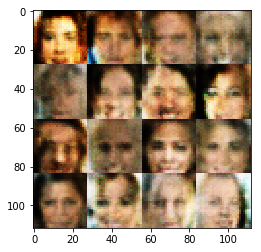

Epoch 1/1 -  Batch 1261/1582 -  Discriminator loss: 0.3684 -  Generator loss: 3.3934 - 
Epoch 1/1 -  Batch 1262/1582 -  Discriminator loss: 0.3659 -  Generator loss: 4.3781 - 
Epoch 1/1 -  Batch 1263/1582 -  Discriminator loss: 0.3701 -  Generator loss: 3.3955 - 
Epoch 1/1 -  Batch 1264/1582 -  Discriminator loss: 0.3709 -  Generator loss: 3.8376 - 
Epoch 1/1 -  Batch 1265/1582 -  Discriminator loss: 0.3570 -  Generator loss: 3.7666 - 
Epoch 1/1 -  Batch 1266/1582 -  Discriminator loss: 0.3572 -  Generator loss: 3.7209 - 
Epoch 1/1 -  Batch 1267/1582 -  Discriminator loss: 0.3569 -  Generator loss: 4.2807 - 
Epoch 1/1 -  Batch 1268/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.4139 - 
Epoch 1/1 -  Batch 1269/1582 -  Discriminator loss: 0.3866 -  Generator loss: 4.8530 - 
Epoch 1/1 -  Batch 1270/1582 -  Discriminator loss: 0.3855 -  Generator loss: 3.1046 - 
Epoch 1/1 -  Batch 1271/1582 -  Discriminator loss: 0.3887 -  Generator loss: 4.7201 - 
Epoch 1/1 -  Batch 1272/1582 -  

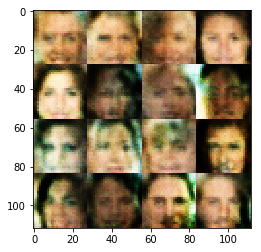

Epoch 1/1 -  Batch 1281/1582 -  Discriminator loss: 0.3568 -  Generator loss: 3.9343 - 
Epoch 1/1 -  Batch 1282/1582 -  Discriminator loss: 0.3590 -  Generator loss: 3.6266 - 
Epoch 1/1 -  Batch 1283/1582 -  Discriminator loss: 0.3750 -  Generator loss: 4.9500 - 
Epoch 1/1 -  Batch 1284/1582 -  Discriminator loss: 0.3558 -  Generator loss: 3.8759 - 
Epoch 1/1 -  Batch 1285/1582 -  Discriminator loss: 0.3560 -  Generator loss: 3.8628 - 
Epoch 1/1 -  Batch 1286/1582 -  Discriminator loss: 0.3562 -  Generator loss: 3.8235 - 
Epoch 1/1 -  Batch 1287/1582 -  Discriminator loss: 0.3537 -  Generator loss: 4.0875 - 
Epoch 1/1 -  Batch 1288/1582 -  Discriminator loss: 0.3569 -  Generator loss: 3.8173 - 
Epoch 1/1 -  Batch 1289/1582 -  Discriminator loss: 0.3636 -  Generator loss: 4.2664 - 
Epoch 1/1 -  Batch 1290/1582 -  Discriminator loss: 0.3739 -  Generator loss: 3.4230 - 
Epoch 1/1 -  Batch 1291/1582 -  Discriminator loss: 0.3681 -  Generator loss: 4.4298 - 
Epoch 1/1 -  Batch 1292/1582 -  

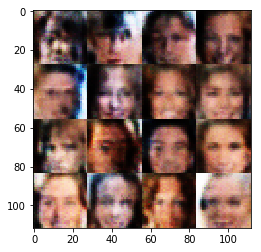

Epoch 1/1 -  Batch 1301/1582 -  Discriminator loss: 0.3728 -  Generator loss: 3.4986 - 
Epoch 1/1 -  Batch 1302/1582 -  Discriminator loss: 0.3582 -  Generator loss: 4.1936 - 
Epoch 1/1 -  Batch 1303/1582 -  Discriminator loss: 0.3703 -  Generator loss: 3.3301 - 
Epoch 1/1 -  Batch 1304/1582 -  Discriminator loss: 0.3742 -  Generator loss: 4.8889 - 
Epoch 1/1 -  Batch 1305/1582 -  Discriminator loss: 0.3888 -  Generator loss: 3.0595 - 
Epoch 1/1 -  Batch 1306/1582 -  Discriminator loss: 0.4214 -  Generator loss: 5.2347 - 
Epoch 1/1 -  Batch 1307/1582 -  Discriminator loss: 0.3700 -  Generator loss: 3.4114 - 
Epoch 1/1 -  Batch 1308/1582 -  Discriminator loss: 0.3596 -  Generator loss: 3.6701 - 
Epoch 1/1 -  Batch 1309/1582 -  Discriminator loss: 0.3650 -  Generator loss: 3.6369 - 
Epoch 1/1 -  Batch 1310/1582 -  Discriminator loss: 0.3540 -  Generator loss: 4.3452 - 
Epoch 1/1 -  Batch 1311/1582 -  Discriminator loss: 0.3756 -  Generator loss: 3.2023 - 
Epoch 1/1 -  Batch 1312/1582 -  

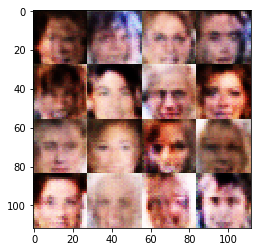

Epoch 1/1 -  Batch 1321/1582 -  Discriminator loss: 0.3576 -  Generator loss: 3.6601 - 
Epoch 1/1 -  Batch 1322/1582 -  Discriminator loss: 0.3585 -  Generator loss: 4.5214 - 
Epoch 1/1 -  Batch 1323/1582 -  Discriminator loss: 0.3732 -  Generator loss: 3.2854 - 
Epoch 1/1 -  Batch 1324/1582 -  Discriminator loss: 0.3665 -  Generator loss: 4.4219 - 
Epoch 1/1 -  Batch 1325/1582 -  Discriminator loss: 0.3646 -  Generator loss: 3.4590 - 
Epoch 1/1 -  Batch 1326/1582 -  Discriminator loss: 0.3595 -  Generator loss: 4.7184 - 
Epoch 1/1 -  Batch 1327/1582 -  Discriminator loss: 0.3770 -  Generator loss: 3.2312 - 
Epoch 1/1 -  Batch 1328/1582 -  Discriminator loss: 0.3931 -  Generator loss: 5.4800 - 
Epoch 1/1 -  Batch 1329/1582 -  Discriminator loss: 0.3577 -  Generator loss: 3.8779 - 
Epoch 1/1 -  Batch 1330/1582 -  Discriminator loss: 0.3504 -  Generator loss: 4.2702 - 
Epoch 1/1 -  Batch 1331/1582 -  Discriminator loss: 0.3417 -  Generator loss: 4.4950 - 
Epoch 1/1 -  Batch 1332/1582 -  

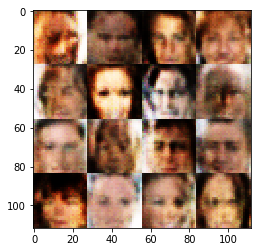

Epoch 1/1 -  Batch 1341/1582 -  Discriminator loss: 0.3709 -  Generator loss: 3.3637 - 
Epoch 1/1 -  Batch 1342/1582 -  Discriminator loss: 0.3654 -  Generator loss: 3.9583 - 
Epoch 1/1 -  Batch 1343/1582 -  Discriminator loss: 0.3601 -  Generator loss: 3.6687 - 
Epoch 1/1 -  Batch 1344/1582 -  Discriminator loss: 0.3623 -  Generator loss: 3.5897 - 
Epoch 1/1 -  Batch 1345/1582 -  Discriminator loss: 0.3617 -  Generator loss: 4.6530 - 
Epoch 1/1 -  Batch 1346/1582 -  Discriminator loss: 0.3661 -  Generator loss: 3.5349 - 
Epoch 1/1 -  Batch 1347/1582 -  Discriminator loss: 0.3554 -  Generator loss: 4.3425 - 
Epoch 1/1 -  Batch 1348/1582 -  Discriminator loss: 0.3592 -  Generator loss: 3.6830 - 
Epoch 1/1 -  Batch 1349/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.6610 - 
Epoch 1/1 -  Batch 1350/1582 -  Discriminator loss: 0.3558 -  Generator loss: 4.1892 - 
Epoch 1/1 -  Batch 1351/1582 -  Discriminator loss: 0.3586 -  Generator loss: 3.7056 - 
Epoch 1/1 -  Batch 1352/1582 -  

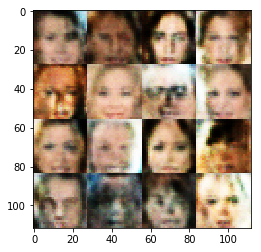

Epoch 1/1 -  Batch 1361/1582 -  Discriminator loss: 0.3960 -  Generator loss: 4.8323 - 
Epoch 1/1 -  Batch 1362/1582 -  Discriminator loss: 0.3726 -  Generator loss: 3.3103 - 
Epoch 1/1 -  Batch 1363/1582 -  Discriminator loss: 0.3621 -  Generator loss: 4.0770 - 
Epoch 1/1 -  Batch 1364/1582 -  Discriminator loss: 0.3597 -  Generator loss: 3.7228 - 
Epoch 1/1 -  Batch 1365/1582 -  Discriminator loss: 0.3637 -  Generator loss: 3.4861 - 
Epoch 1/1 -  Batch 1366/1582 -  Discriminator loss: 0.3659 -  Generator loss: 4.8186 - 
Epoch 1/1 -  Batch 1367/1582 -  Discriminator loss: 0.3583 -  Generator loss: 3.7258 - 
Epoch 1/1 -  Batch 1368/1582 -  Discriminator loss: 0.3564 -  Generator loss: 4.1018 - 
Epoch 1/1 -  Batch 1369/1582 -  Discriminator loss: 0.3656 -  Generator loss: 3.4148 - 
Epoch 1/1 -  Batch 1370/1582 -  Discriminator loss: 0.3669 -  Generator loss: 4.3459 - 
Epoch 1/1 -  Batch 1371/1582 -  Discriminator loss: 0.3538 -  Generator loss: 3.9044 - 
Epoch 1/1 -  Batch 1372/1582 -  

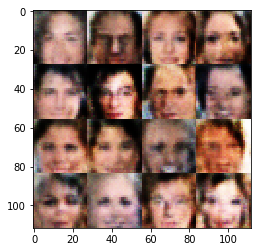

Epoch 1/1 -  Batch 1381/1582 -  Discriminator loss: 0.3688 -  Generator loss: 3.4743 - 
Epoch 1/1 -  Batch 1382/1582 -  Discriminator loss: 0.3816 -  Generator loss: 4.4852 - 
Epoch 1/1 -  Batch 1383/1582 -  Discriminator loss: 0.3721 -  Generator loss: 3.3147 - 
Epoch 1/1 -  Batch 1384/1582 -  Discriminator loss: 0.3713 -  Generator loss: 4.5965 - 
Epoch 1/1 -  Batch 1385/1582 -  Discriminator loss: 0.3753 -  Generator loss: 3.2721 - 
Epoch 1/1 -  Batch 1386/1582 -  Discriminator loss: 0.3756 -  Generator loss: 4.2211 - 
Epoch 1/1 -  Batch 1387/1582 -  Discriminator loss: 0.3743 -  Generator loss: 3.2695 - 
Epoch 1/1 -  Batch 1388/1582 -  Discriminator loss: 0.3750 -  Generator loss: 4.3763 - 
Epoch 1/1 -  Batch 1389/1582 -  Discriminator loss: 0.3611 -  Generator loss: 3.5990 - 
Epoch 1/1 -  Batch 1390/1582 -  Discriminator loss: 0.3605 -  Generator loss: 3.7244 - 
Epoch 1/1 -  Batch 1391/1582 -  Discriminator loss: 0.3517 -  Generator loss: 4.0406 - 
Epoch 1/1 -  Batch 1392/1582 -  

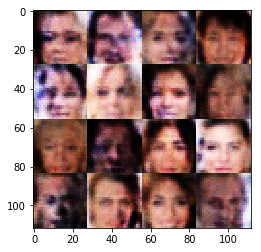

Epoch 1/1 -  Batch 1401/1582 -  Discriminator loss: 0.3516 -  Generator loss: 4.5220 - 
Epoch 1/1 -  Batch 1402/1582 -  Discriminator loss: 0.3572 -  Generator loss: 3.6880 - 
Epoch 1/1 -  Batch 1403/1582 -  Discriminator loss: 0.3590 -  Generator loss: 3.6680 - 
Epoch 1/1 -  Batch 1404/1582 -  Discriminator loss: 0.3637 -  Generator loss: 3.5999 - 
Epoch 1/1 -  Batch 1405/1582 -  Discriminator loss: 0.3540 -  Generator loss: 4.0342 - 
Epoch 1/1 -  Batch 1406/1582 -  Discriminator loss: 0.3604 -  Generator loss: 3.6041 - 
Epoch 1/1 -  Batch 1407/1582 -  Discriminator loss: 0.3636 -  Generator loss: 4.9451 - 
Epoch 1/1 -  Batch 1408/1582 -  Discriminator loss: 0.4177 -  Generator loss: 2.7901 - 
Epoch 1/1 -  Batch 1409/1582 -  Discriminator loss: 0.5652 -  Generator loss: 6.4379 - 
Epoch 1/1 -  Batch 1410/1582 -  Discriminator loss: 0.4276 -  Generator loss: 4.7907 - 
Epoch 1/1 -  Batch 1411/1582 -  Discriminator loss: 0.4766 -  Generator loss: 2.3190 - 
Epoch 1/1 -  Batch 1412/1582 -  

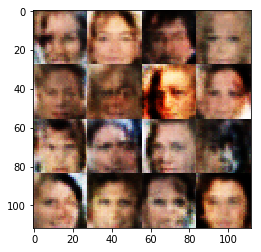

Epoch 1/1 -  Batch 1421/1582 -  Discriminator loss: 0.3728 -  Generator loss: 4.1120 - 
Epoch 1/1 -  Batch 1422/1582 -  Discriminator loss: 0.3675 -  Generator loss: 3.4107 - 
Epoch 1/1 -  Batch 1423/1582 -  Discriminator loss: 0.3598 -  Generator loss: 3.8095 - 
Epoch 1/1 -  Batch 1424/1582 -  Discriminator loss: 0.3698 -  Generator loss: 3.3495 - 
Epoch 1/1 -  Batch 1425/1582 -  Discriminator loss: 0.3748 -  Generator loss: 3.4652 - 
Epoch 1/1 -  Batch 1426/1582 -  Discriminator loss: 0.3673 -  Generator loss: 3.5458 - 
Epoch 1/1 -  Batch 1427/1582 -  Discriminator loss: 0.3678 -  Generator loss: 3.5843 - 
Epoch 1/1 -  Batch 1428/1582 -  Discriminator loss: 0.3717 -  Generator loss: 3.3604 - 
Epoch 1/1 -  Batch 1429/1582 -  Discriminator loss: 0.3704 -  Generator loss: 3.5438 - 
Epoch 1/1 -  Batch 1430/1582 -  Discriminator loss: 0.3716 -  Generator loss: 3.3492 - 
Epoch 1/1 -  Batch 1431/1582 -  Discriminator loss: 0.3717 -  Generator loss: 3.3573 - 
Epoch 1/1 -  Batch 1432/1582 -  

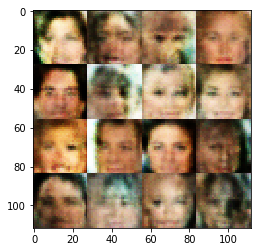

Epoch 1/1 -  Batch 1441/1582 -  Discriminator loss: 0.3512 -  Generator loss: 3.9869 - 
Epoch 1/1 -  Batch 1442/1582 -  Discriminator loss: 0.3657 -  Generator loss: 3.4577 - 
Epoch 1/1 -  Batch 1443/1582 -  Discriminator loss: 0.3637 -  Generator loss: 4.0421 - 
Epoch 1/1 -  Batch 1444/1582 -  Discriminator loss: 0.3625 -  Generator loss: 3.5231 - 
Epoch 1/1 -  Batch 1445/1582 -  Discriminator loss: 0.3581 -  Generator loss: 4.0651 - 
Epoch 1/1 -  Batch 1446/1582 -  Discriminator loss: 0.3568 -  Generator loss: 3.7826 - 
Epoch 1/1 -  Batch 1447/1582 -  Discriminator loss: 0.3572 -  Generator loss: 3.9467 - 
Epoch 1/1 -  Batch 1448/1582 -  Discriminator loss: 0.3544 -  Generator loss: 3.9455 - 
Epoch 1/1 -  Batch 1449/1582 -  Discriminator loss: 0.3499 -  Generator loss: 4.0939 - 
Epoch 1/1 -  Batch 1450/1582 -  Discriminator loss: 0.3548 -  Generator loss: 3.8103 - 
Epoch 1/1 -  Batch 1451/1582 -  Discriminator loss: 0.3594 -  Generator loss: 3.9845 - 
Epoch 1/1 -  Batch 1452/1582 -  

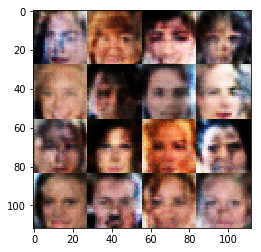

Epoch 1/1 -  Batch 1461/1582 -  Discriminator loss: 0.3678 -  Generator loss: 3.3966 - 
Epoch 1/1 -  Batch 1462/1582 -  Discriminator loss: 0.3680 -  Generator loss: 3.4101 - 
Epoch 1/1 -  Batch 1463/1582 -  Discriminator loss: 0.3631 -  Generator loss: 4.2044 - 
Epoch 1/1 -  Batch 1464/1582 -  Discriminator loss: 0.3701 -  Generator loss: 3.3123 - 
Epoch 1/1 -  Batch 1465/1582 -  Discriminator loss: 0.3637 -  Generator loss: 4.4603 - 
Epoch 1/1 -  Batch 1466/1582 -  Discriminator loss: 0.3695 -  Generator loss: 3.3415 - 
Epoch 1/1 -  Batch 1467/1582 -  Discriminator loss: 0.3693 -  Generator loss: 4.5254 - 
Epoch 1/1 -  Batch 1468/1582 -  Discriminator loss: 0.3641 -  Generator loss: 3.5021 - 
Epoch 1/1 -  Batch 1469/1582 -  Discriminator loss: 0.3581 -  Generator loss: 4.2191 - 
Epoch 1/1 -  Batch 1470/1582 -  Discriminator loss: 0.3581 -  Generator loss: 3.6732 - 
Epoch 1/1 -  Batch 1471/1582 -  Discriminator loss: 0.3602 -  Generator loss: 4.0989 - 
Epoch 1/1 -  Batch 1472/1582 -  

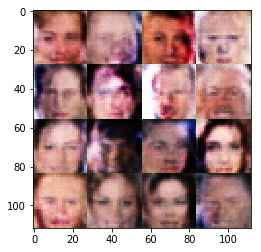

Epoch 1/1 -  Batch 1481/1582 -  Discriminator loss: 0.3545 -  Generator loss: 4.0047 - 
Epoch 1/1 -  Batch 1482/1582 -  Discriminator loss: 0.3569 -  Generator loss: 3.8135 - 
Epoch 1/1 -  Batch 1483/1582 -  Discriminator loss: 0.3581 -  Generator loss: 3.8389 - 
Epoch 1/1 -  Batch 1484/1582 -  Discriminator loss: 0.3533 -  Generator loss: 3.9595 - 
Epoch 1/1 -  Batch 1485/1582 -  Discriminator loss: 0.3501 -  Generator loss: 4.0011 - 
Epoch 1/1 -  Batch 1486/1582 -  Discriminator loss: 0.3561 -  Generator loss: 4.1584 - 
Epoch 1/1 -  Batch 1487/1582 -  Discriminator loss: 0.3557 -  Generator loss: 3.7765 - 
Epoch 1/1 -  Batch 1488/1582 -  Discriminator loss: 0.3547 -  Generator loss: 4.2782 - 
Epoch 1/1 -  Batch 1489/1582 -  Discriminator loss: 0.3573 -  Generator loss: 3.7090 - 
Epoch 1/1 -  Batch 1490/1582 -  Discriminator loss: 0.3586 -  Generator loss: 4.1472 - 
Epoch 1/1 -  Batch 1491/1582 -  Discriminator loss: 0.3528 -  Generator loss: 3.9259 - 
Epoch 1/1 -  Batch 1492/1582 -  

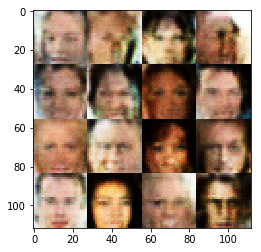

Epoch 1/1 -  Batch 1501/1582 -  Discriminator loss: 0.3482 -  Generator loss: 4.0740 - 
Epoch 1/1 -  Batch 1502/1582 -  Discriminator loss: 0.3670 -  Generator loss: 3.4016 - 
Epoch 1/1 -  Batch 1503/1582 -  Discriminator loss: 0.3862 -  Generator loss: 4.5718 - 
Epoch 1/1 -  Batch 1504/1582 -  Discriminator loss: 0.3883 -  Generator loss: 3.1110 - 
Epoch 1/1 -  Batch 1505/1582 -  Discriminator loss: 0.4539 -  Generator loss: 5.5023 - 
Epoch 1/1 -  Batch 1506/1582 -  Discriminator loss: 0.3722 -  Generator loss: 3.4090 - 
Epoch 1/1 -  Batch 1507/1582 -  Discriminator loss: 0.3917 -  Generator loss: 2.9409 - 
Epoch 1/1 -  Batch 1508/1582 -  Discriminator loss: 0.4141 -  Generator loss: 4.6439 - 
Epoch 1/1 -  Batch 1509/1582 -  Discriminator loss: 0.3714 -  Generator loss: 3.4140 - 
Epoch 1/1 -  Batch 1510/1582 -  Discriminator loss: 0.3641 -  Generator loss: 4.1547 - 
Epoch 1/1 -  Batch 1511/1582 -  Discriminator loss: 0.3706 -  Generator loss: 3.3047 - 
Epoch 1/1 -  Batch 1512/1582 -  

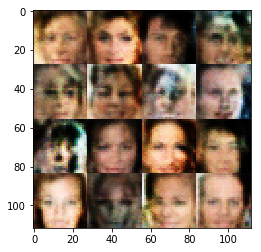

Epoch 1/1 -  Batch 1521/1582 -  Discriminator loss: 0.3701 -  Generator loss: 3.3460 - 
Epoch 1/1 -  Batch 1522/1582 -  Discriminator loss: 0.3701 -  Generator loss: 5.2072 - 
Epoch 1/1 -  Batch 1523/1582 -  Discriminator loss: 0.3647 -  Generator loss: 3.6286 - 
Epoch 1/1 -  Batch 1524/1582 -  Discriminator loss: 0.3612 -  Generator loss: 4.6675 - 
Epoch 1/1 -  Batch 1525/1582 -  Discriminator loss: 0.3810 -  Generator loss: 3.1191 - 
Epoch 1/1 -  Batch 1526/1582 -  Discriminator loss: 0.3853 -  Generator loss: 4.6297 - 
Epoch 1/1 -  Batch 1527/1582 -  Discriminator loss: 0.3708 -  Generator loss: 3.3682 - 
Epoch 1/1 -  Batch 1528/1582 -  Discriminator loss: 0.3599 -  Generator loss: 3.6686 - 
Epoch 1/1 -  Batch 1529/1582 -  Discriminator loss: 0.3680 -  Generator loss: 3.5849 - 
Epoch 1/1 -  Batch 1530/1582 -  Discriminator loss: 0.3521 -  Generator loss: 4.1893 - 
Epoch 1/1 -  Batch 1531/1582 -  Discriminator loss: 0.3783 -  Generator loss: 3.1297 - 
Epoch 1/1 -  Batch 1532/1582 -  

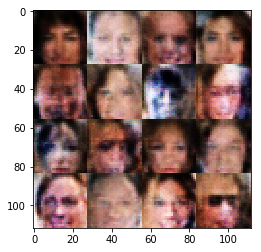

Epoch 1/1 -  Batch 1541/1582 -  Discriminator loss: 0.3753 -  Generator loss: 3.1717 - 
Epoch 1/1 -  Batch 1542/1582 -  Discriminator loss: 0.3881 -  Generator loss: 4.3548 - 
Epoch 1/1 -  Batch 1543/1582 -  Discriminator loss: 0.3856 -  Generator loss: 3.0316 - 
Epoch 1/1 -  Batch 1544/1582 -  Discriminator loss: 0.3701 -  Generator loss: 3.5239 - 
Epoch 1/1 -  Batch 1545/1582 -  Discriminator loss: 0.3724 -  Generator loss: 3.3497 - 
Epoch 1/1 -  Batch 1546/1582 -  Discriminator loss: 0.3588 -  Generator loss: 3.9294 - 
Epoch 1/1 -  Batch 1547/1582 -  Discriminator loss: 0.3702 -  Generator loss: 3.3374 - 
Epoch 1/1 -  Batch 1548/1582 -  Discriminator loss: 0.3631 -  Generator loss: 3.6883 - 
Epoch 1/1 -  Batch 1549/1582 -  Discriminator loss: 0.3614 -  Generator loss: 3.6966 - 
Epoch 1/1 -  Batch 1550/1582 -  Discriminator loss: 0.3563 -  Generator loss: 4.6207 - 
Epoch 1/1 -  Batch 1551/1582 -  Discriminator loss: 0.3730 -  Generator loss: 3.3062 - 
Epoch 1/1 -  Batch 1552/1582 -  

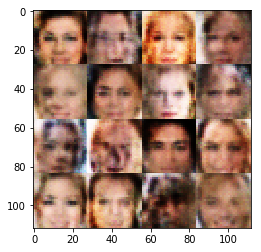

Epoch 1/1 -  Batch 1561/1582 -  Discriminator loss: 0.3696 -  Generator loss: 3.3233 - 
Epoch 1/1 -  Batch 1562/1582 -  Discriminator loss: 0.3629 -  Generator loss: 3.7696 - 
Epoch 1/1 -  Batch 1563/1582 -  Discriminator loss: 0.3612 -  Generator loss: 3.8084 - 
Epoch 1/1 -  Batch 1564/1582 -  Discriminator loss: 0.3554 -  Generator loss: 3.8500 - 
Epoch 1/1 -  Batch 1565/1582 -  Discriminator loss: 0.3853 -  Generator loss: 3.0092 - 
Epoch 1/1 -  Batch 1566/1582 -  Discriminator loss: 0.4048 -  Generator loss: 4.5489 - 
Epoch 1/1 -  Batch 1567/1582 -  Discriminator loss: 0.3665 -  Generator loss: 3.4613 - 
Epoch 1/1 -  Batch 1568/1582 -  Discriminator loss: 0.3861 -  Generator loss: 2.9908 - 
Epoch 1/1 -  Batch 1569/1582 -  Discriminator loss: 0.3938 -  Generator loss: 4.2529 - 
Epoch 1/1 -  Batch 1570/1582 -  Discriminator loss: 0.3791 -  Generator loss: 3.1331 - 
Epoch 1/1 -  Batch 1571/1582 -  Discriminator loss: 0.3672 -  Generator loss: 3.5989 - 
Epoch 1/1 -  Batch 1572/1582 -  

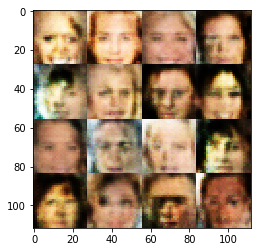

Epoch 1/1 -  Batch 1581/1582 -  Discriminator loss: 0.3494 -  Generator loss: 4.4394 - 
Epoch 1/1 -  Batch 1582/1582 -  Discriminator loss: 0.3830 -  Generator loss: 3.0611 - 


In [181]:
batch_size = 128
z_dim = 128
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.